# THESIS

### Necesssary Pip Installs:

In [ ]:
!pip install keras-tuner --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scikit-learn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sklearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install missingpy
!pip install miceforest
!pip show imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Name: imbalanced-learn
Version: 0.8.1
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: None
Author-email: None
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, joblib, scikit-learn, scipy
Required-by: imblearn


### Imports Relevant Libraries

In [ ]:
import missingno as mno
import sklearn.neighbors._base
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
import random
import tensorflow as tf
import random

sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Bidirectional
from keras.callbacks import EarlyStopping


from missingpy import MissForest
from sklearn.impute import KNNImputer

In [ ]:
import keras_tuner as kt
from tensorflow import keras


In [ ]:
import numpy as np
from pandas import DataFrame, date_range, concat
import matplotlib.pyplot as plt
from matplotlib import rc 
import seaborn as sns
from pylab import rcParams
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
from collections import defaultdict
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

tf.random.set_seed(42)

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Mount Colab Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing

## Read Downloaded Data

In [ ]:
df = pd.read_csv('BTC_USD_2022_1min.csv', parse_dates=['Date'])

In [ ]:
df_eth = pd.read_csv('ETH_USD_2022_1min.csv', parse_dates=['Date'])

In [ ]:
df = df.sort_values(by = "Date").reset_index(drop = True)

In [ ]:
df_eth = df_eth.sort_values(by = "Date").reset_index(drop = True)

In [ ]:
df.columns

Index(['Unix Timestamp', 'Date', 'Symbol', 'Open', 'High', 'Low', 'Close',
       'Volume'],
      dtype='object')

### Set Index to date 

In [ ]:
df.index = pd.to_datetime(df['Date'], format='%Y.%m.%d %H:%M:%S')
df_eth.index = pd.to_datetime(df_eth['Date'], format='%Y.%m.%d %H:%M:%S')

### Rename Column data for later use & and to avoid name conflict with index

In [ ]:
df = df.rename(columns={"Date": "dftime"})
df.columns

Index(['Unix Timestamp', 'dftime', 'Symbol', 'Open', 'High', 'Low', 'Close',
       'Volume'],
      dtype='object')

In [ ]:
df_eth = df_eth.rename(columns={"Date": "dftime"})
df_eth.columns

Index(['Unix Timestamp', 'dftime', 'Symbol', 'Open', 'High', 'Low', 'Close',
       'Volume'],
      dtype='object')

## Inspect Data

In [ ]:
df.head()

Unix Timestamp              dftime  Symbol      Open  \
Date                                                                        
2022-01-01 00:00:00   1640995200000 2022-01-01 00:00:00  BTCUSD  46220.00   
2022-01-01 00:01:00   1640995260000 2022-01-01 00:01:00  BTCUSD  46224.93   
2022-01-01 00:02:00   1640995320000 2022-01-01 00:02:00  BTCUSD  46309.63   
2022-01-01 00:03:00   1640995380000 2022-01-01 00:03:00  BTCUSD  46378.34   
2022-01-01 00:04:00   1640995440000 2022-01-01 00:04:00  BTCUSD  46347.92   

                         High       Low     Close    Volume  
Date                                                         
2022-01-01 00:00:00  46239.39  46219.86  46224.93  5.613981  
2022-01-01 00:01:00  46309.63  46214.07  46309.63  1.802484  
2022-01-01 00:02:00  46386.21  46297.08  46378.34  2.796398  
2022-01-01 00:03:00  46386.21  46316.82  46347.92  0.066140  
2022-01-01 00:04:00  46366.69  46347.66  46347.67  0.038852

In [ ]:
df_eth.head()

Unix Timestamp              dftime  Symbol     Open  \
Date                                                                       
2022-01-01 00:00:00   1640995200000 2022-01-01 00:00:00  ETHUSD  3677.63   
2022-01-01 00:01:00   1640995260000 2022-01-01 00:01:00  ETHUSD  3683.31   
2022-01-01 00:02:00   1640995320000 2022-01-01 00:02:00  ETHUSD  3692.29   
2022-01-01 00:03:00   1640995380000 2022-01-01 00:03:00  ETHUSD  3694.14   
2022-01-01 00:04:00   1640995440000 2022-01-01 00:04:00  ETHUSD  3691.42   

                        High      Low    Close     Volume  
Date                                                       
2022-01-01 00:00:00  3685.01  3677.23  3683.31   4.396903  
2022-01-01 00:01:00  3692.29  3680.61  3692.29   5.479419  
2022-01-01 00:02:00  3694.14  3687.17  3694.14  33.982545  
2022-01-01 00:03:00  3695.79  3689.48  3691.43   1.771120  
2022-01-01 00:04:00  3693.27  3689.30  3690.66   8.877375

In [ ]:
df.describe()

Unix Timestamp           Open           High            Low  \
count    2.763940e+05  276394.000000  276394.000000  276394.000000   
mean     1.649304e+12   35944.638764   35961.183849   35928.222568   
std      4.797773e+09    8166.489566    8167.251227    8165.709762   
min      1.640995e+12   17606.150000   17646.300000   17581.010000   
25%      1.645153e+12   29888.665000   29904.625000   29873.165000   
50%      1.649302e+12   38802.590000   38822.000000   38782.180000   
75%      1.653464e+12   42089.415000   42104.727500   42071.835000   
max      1.657610e+12   48204.570000   48217.830000   48163.270000   

               Close         Volume  
count  276394.000000  276394.000000  
mean    35944.542371       1.101922  
std      8166.524976       4.640738  
min     17606.150000       0.000000  
25%     29888.525000       0.017566  
50%     38802.540000       0.119656  
75%     42089.352500       0.677450  
max     48204.570000     397.171357

In [ ]:
df_eth.describe()

Unix Timestamp           Open           High            Low  \
count    2.763860e+05  276386.000000  276386.000000  276386.000000   
mean     1.649304e+12    2497.425698    2498.772345    2496.063194   
std      4.797782e+09     750.670700     750.805626     750.520395   
min      1.640995e+12     884.210000     890.620000     880.000000   
25%      1.645153e+12    1952.202500    1953.472500    1950.885000   
50%      1.649303e+12    2714.005000    2715.630000    2712.370000   
75%      1.653464e+12    3056.050000    3057.360000    3054.850000   
max      1.657610e+12    3889.500000    3893.400000    3888.010000   

               Close         Volume  
count  276386.000000  276386.000000  
mean     2497.416337      11.892453  
std       750.672434      53.417539  
min       884.210000       0.000000  
25%      1952.200000       0.192580  
50%      2714.000000       1.196399  
75%      3056.045000       6.667761  
max      3889.500000    6442.858036

## Merge BTC & ETH Datasets while forward filling missing values

In [ ]:
df_all = df.merge(df_eth, how='outer', left_index = True, right_index = True)
df_all = df_all.ffill(axis = 'rows')
df_all

Unix Timestamp_x            dftime_x Symbol_x    Open_x  \
Date                                                                           
2022-01-01 00:00:00      1.640995e+12 2022-01-01 00:00:00   BTCUSD  46220.00   
2022-01-01 00:01:00      1.640995e+12 2022-01-01 00:01:00   BTCUSD  46224.93   
2022-01-01 00:02:00      1.640995e+12 2022-01-01 00:02:00   BTCUSD  46309.63   
2022-01-01 00:03:00      1.640995e+12 2022-01-01 00:03:00   BTCUSD  46378.34   
2022-01-01 00:04:00      1.640995e+12 2022-01-01 00:04:00   BTCUSD  46347.92   
...                               ...                 ...      ...       ...   
2022-07-12 07:12:00      1.657610e+12 2022-07-12 07:12:00   BTCUSD  19736.79   
2022-07-12 07:13:00      1.657610e+12 2022-07-12 07:13:00   BTCUSD  19658.88   
2022-07-12 07:14:00      1.657610e+12 2022-07-12 07:14:00   BTCUSD  19669.95   
2022-07-12 07:15:00      1.657610e+12 2022-07-12 07:15:00   BTCUSD  19670.19   
2022-07-12 07:16:00      1.657610e+12 2022-07-12 07:16:00   BTCUSD  19640.07   

                       High_x     Low_x   Close_x  Volume_x  Unix Timestamp_y  \
Date                                                                            
2022-01-01 00:00:00  46239.39  46219.86  46224.93  5.613981      1.640995e+12   
2022-01-01 00:01:00  46309.63  46214.07  46309.63  1.802484      1.640995e+12   
2022-01-01 00:02:00  46386.21  46297.08  46378.34  2.796398      1.640995e+12   
2022-01-01 00:03:00  46386.21  46316.82  46347.92  0.066140      1.640995e+12   
2022-01-01 00:04:00  46366.69  46347.66  46347.67  0.038852      1.640995e+12   
...                       ...       ...       ...       ...               ...   
2022-07-12 07:12:00  19742.75  19655.00  19658.88  9.707966      1.657610e+12   
2022-07-12 07:13:00  19677.41  19658.88  19669.95  0.174978      1.657610e+12   
2022-07-12 07:14:00  19670.19  19657.73  19670.19  1.059844      1.657610e+12   
2022-07-12 07:15:00  19673.27  19634.05  19640.07  1.663124      1.657610e+12   
2022-07-12 07:16:00  19642.64  19631.43  19631.43  0.162740      1.657610e+12   

                               dftime_y Symbol_y   Open_y   High_y    Low_y  \
Date                                                                          
2022-01-01 00:00:00 2022-01-01 00:00:00   ETHUSD  3677.63  3685.01  3677.23   
2022-01-01 00:01:00 2022-01-01 00:01:00   ETHUSD  3683.31  3692.29  3680.61   
2022-01-01 00:02:00 2022-01-01 00:02:00   ETHUSD  3692.29  3694.14  3687.17   
2022-01-01 00:03:00 2022-01-01 00:03:00   ETHUSD  3694.14  3695.79  3689.48   
2022-01-01 00:04:00 2022-01-01 00:04:00   ETHUSD  3691.42  3693.27  3689.30   
...                                 ...      ...      ...      ...      ...   
2022-07-12 07:12:00 2022-07-12 07:12:00   ETHUSD  1070.60  1070.60  1064.03   
2022-07-12 07:13:00 2022-07-12 07:13:00   ETHUSD  1066.48  1067.09  1065.43   
2022-07-12 07:14:00 2022-07-12 07:14:00   ETHUSD  1066.69  1067.81  1066.51   
2022-07-12 07:15:00 2022-07-12 07:15:00   ETHUSD  1067.81  1067.81  1064.82   
2022-07-12 07:16:00 2022-07-12 07:16:00   ETHUSD  1064.82  1065.28  1064.82   

                     Close_y   Volume_y  
Date                                     
2022-01-01 00:00:00  3683.31   4.396903  
2022-01-01 00:01:00  3692.29   5.479419  
2022-01-01 00:02:00  3694.14  33.982545  
2022-01-01 00:03:00  3691.43   1.771120  
2022-01-01 00:04:00  3690.66   8.877375  
...                      ...        ...  
2022-07-12 07:12:00  1066.48  40.345707  
2022-07-12 07:13:00  1066.69   5.278118  
2022-07-12 07:14:00  1067.81   2.407657  
2022-07-12 07:15:00  1064.82   6.611500  
2022-07-12 07:16:00  1064.95  26.213759  

[276401 rows x 16 columns]

## Convert Dataframes from min data to 5 Min data

In [ ]:
df = df[0::5]

df_eth = df_eth[0::5]

df_all = df_all[0::5]

In [ ]:
df

Unix Timestamp              dftime  Symbol      Open  \
Date                                                                        
2022-01-01 00:00:00   1640995200000 2022-01-01 00:00:00  BTCUSD  46220.00   
2022-01-01 00:05:00   1640995500000 2022-01-01 00:05:00  BTCUSD  46347.67   
2022-01-01 00:10:00   1640995800000 2022-01-01 00:10:00  BTCUSD  46347.98   
2022-01-01 00:15:00   1640996100000 2022-01-01 00:15:00  BTCUSD  46326.31   
2022-01-01 00:20:00   1640996400000 2022-01-01 00:20:00  BTCUSD  46273.54   
...                             ...                 ...     ...       ...   
2022-07-12 06:53:00   1657608780000 2022-07-12 06:53:00  BTCUSD  19827.76   
2022-07-12 06:58:00   1657609080000 2022-07-12 06:58:00  BTCUSD  19813.34   
2022-07-12 07:03:00   1657609380000 2022-07-12 07:03:00  BTCUSD  19815.74   
2022-07-12 07:08:00   1657609680000 2022-07-12 07:08:00  BTCUSD  19771.56   
2022-07-12 07:13:00   1657609980000 2022-07-12 07:13:00  BTCUSD  19658.88   

                         High       Low     Close     Volume  
Date                                                          
2022-01-01 00:00:00  46239.39  46219.86  46224.93   5.613981  
2022-01-01 00:05:00  46411.40  46320.00  46411.40  13.314653  
2022-01-01 00:10:00  46373.53  46345.78  46368.76   1.648154  
2022-01-01 00:15:00  46327.20  46292.64  46316.96   0.257735  
2022-01-01 00:20:00  46302.70  46273.54  46290.21   0.214719  
...                       ...       ...       ...        ...  
2022-07-12 06:53:00  19830.81  19821.97  19830.17   1.108226  
2022-07-12 06:58:00  19842.20  19812.81  19824.47  50.801821  
2022-07-12 07:03:00  19817.15  19794.03  19807.28   3.007966  
2022-07-12 07:08:00  19773.82  19763.83  19763.83   0.005114  
2022-07-12 07:13:00  19677.41  19658.88  19669.95   0.174978  

[55279 rows x 8 columns]

In [ ]:
df_eth


Unix Timestamp              dftime  Symbol     Open  \
Date                                                                       
2022-01-01 00:00:00   1640995200000 2022-01-01 00:00:00  ETHUSD  3677.63   
2022-01-01 00:05:00   1640995500000 2022-01-01 00:05:00  ETHUSD  3690.66   
2022-01-01 00:10:00   1640995800000 2022-01-01 00:10:00  ETHUSD  3694.86   
2022-01-01 00:15:00   1640996100000 2022-01-01 00:15:00  ETHUSD  3692.13   
2022-01-01 00:20:00   1640996400000 2022-01-01 00:20:00  ETHUSD  3687.74   
...                             ...                 ...     ...      ...   
2022-07-12 06:56:00   1657608960000 2022-07-12 06:56:00  ETHUSD  1076.66   
2022-07-12 07:01:00   1657609260000 2022-07-12 07:01:00  ETHUSD  1077.30   
2022-07-12 07:06:00   1657609560000 2022-07-12 07:06:00  ETHUSD  1072.90   
2022-07-12 07:11:00   1657609860000 2022-07-12 07:11:00  ETHUSD  1070.93   
2022-07-12 07:16:00   1657610160000 2022-07-12 07:16:00  ETHUSD  1064.82   

                        High      Low    Close      Volume  
Date                                                        
2022-01-01 00:00:00  3685.01  3677.23  3683.31    4.396903  
2022-01-01 00:05:00  3699.59  3688.37  3699.59    1.691682  
2022-01-01 00:10:00  3699.42  3694.86  3699.12    0.175431  
2022-01-01 00:15:00  3692.13  3690.57  3691.26    0.026237  
2022-01-01 00:20:00  3690.98  3687.74  3690.85    0.219317  
...                      ...      ...      ...         ...  
2022-07-12 06:56:00  1076.76  1075.00  1076.47  503.992167  
2022-07-12 07:01:00  1078.16  1077.30  1077.54   36.344340  
2022-07-12 07:06:00  1072.90  1071.43  1071.93    2.782034  
2022-07-12 07:11:00  1071.40  1070.49  1070.60   31.052144  
2022-07-12 07:16:00  1065.28  1064.82  1064.95   26.213759  

[55278 rows x 8 columns]

In [ ]:
df_all

Unix Timestamp_x            dftime_x Symbol_x    Open_x  \
Date                                                                           
2022-01-01 00:00:00      1.640995e+12 2022-01-01 00:00:00   BTCUSD  46220.00   
2022-01-01 00:05:00      1.640996e+12 2022-01-01 00:05:00   BTCUSD  46347.67   
2022-01-01 00:10:00      1.640996e+12 2022-01-01 00:10:00   BTCUSD  46347.98   
2022-01-01 00:15:00      1.640996e+12 2022-01-01 00:15:00   BTCUSD  46326.31   
2022-01-01 00:20:00      1.640996e+12 2022-01-01 00:20:00   BTCUSD  46273.54   
...                               ...                 ...      ...       ...   
2022-07-12 06:56:00      1.657609e+12 2022-07-12 06:56:00   BTCUSD  19806.30   
2022-07-12 07:01:00      1.657609e+12 2022-07-12 07:01:00   BTCUSD  19816.07   
2022-07-12 07:06:00      1.657610e+12 2022-07-12 07:06:00   BTCUSD  19760.51   
2022-07-12 07:11:00      1.657610e+12 2022-07-12 07:11:00   BTCUSD  19764.01   
2022-07-12 07:16:00      1.657610e+12 2022-07-12 07:16:00   BTCUSD  19640.07   

                       High_x     Low_x   Close_x   Volume_x  \
Date                                                           
2022-01-01 00:00:00  46239.39  46219.86  46224.93   5.613981   
2022-01-01 00:05:00  46411.40  46320.00  46411.40  13.314653   
2022-01-01 00:10:00  46373.53  46345.78  46368.76   1.648154   
2022-01-01 00:15:00  46327.20  46292.64  46316.96   0.257735   
2022-01-01 00:20:00  46302.70  46273.54  46290.21   0.214719   
...                       ...       ...       ...        ...   
2022-07-12 06:56:00  19827.40  19806.30  19827.40   0.150818   
2022-07-12 07:01:00  19837.43  19816.07  19830.80   0.969506   
2022-07-12 07:06:00  19760.51  19729.98  19754.43   1.198992   
2022-07-12 07:11:00  19776.63  19736.79  19736.79   6.537616   
2022-07-12 07:16:00  19642.64  19631.43  19631.43   0.162740   

                     Unix Timestamp_y            dftime_y Symbol_y   Open_y  \
Date                                                                          
2022-01-01 00:00:00      1.640995e+12 2022-01-01 00:00:00   ETHUSD  3677.63   
2022-01-01 00:05:00      1.640996e+12 2022-01-01 00:05:00   ETHUSD  3690.66   
2022-01-01 00:10:00      1.640996e+12 2022-01-01 00:10:00   ETHUSD  3694.86   
2022-01-01 00:15:00      1.640996e+12 2022-01-01 00:15:00   ETHUSD  3692.13   
2022-01-01 00:20:00      1.640996e+12 2022-01-01 00:20:00   ETHUSD  3687.74   
...                               ...                 ...      ...      ...   
2022-07-12 06:56:00      1.657609e+12 2022-07-12 06:56:00   ETHUSD  1076.66   
2022-07-12 07:01:00      1.657609e+12 2022-07-12 07:01:00   ETHUSD  1077.30   
2022-07-12 07:06:00      1.657610e+12 2022-07-12 07:06:00   ETHUSD  1072.90   
2022-07-12 07:11:00      1.657610e+12 2022-07-12 07:11:00   ETHUSD  1070.93   
2022-07-12 07:16:00      1.657610e+12 2022-07-12 07:16:00   ETHUSD  1064.82   

                      High_y    Low_y  Close_y    Volume_y  
Date                                                        
2022-01-01 00:00:00  3685.01  3677.23  3683.31    4.396903  
2022-01-01 00:05:00  3699.59  3688.37  3699.59    1.691682  
2022-01-01 00:10:00  3699.42  3694.86  3699.12    0.175431  
2022-01-01 00:15:00  3692.13  3690.57  3691.26    0.026237  
2022-01-01 00:20:00  3690.98  3687.74  3690.85    0.219317  
...                      ...      ...      ...         ...  
2022-07-12 06:56:00  1076.76  1075.00  1076.47  503.992167  
2022-07-12 07:01:00  1078.16  1077.30  1077.54   36.344340  
2022-07-12 07:06:00  1072.90  1071.43  1071.93    2.782034  
2022-07-12 07:11:00  1071.40  1070.49  1070.60   31.052144  
2022-07-12 07:16:00  1065.28  1064.82  1064.95   26.213759  

[55281 rows x 16 columns]

## Isolate Target Variable

In [ ]:
close = df["Close"]
eth_close = df_eth["Close"]
eth_all_close = df_all["Close_x"]
btc_all_close = df_all["Close_y"]


## Inspect Target Variable in both datasets:

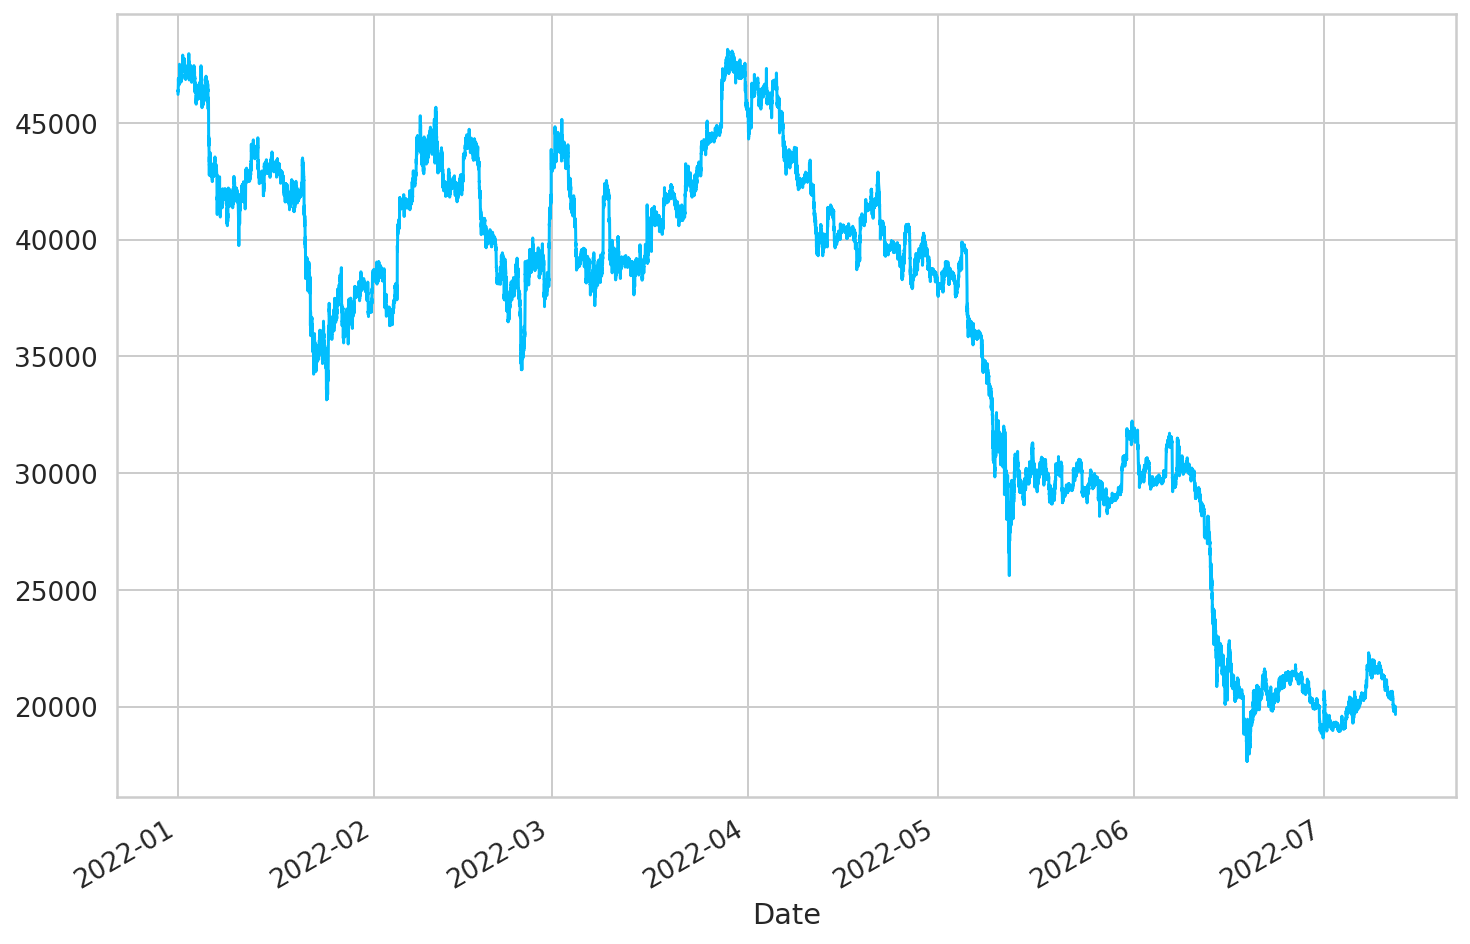

In [ ]:
close.plot()

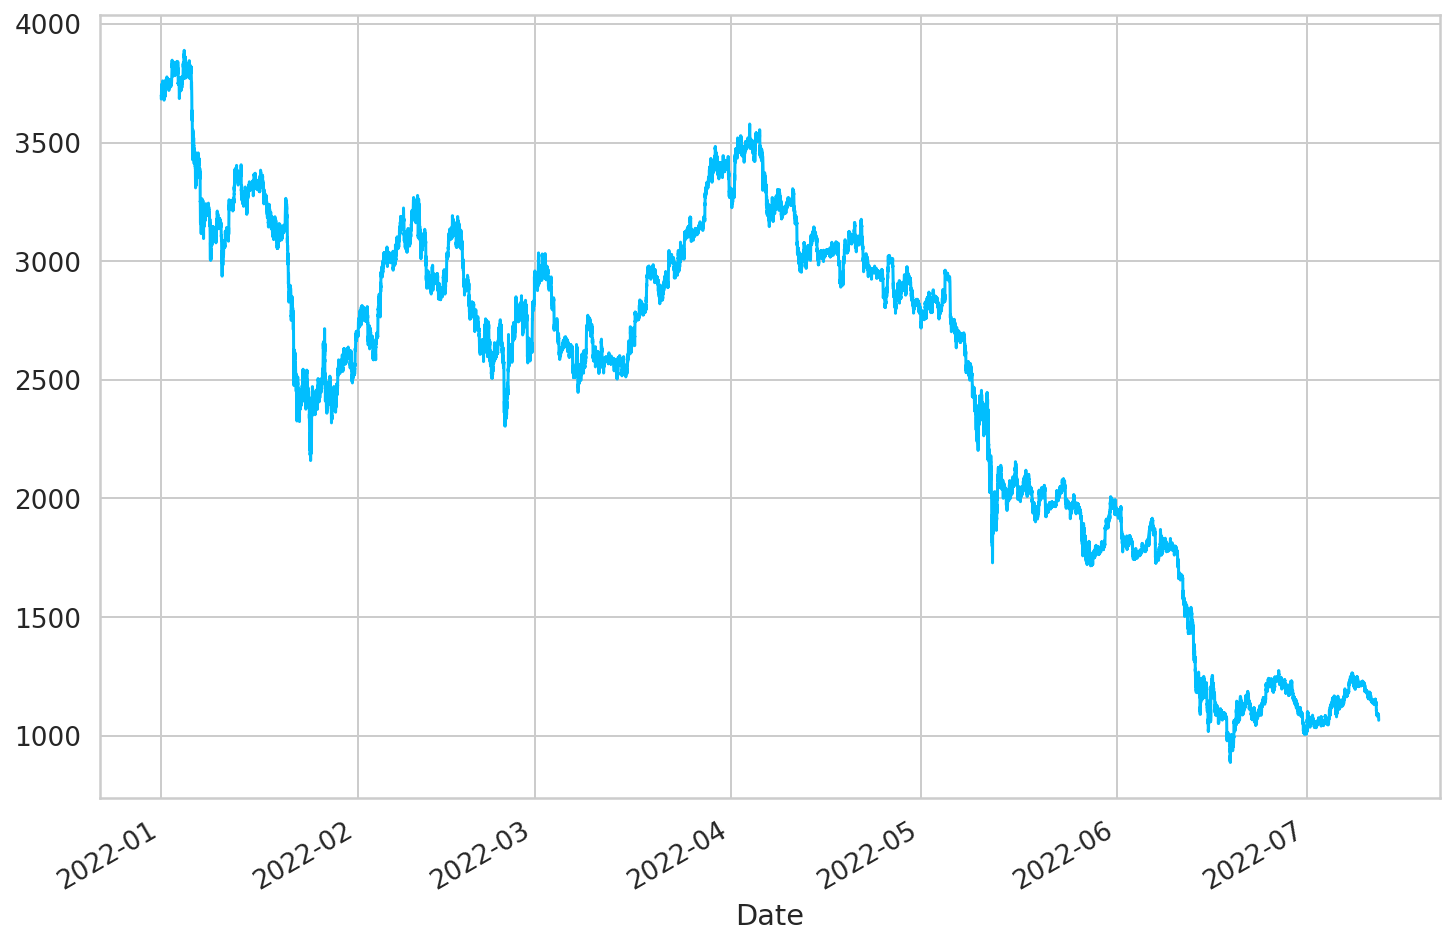

In [ ]:
eth_close.plot()

## Generate New Variables; closing_change_btc & closing_change_eth 

In [ ]:
df["prev_close_btc"] = df.shift(1)["Close"]
df_eth["prev_close_eth"] = df_eth.shift(1)["Close"]
df_all["prev_close_all_btc"] = df_all.shift(1)["Close_x"]
df_all["prev_close_all_eth"] = df_all.shift(1)["Close_y"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df["closing_change_btc"] = df.apply(lambda row:
                          0 if np.isnan(row.prev_close_btc) 
                          else row.Close - row.prev_close_btc, axis = 1)

df_eth["closing_change_eth"] = df_eth.apply(lambda row:
                          0 if np.isnan(row.prev_close_eth) 
                          else row.Close - row.prev_close_eth, axis = 1)

In [ ]:
df_all["closing_change_btc"] = df_all.apply(lambda row:
                          0 if np.isnan(row.prev_close_all_btc) 
                          else row.Close_x - row.prev_close_all_btc, axis = 1)
df_all["closing_change_eth"] = df_all.apply(lambda row:
                          0 if np.isnan(row.prev_close_all_eth) 
                          else row.Close_y - row.prev_close_all_eth, axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Plot Elements contained within Dataset

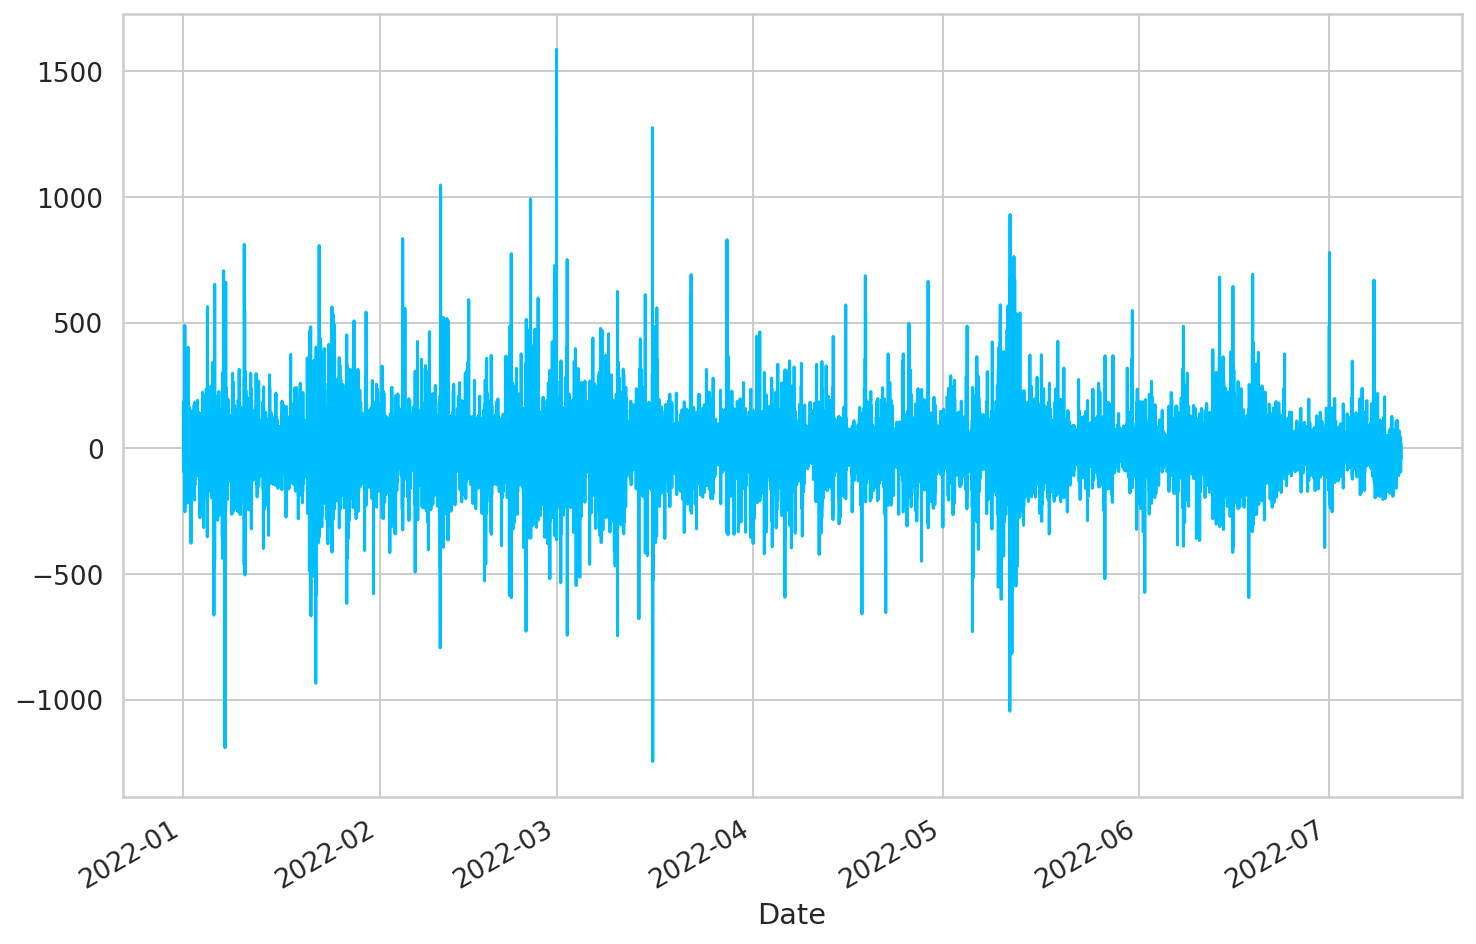

In [ ]:
df["closing_change_btc"].plot()

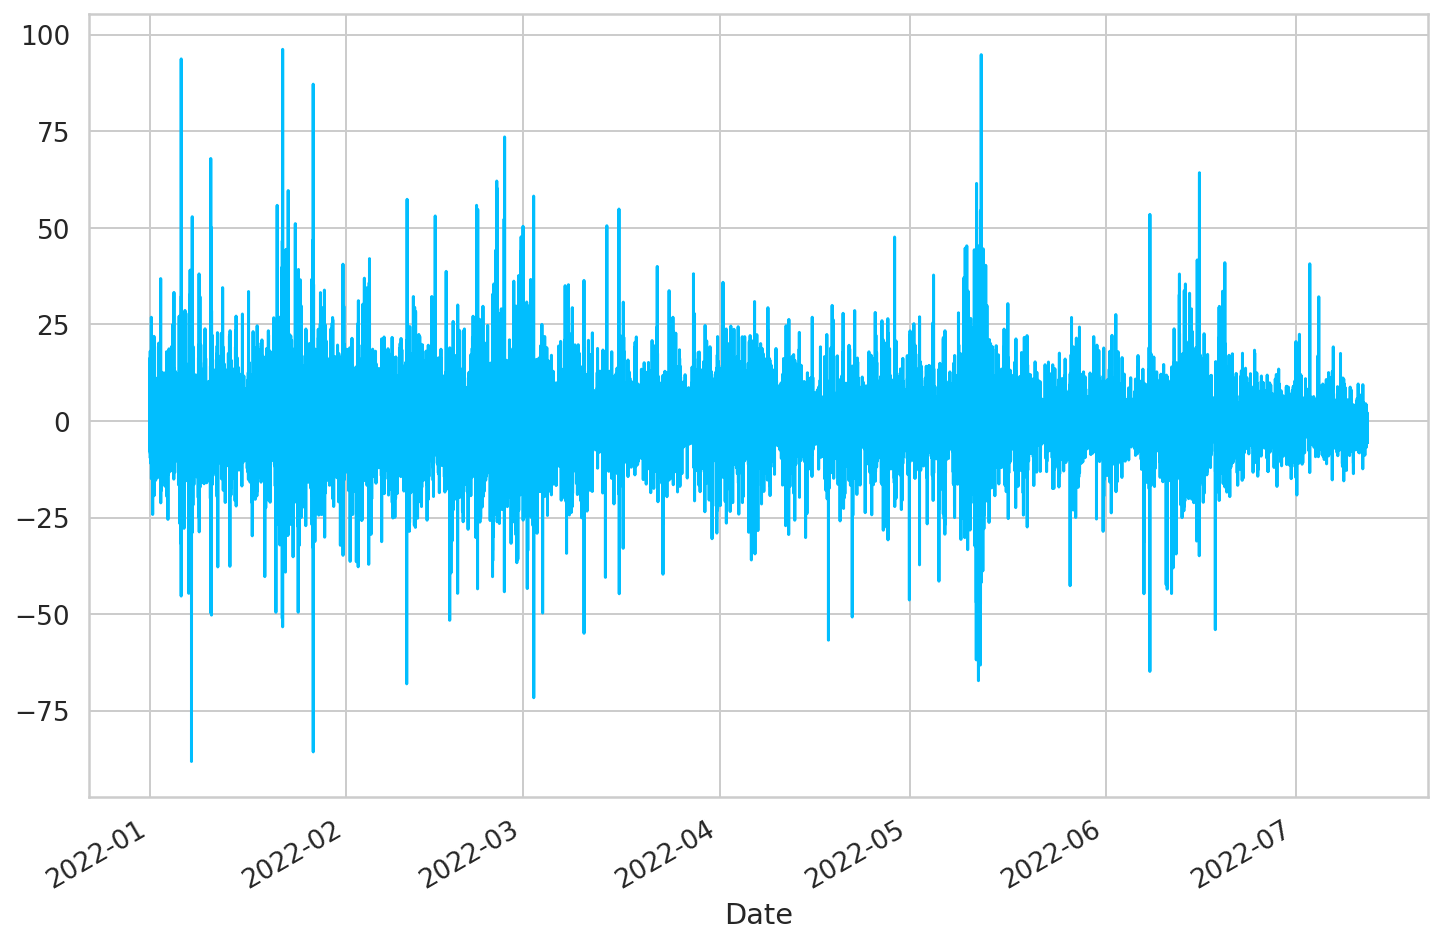

In [ ]:
df_eth["closing_change_eth"].plot()

In [ ]:
df.head()

Unix Timestamp              dftime  Symbol      Open  \
Date                                                                        
2022-01-01 00:00:00   1640995200000 2022-01-01 00:00:00  BTCUSD  46220.00   
2022-01-01 00:05:00   1640995500000 2022-01-01 00:05:00  BTCUSD  46347.67   
2022-01-01 00:10:00   1640995800000 2022-01-01 00:10:00  BTCUSD  46347.98   
2022-01-01 00:15:00   1640996100000 2022-01-01 00:15:00  BTCUSD  46326.31   
2022-01-01 00:20:00   1640996400000 2022-01-01 00:20:00  BTCUSD  46273.54   

                         High       Low     Close     Volume  prev_close_btc  \
Date                                                                           
2022-01-01 00:00:00  46239.39  46219.86  46224.93   5.613981             NaN   
2022-01-01 00:05:00  46411.40  46320.00  46411.40  13.314653        46224.93   
2022-01-01 00:10:00  46373.53  46345.78  46368.76   1.648154        46411.40   
2022-01-01 00:15:00  46327.20  46292.64  46316.96   0.257735        46368.76   
2022-01-01 00:20:00  46302.70  46273.54  46290.21   0.214719        46316.96   

                     closing_change_btc  
Date                                     
2022-01-01 00:00:00                0.00  
2022-01-01 00:05:00              186.47  
2022-01-01 00:10:00              -42.64  
2022-01-01 00:15:00              -51.80  
2022-01-01 00:20:00              -26.75

In [ ]:
df_eth.head()

Unix Timestamp              dftime  Symbol     Open  \
Date                                                                       
2022-01-01 00:00:00   1640995200000 2022-01-01 00:00:00  ETHUSD  3677.63   
2022-01-01 00:05:00   1640995500000 2022-01-01 00:05:00  ETHUSD  3690.66   
2022-01-01 00:10:00   1640995800000 2022-01-01 00:10:00  ETHUSD  3694.86   
2022-01-01 00:15:00   1640996100000 2022-01-01 00:15:00  ETHUSD  3692.13   
2022-01-01 00:20:00   1640996400000 2022-01-01 00:20:00  ETHUSD  3687.74   

                        High      Low    Close    Volume  prev_close_eth  \
Date                                                                       
2022-01-01 00:00:00  3685.01  3677.23  3683.31  4.396903             NaN   
2022-01-01 00:05:00  3699.59  3688.37  3699.59  1.691682         3683.31   
2022-01-01 00:10:00  3699.42  3694.86  3699.12  0.175431         3699.59   
2022-01-01 00:15:00  3692.13  3690.57  3691.26  0.026237         3699.12   
2022-01-01 00:20:00  3690.98  3687.74  3690.85  0.219317         3691.26   

                     closing_change_eth  
Date                                     
2022-01-01 00:00:00                0.00  
2022-01-01 00:05:00               16.28  
2022-01-01 00:10:00               -0.47  
2022-01-01 00:15:00               -7.86  
2022-01-01 00:20:00               -0.41

In [ ]:
df_all.head()

Unix Timestamp_x            dftime_x Symbol_x    Open_x  \
Date                                                                           
2022-01-01 00:00:00      1.640995e+12 2022-01-01 00:00:00   BTCUSD  46220.00   
2022-01-01 00:05:00      1.640996e+12 2022-01-01 00:05:00   BTCUSD  46347.67   
2022-01-01 00:10:00      1.640996e+12 2022-01-01 00:10:00   BTCUSD  46347.98   
2022-01-01 00:15:00      1.640996e+12 2022-01-01 00:15:00   BTCUSD  46326.31   
2022-01-01 00:20:00      1.640996e+12 2022-01-01 00:20:00   BTCUSD  46273.54   

                       High_x     Low_x   Close_x   Volume_x  \
Date                                                           
2022-01-01 00:00:00  46239.39  46219.86  46224.93   5.613981   
2022-01-01 00:05:00  46411.40  46320.00  46411.40  13.314653   
2022-01-01 00:10:00  46373.53  46345.78  46368.76   1.648154   
2022-01-01 00:15:00  46327.20  46292.64  46316.96   0.257735   
2022-01-01 00:20:00  46302.70  46273.54  46290.21   0.214719   

                     Unix Timestamp_y            dftime_y Symbol_y   Open_y  \
Date                                                                          
2022-01-01 00:00:00      1.640995e+12 2022-01-01 00:00:00   ETHUSD  3677.63   
2022-01-01 00:05:00      1.640996e+12 2022-01-01 00:05:00   ETHUSD  3690.66   
2022-01-01 00:10:00      1.640996e+12 2022-01-01 00:10:00   ETHUSD  3694.86   
2022-01-01 00:15:00      1.640996e+12 2022-01-01 00:15:00   ETHUSD  3692.13   
2022-01-01 00:20:00      1.640996e+12 2022-01-01 00:20:00   ETHUSD  3687.74   

                      High_y    Low_y  Close_y  Volume_y  prev_close_all_btc  \
Date                                                                           
2022-01-01 00:00:00  3685.01  3677.23  3683.31  4.396903                 NaN   
2022-01-01 00:05:00  3699.59  3688.37  3699.59  1.691682            46224.93   
2022-01-01 00:10:00  3699.42  3694.86  3699.12  0.175431            46411.40   
2022-01-01 00:15:00  3692.13  3690.57  3691.26  0.026237            46368.76   
2022-01-01 00:20:00  3690.98  3687.74  3690.85  0.219317            46316.96   

                     prev_close_all_eth  closing_change_btc  \
Date                                                          
2022-01-01 00:00:00                 NaN                0.00   
2022-01-01 00:05:00             3683.31              186.47   
2022-01-01 00:10:00             3699.59              -42.64   
2022-01-01 00:15:00             3699.12              -51.80   
2022-01-01 00:20:00             3691.26              -26.75   

                     closing_change_eth  
Date                                     
2022-01-01 00:00:00                0.00  
2022-01-01 00:05:00               16.28  
2022-01-01 00:10:00               -0.47  
2022-01-01 00:15:00               -7.86  
2022-01-01 00:20:00               -0.41

## Drop Unwanted Columns

In [ ]:
df = df.drop(columns = ["Unix Timestamp"])
df = df.drop(columns = ["dftime"])
df = df.drop(columns = ["Symbol"])
df = df.drop(columns = ["prev_close_btc"])

In [ ]:
df_eth = df_eth.drop(columns = ["Unix Timestamp"])
df_eth = df_eth.drop(columns = ["dftime"])
df_eth = df_eth.drop(columns = ["Symbol"])
df_eth = df_eth.drop(columns = ["prev_close_eth"])

In [ ]:
df_all = df_all.drop(columns = ["Unix Timestamp_x"])
df_all = df_all.drop(columns = ["Unix Timestamp_y"])
df_all = df_all.drop(columns = ["dftime_x"])
df_all = df_all.drop(columns = ["dftime_y"])
df_all = df_all.drop(columns = ["Symbol_x"])
df_all = df_all.drop(columns = ["Symbol_y"])
df_all = df_all.drop(columns = ["prev_close_all_btc"])
df_all = df_all.drop(columns = ["prev_close_all_eth"])

In [ ]:
df_all.isna().sum()

Open_x                0
High_x                0
Low_x                 0
Close_x               0
Volume_x              0
Open_y                0
High_y                0
Low_y                 0
Close_y               0
Volume_y              0
closing_change_btc    0
closing_change_eth    0
dtype: int64

In [ ]:
df

Open      High       Low     Close     Volume  \
Date                                                                     
2022-01-01 00:00:00  46220.00  46239.39  46219.86  46224.93   5.613981   
2022-01-01 00:05:00  46347.67  46411.40  46320.00  46411.40  13.314653   
2022-01-01 00:10:00  46347.98  46373.53  46345.78  46368.76   1.648154   
2022-01-01 00:15:00  46326.31  46327.20  46292.64  46316.96   0.257735   
2022-01-01 00:20:00  46273.54  46302.70  46273.54  46290.21   0.214719   
...                       ...       ...       ...       ...        ...   
2022-07-12 06:53:00  19827.76  19830.81  19821.97  19830.17   1.108226   
2022-07-12 06:58:00  19813.34  19842.20  19812.81  19824.47  50.801821   
2022-07-12 07:03:00  19815.74  19817.15  19794.03  19807.28   3.007966   
2022-07-12 07:08:00  19771.56  19773.82  19763.83  19763.83   0.005114   
2022-07-12 07:13:00  19658.88  19677.41  19658.88  19669.95   0.174978   

                     closing_change_btc  
Date                                     
2022-01-01 00:00:00                0.00  
2022-01-01 00:05:00              186.47  
2022-01-01 00:10:00              -42.64  
2022-01-01 00:15:00              -51.80  
2022-01-01 00:20:00              -26.75  
...                                 ...  
2022-07-12 06:53:00               -6.83  
2022-07-12 06:58:00               -5.70  
2022-07-12 07:03:00              -17.19  
2022-07-12 07:08:00              -43.45  
2022-07-12 07:13:00              -93.88  

[55279 rows x 6 columns]

In [ ]:
df_eth

Open     High      Low    Close      Volume  \
Date                                                                  
2022-01-01 00:00:00  3677.63  3685.01  3677.23  3683.31    4.396903   
2022-01-01 00:05:00  3690.66  3699.59  3688.37  3699.59    1.691682   
2022-01-01 00:10:00  3694.86  3699.42  3694.86  3699.12    0.175431   
2022-01-01 00:15:00  3692.13  3692.13  3690.57  3691.26    0.026237   
2022-01-01 00:20:00  3687.74  3690.98  3687.74  3690.85    0.219317   
...                      ...      ...      ...      ...         ...   
2022-07-12 06:56:00  1076.66  1076.76  1075.00  1076.47  503.992167   
2022-07-12 07:01:00  1077.30  1078.16  1077.30  1077.54   36.344340   
2022-07-12 07:06:00  1072.90  1072.90  1071.43  1071.93    2.782034   
2022-07-12 07:11:00  1070.93  1071.40  1070.49  1070.60   31.052144   
2022-07-12 07:16:00  1064.82  1065.28  1064.82  1064.95   26.213759   

                     closing_change_eth  
Date                                     
2022-01-01 00:00:00                0.00  
2022-01-01 00:05:00               16.28  
2022-01-01 00:10:00               -0.47  
2022-01-01 00:15:00               -7.86  
2022-01-01 00:20:00               -0.41  
...                                 ...  
2022-07-12 06:56:00               -1.21  
2022-07-12 07:01:00                1.07  
2022-07-12 07:06:00               -5.61  
2022-07-12 07:11:00               -1.33  
2022-07-12 07:16:00               -5.65  

[55278 rows x 6 columns]

## Creation of finalised datasets; btc(df), eth(df_eth) and all(df_all) 

In [ ]:
df_ = df_all[['Open_x','High_x','Low_x','Close_x','Volume_x','closing_change_btc']].copy()

df__eth = df_all[['Open_y','High_y','Low_y','Close_y','Volume_y','closing_change_eth']].copy()

In [ ]:
df = df_.rename(columns={"Open_x": "Open", "High_x": "High","Low_x": "Low", "Close_x":"Close", "Volume_x":"Volume"})

In [ ]:
df_eth = df__eth.rename(columns={"Open_y": "Open", "High_y": "High","Low_y": "Low", "Close_y":"Close", "Volume_y":"Volume"})

In [ ]:
df

Open      High       Low     Close     Volume  \
Date                                                                     
2022-01-01 00:00:00  46220.00  46239.39  46219.86  46224.93   5.613981   
2022-01-01 00:05:00  46347.67  46411.40  46320.00  46411.40  13.314653   
2022-01-01 00:10:00  46347.98  46373.53  46345.78  46368.76   1.648154   
2022-01-01 00:15:00  46326.31  46327.20  46292.64  46316.96   0.257735   
2022-01-01 00:20:00  46273.54  46302.70  46273.54  46290.21   0.214719   
...                       ...       ...       ...       ...        ...   
2022-07-12 06:56:00  19806.30  19827.40  19806.30  19827.40   0.150818   
2022-07-12 07:01:00  19816.07  19837.43  19816.07  19830.80   0.969506   
2022-07-12 07:06:00  19760.51  19760.51  19729.98  19754.43   1.198992   
2022-07-12 07:11:00  19764.01  19776.63  19736.79  19736.79   6.537616   
2022-07-12 07:16:00  19640.07  19642.64  19631.43  19631.43   0.162740   

                     closing_change_btc  
Date                                     
2022-01-01 00:00:00                0.00  
2022-01-01 00:05:00              186.47  
2022-01-01 00:10:00              -42.64  
2022-01-01 00:15:00              -51.80  
2022-01-01 00:20:00              -26.75  
...                                 ...  
2022-07-12 06:56:00               -8.77  
2022-07-12 07:01:00                3.40  
2022-07-12 07:06:00              -76.37  
2022-07-12 07:11:00              -17.64  
2022-07-12 07:16:00             -105.36  

[55281 rows x 6 columns]

In [ ]:
df_eth

Open     High      Low    Close      Volume  \
Date                                                                  
2022-01-01 00:00:00  3677.63  3685.01  3677.23  3683.31    4.396903   
2022-01-01 00:05:00  3690.66  3699.59  3688.37  3699.59    1.691682   
2022-01-01 00:10:00  3694.86  3699.42  3694.86  3699.12    0.175431   
2022-01-01 00:15:00  3692.13  3692.13  3690.57  3691.26    0.026237   
2022-01-01 00:20:00  3687.74  3690.98  3687.74  3690.85    0.219317   
...                      ...      ...      ...      ...         ...   
2022-07-12 06:56:00  1076.66  1076.76  1075.00  1076.47  503.992167   
2022-07-12 07:01:00  1077.30  1078.16  1077.30  1077.54   36.344340   
2022-07-12 07:06:00  1072.90  1072.90  1071.43  1071.93    2.782034   
2022-07-12 07:11:00  1070.93  1071.40  1070.49  1070.60   31.052144   
2022-07-12 07:16:00  1064.82  1065.28  1064.82  1064.95   26.213759   

                     closing_change_eth  
Date                                     
2022-01-01 00:00:00                0.00  
2022-01-01 00:05:00               16.28  
2022-01-01 00:10:00               -0.47  
2022-01-01 00:15:00               -7.86  
2022-01-01 00:20:00               -0.41  
...                                 ...  
2022-07-12 06:56:00               -1.21  
2022-07-12 07:01:00                1.07  
2022-07-12 07:06:00               -5.61  
2022-07-12 07:11:00               -1.33  
2022-07-12 07:16:00               -5.65  

[55281 rows x 6 columns]

In [ ]:
df_all

Open_x    High_x     Low_x   Close_x   Volume_x  \
Date                                                                     
2022-01-01 00:00:00  46220.00  46239.39  46219.86  46224.93   5.613981   
2022-01-01 00:05:00  46347.67  46411.40  46320.00  46411.40  13.314653   
2022-01-01 00:10:00  46347.98  46373.53  46345.78  46368.76   1.648154   
2022-01-01 00:15:00  46326.31  46327.20  46292.64  46316.96   0.257735   
2022-01-01 00:20:00  46273.54  46302.70  46273.54  46290.21   0.214719   
...                       ...       ...       ...       ...        ...   
2022-07-12 06:56:00  19806.30  19827.40  19806.30  19827.40   0.150818   
2022-07-12 07:01:00  19816.07  19837.43  19816.07  19830.80   0.969506   
2022-07-12 07:06:00  19760.51  19760.51  19729.98  19754.43   1.198992   
2022-07-12 07:11:00  19764.01  19776.63  19736.79  19736.79   6.537616   
2022-07-12 07:16:00  19640.07  19642.64  19631.43  19631.43   0.162740   

                      Open_y   High_y    Low_y  Close_y    Volume_y  \
Date                                                                  
2022-01-01 00:00:00  3677.63  3685.01  3677.23  3683.31    4.396903   
2022-01-01 00:05:00  3690.66  3699.59  3688.37  3699.59    1.691682   
2022-01-01 00:10:00  3694.86  3699.42  3694.86  3699.12    0.175431   
2022-01-01 00:15:00  3692.13  3692.13  3690.57  3691.26    0.026237   
2022-01-01 00:20:00  3687.74  3690.98  3687.74  3690.85    0.219317   
...                      ...      ...      ...      ...         ...   
2022-07-12 06:56:00  1076.66  1076.76  1075.00  1076.47  503.992167   
2022-07-12 07:01:00  1077.30  1078.16  1077.30  1077.54   36.344340   
2022-07-12 07:06:00  1072.90  1072.90  1071.43  1071.93    2.782034   
2022-07-12 07:11:00  1070.93  1071.40  1070.49  1070.60   31.052144   
2022-07-12 07:16:00  1064.82  1065.28  1064.82  1064.95   26.213759   

                     closing_change_btc  closing_change_eth  
Date                                                         
2022-01-01 00:00:00                0.00                0.00  
2022-01-01 00:05:00              186.47               16.28  
2022-01-01 00:10:00              -42.64               -0.47  
2022-01-01 00:15:00              -51.80               -7.86  
2022-01-01 00:20:00              -26.75               -0.41  
...                                 ...                 ...  
2022-07-12 06:56:00               -8.77               -1.21  
2022-07-12 07:01:00                3.40                1.07  
2022-07-12 07:06:00              -76.37               -5.61  
2022-07-12 07:11:00              -17.64               -1.33  
2022-07-12 07:16:00             -105.36               -5.65  

[55281 rows x 12 columns]

## Scale Data 

In [ ]:
df_scaled= MinMaxScaler(feature_range=(-1, 1))
df_scaled= df_scaled.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)


In [ ]:
df_eth_scaled= MinMaxScaler(feature_range=(-1, 1))
df_eth_scaled= df_eth_scaled.fit_transform(df_eth)
df_eth_scaled = pd.DataFrame(df_eth_scaled, index=df_eth.index, columns=df_eth.columns)

In [ ]:
df_all_scaled= MinMaxScaler(feature_range=(-1, 1))
df_all_scaled= df_all_scaled.fit_transform(df_all)
df_all_scaled = pd.DataFrame(df_all_scaled, index=df_all.index, columns=df_all.columns)

In [ ]:
df_all_scaled_btc = df_all_scaled.drop(columns = ["Open_y","High_y","Low_y","Close_y"])
df_all_scaled_eth = df_all_scaled.drop(columns = ["Open_x","High_x","Low_x","Close_x"])

In [ ]:
df_scaled

Open      High       Low     Close    Volume  \
Date                                                                    
2022-01-01 00:00:00  0.871605  0.870448  0.872839  0.870522 -0.968644   
2022-01-01 00:05:00  0.879966  0.881712  0.879391  0.882718 -0.925633   
2022-01-01 00:10:00  0.879986  0.879232  0.881078  0.879929 -0.990794   
2022-01-01 00:15:00  0.878567  0.876198  0.877601  0.876541 -0.998560   
2022-01-01 00:20:00  0.875111  0.874594  0.876351  0.874791 -0.998801   
...                       ...       ...       ...       ...       ...   
2022-07-12 06:56:00 -0.858046 -0.859055 -0.855452 -0.856011 -0.999158   
2022-07-12 07:01:00 -0.857406 -0.858398 -0.854813 -0.855788 -0.994585   
2022-07-12 07:06:00 -0.861044 -0.863435 -0.860446 -0.860783 -0.993303   
2022-07-12 07:11:00 -0.860815 -0.862380 -0.860000 -0.861937 -0.963485   
2022-07-12 07:16:00 -0.868931 -0.871154 -0.866894 -0.868828 -0.999091   

                     closing_change_btc  
Date                                     
2022-01-01 00:00:00           -0.185448  
2022-01-01 00:05:00           -0.070022  
2022-01-01 00:10:00           -0.211843  
2022-01-01 00:15:00           -0.217513  
2022-01-01 00:20:00           -0.202007  
...                                 ...  
2022-07-12 06:56:00           -0.190877  
2022-07-12 07:01:00           -0.183344  
2022-07-12 07:06:00           -0.232722  
2022-07-12 07:11:00           -0.196368  
2022-07-12 07:16:00           -0.250667  

[55281 rows x 6 columns]

In [ ]:
df_eth_scaled

Open      High       Low     Close    Volume  \
Date                                                                    
2022-01-01 00:00:00  0.861412  0.863969  0.861323  0.863117 -0.998415   
2022-01-01 00:05:00  0.870115  0.873700  0.868754  0.873964 -0.999390   
2022-01-01 00:10:00  0.872921  0.873587  0.873084  0.873651 -0.999937   
2022-01-01 00:15:00  0.871097  0.868721  0.870222  0.868414 -0.999991   
2022-01-01 00:20:00  0.868165  0.867954  0.868334  0.868141 -0.999921   
...                       ...       ...       ...       ...       ...   
2022-07-12 06:56:00 -0.875933 -0.876790 -0.874631 -0.873804 -0.818309   
2022-07-12 07:01:00 -0.875506 -0.875856 -0.873097 -0.873091 -0.986898   
2022-07-12 07:06:00 -0.878445 -0.879366 -0.877013 -0.876829 -0.998997   
2022-07-12 07:11:00 -0.879760 -0.880368 -0.877640 -0.877715 -0.988806   
2022-07-12 07:16:00 -0.883842 -0.884452 -0.881423 -0.881480 -0.990550   

                     closing_change_eth  
Date                                     
2022-01-01 00:00:00           -0.030896  
2022-01-01 00:05:00            0.148103  
2022-01-01 00:10:00           -0.036064  
2022-01-01 00:15:00           -0.117317  
2022-01-01 00:20:00           -0.035404  
...                                 ...  
2022-07-12 06:56:00           -0.044200  
2022-07-12 07:01:00           -0.019131  
2022-07-12 07:06:00           -0.092578  
2022-07-12 07:11:00           -0.045520  
2022-07-12 07:16:00           -0.093018  

[55281 rows x 6 columns]

In [ ]:
df_all_scaled_btc

Open_x    High_x     Low_x   Close_x  Volume_x  \
Date                                                                    
2022-01-01 00:00:00  0.871605  0.870448  0.872839  0.870522 -0.968644   
2022-01-01 00:05:00  0.879966  0.881712  0.879391  0.882718 -0.925633   
2022-01-01 00:10:00  0.879986  0.879232  0.881078  0.879929 -0.990794   
2022-01-01 00:15:00  0.878567  0.876198  0.877601  0.876541 -0.998560   
2022-01-01 00:20:00  0.875111  0.874594  0.876351  0.874791 -0.998801   
...                       ...       ...       ...       ...       ...   
2022-07-12 06:56:00 -0.858046 -0.859055 -0.855452 -0.856011 -0.999158   
2022-07-12 07:01:00 -0.857406 -0.858398 -0.854813 -0.855788 -0.994585   
2022-07-12 07:06:00 -0.861044 -0.863435 -0.860446 -0.860783 -0.993303   
2022-07-12 07:11:00 -0.860815 -0.862380 -0.860000 -0.861937 -0.963485   
2022-07-12 07:16:00 -0.868931 -0.871154 -0.866894 -0.868828 -0.999091   

                     Volume_y  closing_change_btc  closing_change_eth  
Date                                                                   
2022-01-01 00:00:00 -0.998415           -0.185448           -0.030896  
2022-01-01 00:05:00 -0.999390           -0.070022            0.148103  
2022-01-01 00:10:00 -0.999937           -0.211843           -0.036064  
2022-01-01 00:15:00 -0.999991           -0.217513           -0.117317  
2022-01-01 00:20:00 -0.999921           -0.202007           -0.035404  
...                       ...                 ...                 ...  
2022-07-12 06:56:00 -0.818309           -0.190877           -0.044200  
2022-07-12 07:01:00 -0.986898           -0.183344           -0.019131  
2022-07-12 07:06:00 -0.998997           -0.232722           -0.092578  
2022-07-12 07:11:00 -0.988806           -0.196368           -0.045520  
2022-07-12 07:16:00 -0.990550           -0.250667           -0.093018  

[55281 rows x 8 columns]

In [ ]:
df_all_scaled_eth

Volume_x    Open_y    High_y     Low_y   Close_y  \
Date                                                                    
2022-01-01 00:00:00 -0.968644  0.861412  0.863969  0.861323  0.863117   
2022-01-01 00:05:00 -0.925633  0.870115  0.873700  0.868754  0.873964   
2022-01-01 00:10:00 -0.990794  0.872921  0.873587  0.873084  0.873651   
2022-01-01 00:15:00 -0.998560  0.871097  0.868721  0.870222  0.868414   
2022-01-01 00:20:00 -0.998801  0.868165  0.867954  0.868334  0.868141   
...                       ...       ...       ...       ...       ...   
2022-07-12 06:56:00 -0.999158 -0.875933 -0.876790 -0.874631 -0.873804   
2022-07-12 07:01:00 -0.994585 -0.875506 -0.875856 -0.873097 -0.873091   
2022-07-12 07:06:00 -0.993303 -0.878445 -0.879366 -0.877013 -0.876829   
2022-07-12 07:11:00 -0.963485 -0.879760 -0.880368 -0.877640 -0.877715   
2022-07-12 07:16:00 -0.999091 -0.883842 -0.884452 -0.881423 -0.881480   

                     Volume_y  closing_change_btc  closing_change_eth  
Date                                                                   
2022-01-01 00:00:00 -0.998415           -0.185448           -0.030896  
2022-01-01 00:05:00 -0.999390           -0.070022            0.148103  
2022-01-01 00:10:00 -0.999937           -0.211843           -0.036064  
2022-01-01 00:15:00 -0.999991           -0.217513           -0.117317  
2022-01-01 00:20:00 -0.999921           -0.202007           -0.035404  
...                       ...                 ...                 ...  
2022-07-12 06:56:00 -0.818309           -0.190877           -0.044200  
2022-07-12 07:01:00 -0.986898           -0.183344           -0.019131  
2022-07-12 07:06:00 -0.998997           -0.232722           -0.092578  
2022-07-12 07:11:00 -0.988806           -0.196368           -0.045520  
2022-07-12 07:16:00 -0.990550           -0.250667           -0.093018  

[55281 rows x 8 columns]

In [ ]:
df_all_scaled

Open_x    High_x     Low_x   Close_x  Volume_x  \
Date                                                                    
2022-01-01 00:00:00  0.871605  0.870448  0.872839  0.870522 -0.968644   
2022-01-01 00:05:00  0.879966  0.881712  0.879391  0.882718 -0.925633   
2022-01-01 00:10:00  0.879986  0.879232  0.881078  0.879929 -0.990794   
2022-01-01 00:15:00  0.878567  0.876198  0.877601  0.876541 -0.998560   
2022-01-01 00:20:00  0.875111  0.874594  0.876351  0.874791 -0.998801   
...                       ...       ...       ...       ...       ...   
2022-07-12 06:56:00 -0.858046 -0.859055 -0.855452 -0.856011 -0.999158   
2022-07-12 07:01:00 -0.857406 -0.858398 -0.854813 -0.855788 -0.994585   
2022-07-12 07:06:00 -0.861044 -0.863435 -0.860446 -0.860783 -0.993303   
2022-07-12 07:11:00 -0.860815 -0.862380 -0.860000 -0.861937 -0.963485   
2022-07-12 07:16:00 -0.868931 -0.871154 -0.866894 -0.868828 -0.999091   

                       Open_y    High_y     Low_y   Close_y  Volume_y  \
Date                                                                    
2022-01-01 00:00:00  0.861412  0.863969  0.861323  0.863117 -0.998415   
2022-01-01 00:05:00  0.870115  0.873700  0.868754  0.873964 -0.999390   
2022-01-01 00:10:00  0.872921  0.873587  0.873084  0.873651 -0.999937   
2022-01-01 00:15:00  0.871097  0.868721  0.870222  0.868414 -0.999991   
2022-01-01 00:20:00  0.868165  0.867954  0.868334  0.868141 -0.999921   
...                       ...       ...       ...       ...       ...   
2022-07-12 06:56:00 -0.875933 -0.876790 -0.874631 -0.873804 -0.818309   
2022-07-12 07:01:00 -0.875506 -0.875856 -0.873097 -0.873091 -0.986898   
2022-07-12 07:06:00 -0.878445 -0.879366 -0.877013 -0.876829 -0.998997   
2022-07-12 07:11:00 -0.879760 -0.880368 -0.877640 -0.877715 -0.988806   
2022-07-12 07:16:00 -0.883842 -0.884452 -0.881423 -0.881480 -0.990550   

                     closing_change_btc  closing_change_eth  
Date                                                         
2022-01-01 00:00:00           -0.185448           -0.030896  
2022-01-01 00:05:00           -0.070022            0.148103  
2022-01-01 00:10:00           -0.211843           -0.036064  
2022-01-01 00:15:00           -0.217513           -0.117317  
2022-01-01 00:20:00           -0.202007           -0.035404  
...                                 ...                 ...  
2022-07-12 06:56:00           -0.190877           -0.044200  
2022-07-12 07:01:00           -0.183344           -0.019131  
2022-07-12 07:06:00           -0.232722           -0.092578  
2022-07-12 07:11:00           -0.196368           -0.045520  
2022-07-12 07:16:00           -0.250667           -0.093018  

[55281 rows x 12 columns]

### Assign Targert Variables 

In [ ]:
sc_close = df_scaled['Close']
sc_eth_close = df_eth_scaled['Close']

# Part 1: Univariate LSTM vs GRU

## Seperate df into windowed univariate sequences (assigned to x) with target assigned to y (the next sequence in the time series following the current window end)

In [ ]:
def df_to_Xy(df_scaled, window_size):
  df_as_np = df_scaled.to_numpy()
  X1= []
  y1 = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X1.append(row)
    label = df_as_np[i+window_size]
    y1.append(label)
  return np.array(X1), np.array(y1)

In [ ]:
def df_eth_to_Xy(df_eth_scaled, window_size):
  df_eth_as_np = df_eth_scaled.to_numpy()
  X1_eth = []
  y1_eth = []
  for i in range(len(df_eth_as_np)-window_size):
    row = [[a] for a in df_eth_as_np[i:i+window_size]]
    X1_eth.append(row)
    label = df_eth_as_np[i+window_size]
    y1_eth.append(label)
  return np.array(X1_eth), np.array(y1_eth)

## Set Window Size and correctly structure data:

In [ ]:
WINDOW_SIZE = 6


### Shape Data

In [ ]:
X1, y1 = df_to_Xy(sc_close, WINDOW_SIZE)
X1.shape, y1.shape

((55275, 6, 1), (55275,))

In [ ]:
X1_eth, y1_eth = df_eth_to_Xy(sc_eth_close, WINDOW_SIZE)
X1_eth.shape, y1_eth.shape

((55275, 6, 1), (55275,))

## Split Data for UV LSTM & GRU Models

In [ ]:
X_train1, y_train1 = X1[:45000], y1[:45000]
X_val1, y_val1 = X1[45000:50000], y1[45000:50000]
X_test1, y_test1 = X1[50000:], y1[50000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((45000, 6, 1), (45000,), (5000, 6, 1), (5000,), (5275, 6, 1), (5275,))

In [ ]:
X_eth_train1, y_eth_train1 = X1_eth[:45000], y1_eth[:45000]
X_eth_val1, y_eth_val1 = X1_eth[45000:50000], y1_eth[45000:50000]
X_eth_test1, y_eth_test1 = X1_eth[50000:], y1_eth[50000:]
X_eth_train1.shape, y_eth_train1.shape, X_eth_val1.shape, y_eth_val1.shape, X_eth_test1.shape, y_eth_test1.shape

((45000, 6, 1), (45000,), (5000, 6, 1), (5000,), (5275, 6, 1), (5275,))

In [ ]:
GRU_X_train1, GRU_y_train1 = X1[:45000], y1[:45000]
GRU_X_val1, GRU_y_val1 = X1[45000:50000], y1[45000:50000]
GRU_X_test1, GRU_y_test1 = X1[50000:], y1[50000:]
GRU_X_train1.shape, GRU_y_train1.shape, GRU_X_val1.shape, GRU_y_val1.shape, GRU_X_test1.shape, GRU_y_test1.shape

((45000, 6, 1), (45000,), (5000, 6, 1), (5000,), (5275, 6, 1), (5275,))

In [ ]:
GRU_X_eth_train1, GRU_y_eth_train1 = X1_eth[:45000], y1_eth[:45000]
GRU_X_eth_val1, GRU_y_eth_val1 = X1_eth[45000:50000], y1_eth[45000:50000]
GRU_X_eth_test1, GRU_y_eth_test1 = X1_eth[50000:], y1_eth[50000:]
GRU_X_eth_train1.shape, GRU_y_eth_train1.shape, GRU_X_eth_val1.shape, GRU_y_eth_val1.shape, GRU_X_eth_test1.shape, GRU_y_eth_test1.shape

((45000, 6, 1), (45000,), (5000, 6, 1), (5000,), (5275, 6, 1), (5275,))

## plot predictions function

In [ ]:
def plot_predictions1(model, X, y):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'])
  plt.plot(df['Actuals'])
  return df, mse(y, predictions)

## Construct Univariate LSTM Models 

In [ ]:
model_uv_lstm = Sequential()
model_uv_lstm.add(InputLayer((6, 1)))
model_uv_lstm.add(LSTM(64)) 
model_uv_lstm.add(Dense(8, 'relu'))
model_uv_lstm.add(Dense(1, 'linear'))

model_uv_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_uv_lstm_eth = Sequential()
model_uv_lstm_eth.add(InputLayer((6, 1)))
model_uv_lstm_eth.add(LSTM(64))
model_uv_lstm_eth.add(Dense(8, 'relu'))
model_uv_lstm_eth.add(Dense(1, 'linear'))

model_uv_lstm_eth.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


## Save Checkpoint & Compile  Uniariate LSTM Models

In [ ]:
ES_cp1 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
cp1 = ModelCheckpoint('model_uv_lstm/', save_best_only=True)
model_uv_lstm.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
ES_cp1_eth = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
cp1_eth = ModelCheckpoint('model_uv_lstm_eth/', save_best_only=True)
model_uv_lstm_eth.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

## Train Univariate LSTM Models

In [ ]:
model_uv_lstm.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, shuffle = False, callbacks=[ES_cp1,cp1]) 

Epoch 1/100
1404/1407 [============================>.] - ETA: 0s - loss: 0.0085 - root_mean_squared_error: 0.0923

INFO:tensorflow:Assets written to: model_uv_lstm/assets


INFO:tensorflow:Assets written to: model_uv_lstm/assets


1407/1407 [==============================] - 15s 7ms/step - loss: 0.0085 - root_mean_squared_error: 0.0922 - val_loss: 0.0952 - val_root_mean_squared_error: 0.3086
Epoch 2/100
1402/1407 [============================>.] - ETA: 0s - loss: 9.0319e-04 - root_mean_squared_error: 0.0301

INFO:tensorflow:Assets written to: model_uv_lstm/assets


INFO:tensorflow:Assets written to: model_uv_lstm/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 9.0483e-04 - root_mean_squared_error: 0.0301 - val_loss: 0.0613 - val_root_mean_squared_error: 0.2476
Epoch 3/100
1396/1407 [============================>.] - ETA: 0s - loss: 6.8350e-04 - root_mean_squared_error: 0.0261

INFO:tensorflow:Assets written to: model_uv_lstm/assets


INFO:tensorflow:Assets written to: model_uv_lstm/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 6.8269e-04 - root_mean_squared_error: 0.0261 - val_loss: 0.0590 - val_root_mean_squared_error: 0.2429
Epoch 4/100
1399/1407 [============================>.] - ETA: 0s - loss: 0.0010 - root_mean_squared_error: 0.0319

INFO:tensorflow:Assets written to: model_uv_lstm/assets


INFO:tensorflow:Assets written to: model_uv_lstm/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 0.0010 - root_mean_squared_error: 0.0319 - val_loss: 0.0559 - val_root_mean_squared_error: 0.2364
Epoch 5/100
1391/1407 [============================>.] - ETA: 0s - loss: 0.0010 - root_mean_squared_error: 0.0322

INFO:tensorflow:Assets written to: model_uv_lstm/assets


INFO:tensorflow:Assets written to: model_uv_lstm/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 0.0010 - root_mean_squared_error: 0.0321 - val_loss: 0.0378 - val_root_mean_squared_error: 0.1945
Epoch 6/100
1393/1407 [============================>.] - ETA: 0s - loss: 8.7928e-04 - root_mean_squared_error: 0.0297

INFO:tensorflow:Assets written to: model_uv_lstm/assets


INFO:tensorflow:Assets written to: model_uv_lstm/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 8.7401e-04 - root_mean_squared_error: 0.0296 - val_loss: 0.0280 - val_root_mean_squared_error: 0.1674
Epoch 7/100
1407/1407 [==============================] - 5s 3ms/step - loss: 7.9530e-04 - root_mean_squared_error: 0.0282 - val_loss: 0.0291 - val_root_mean_squared_error: 0.1705
Epoch 8/100
1407/1407 [==============================] - 5s 3ms/step - loss: 7.5683e-04 - root_mean_squared_error: 0.0275 - val_loss: 0.0321 - val_root_mean_squared_error: 0.1792
Epoch 9/100
1407/1407 [==============================] - 5s 3ms/step - loss: 7.2583e-04 - root_mean_squared_error: 0.0269 - val_loss: 0.0326 - val_root_mean_squared_error: 0.1806
Epoch 10/100
1407/1407 [==============================] - 5s 3ms/step - loss: 6.8332e-04 - root_mean_squared_error: 0.0261 - val_loss: 0.0359 - val_root_mean_squared_error: 0.1894
Epoch 11/100
1407/1407 [==============================] - 5s 3ms/step - loss: 6.3619e-04 - root_mean_squared_error: 

In [ ]:
model_uv_lstm_eth.fit(X_eth_train1, y_eth_train1, validation_data=(X_eth_val1, y_eth_val1), epochs=100, shuffle = False, callbacks=[ES_cp1_eth,cp1_eth])

Epoch 1/100
1403/1407 [============================>.] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.0879

INFO:tensorflow:Assets written to: model_uv_lstm_eth/assets


INFO:tensorflow:Assets written to: model_uv_lstm_eth/assets


1407/1407 [==============================] - 10s 6ms/step - loss: 0.0077 - root_mean_squared_error: 0.0878 - val_loss: 0.0435 - val_root_mean_squared_error: 0.2086
Epoch 2/100
1396/1407 [============================>.] - ETA: 0s - loss: 5.0279e-04 - root_mean_squared_error: 0.0224

INFO:tensorflow:Assets written to: model_uv_lstm_eth/assets


INFO:tensorflow:Assets written to: model_uv_lstm_eth/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 5.0030e-04 - root_mean_squared_error: 0.0224 - val_loss: 0.0319 - val_root_mean_squared_error: 0.1787
Epoch 3/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.3090e-04 - root_mean_squared_error: 0.0182 - val_loss: 0.0346 - val_root_mean_squared_error: 0.1859
Epoch 4/100
1392/1407 [============================>.] - ETA: 0s - loss: 5.8226e-04 - root_mean_squared_error: 0.0241

INFO:tensorflow:Assets written to: model_uv_lstm_eth/assets


INFO:tensorflow:Assets written to: model_uv_lstm_eth/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 5.7757e-04 - root_mean_squared_error: 0.0240 - val_loss: 0.0285 - val_root_mean_squared_error: 0.1687
Epoch 5/100
1392/1407 [============================>.] - ETA: 0s - loss: 7.6419e-04 - root_mean_squared_error: 0.0276

INFO:tensorflow:Assets written to: model_uv_lstm_eth/assets


INFO:tensorflow:Assets written to: model_uv_lstm_eth/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 7.5738e-04 - root_mean_squared_error: 0.0275 - val_loss: 0.0209 - val_root_mean_squared_error: 0.1447
Epoch 6/100
1397/1407 [============================>.] - ETA: 0s - loss: 7.4492e-04 - root_mean_squared_error: 0.0273

INFO:tensorflow:Assets written to: model_uv_lstm_eth/assets


INFO:tensorflow:Assets written to: model_uv_lstm_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 7.4075e-04 - root_mean_squared_error: 0.0272 - val_loss: 0.0205 - val_root_mean_squared_error: 0.1431
Epoch 7/100
1394/1407 [============================>.] - ETA: 0s - loss: 7.0178e-04 - root_mean_squared_error: 0.0265

INFO:tensorflow:Assets written to: model_uv_lstm_eth/assets


INFO:tensorflow:Assets written to: model_uv_lstm_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 6.9655e-04 - root_mean_squared_error: 0.0264 - val_loss: 0.0182 - val_root_mean_squared_error: 0.1351
Epoch 8/100
1407/1407 [==============================] - 5s 3ms/step - loss: 7.0499e-04 - root_mean_squared_error: 0.0266 - val_loss: 0.0193 - val_root_mean_squared_error: 0.1388
Epoch 9/100
1407/1407 [==============================] - 5s 3ms/step - loss: 6.2437e-04 - root_mean_squared_error: 0.0250 - val_loss: 0.0219 - val_root_mean_squared_error: 0.1481
Epoch 10/100
1407/1407 [==============================] - 5s 3ms/step - loss: 5.7793e-04 - root_mean_squared_error: 0.0240 - val_loss: 0.0231 - val_root_mean_squared_error: 0.1519
Epoch 11/100
1407/1407 [==============================] - 5s 3ms/step - loss: 4.7040e-04 - root_mean_squared_error: 0.0217 - val_loss: 0.0256 - val_root_mean_squared_error: 0.1601
Epoch 12/100
1407/1407 [==============================] - 5s 3ms/step - loss: 4.1873e-04 - root_mean_squared_error:

## Plot Predictions for Univariate LSTM Models 

### Plot predictions - model_uv_lstm



(       Predictions   Actuals
 0         0.747831  0.878375
 1         0.747660  0.885595
 2         0.749452  0.891870
 3         0.751303  0.894791
 4         0.752858  0.901556
 ...            ...       ...
 44995    -0.092236 -0.081226
 44996    -0.091841 -0.084272
 44997    -0.092989 -0.087185
 44998    -0.094224 -0.092333
 44999    -0.096979 -0.093579
 
 [45000 rows x 2 columns], 0.0025456433012458353)

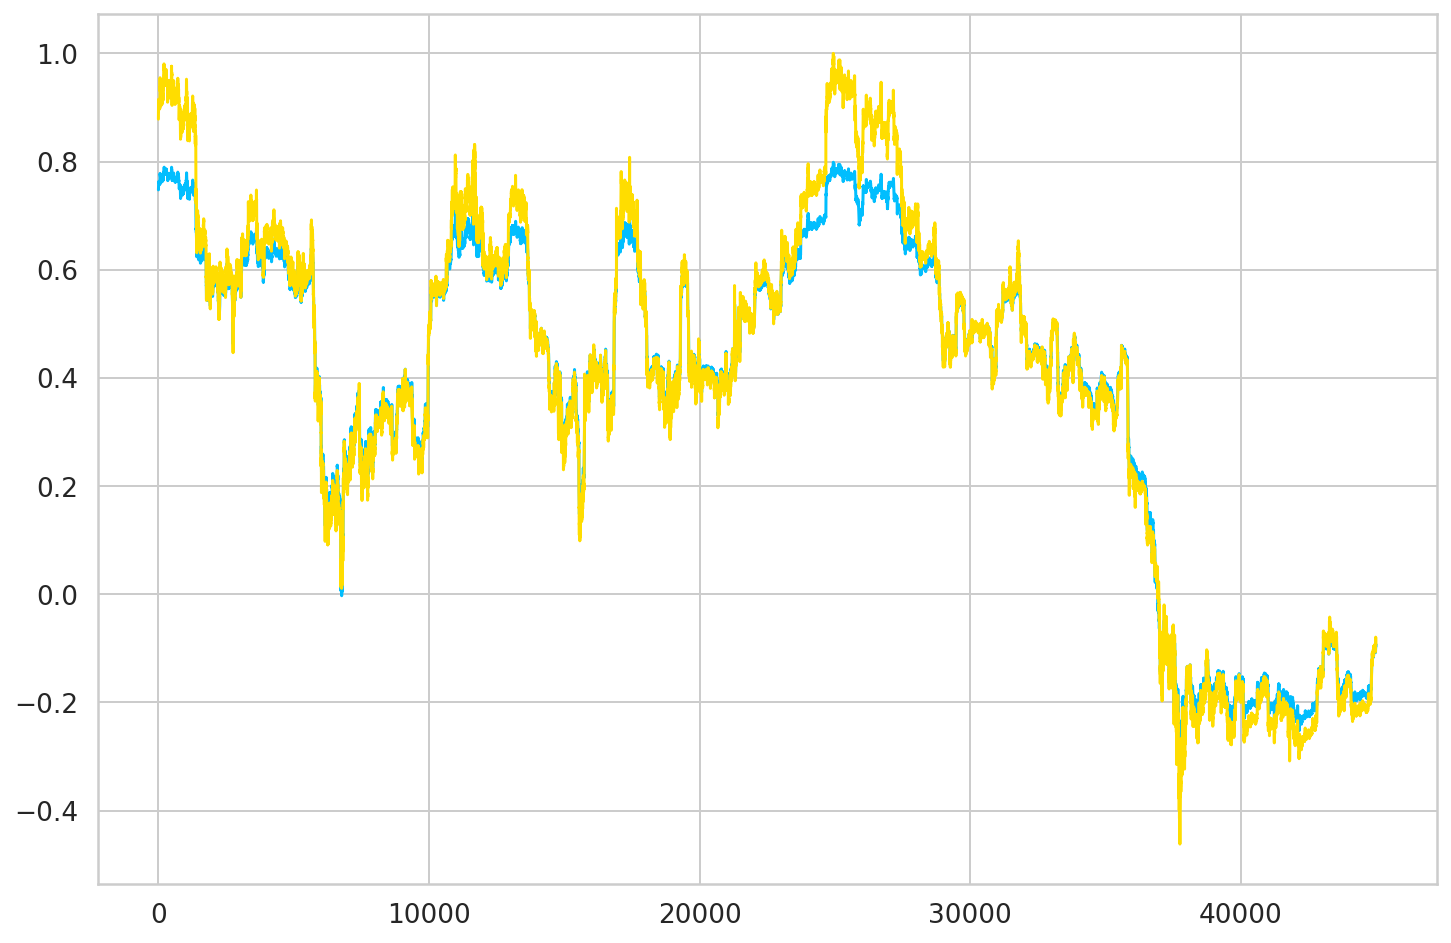

In [ ]:
plot_predictions1(model_uv_lstm, X_train1, y_train1)

(      Predictions   Actuals
 0       -0.098284 -0.096840
 1       -0.100728 -0.101056
 2       -0.103501 -0.103126
 3       -0.105353 -0.116073
 4       -0.112428 -0.109961
 ...           ...       ...
 4995    -0.562184 -0.774502
 4996    -0.560865 -0.771328
 4997    -0.559436 -0.769867
 4998    -0.558651 -0.773450
 4999    -0.560400 -0.772455
 
 [5000 rows x 2 columns], 0.03160205987698107)

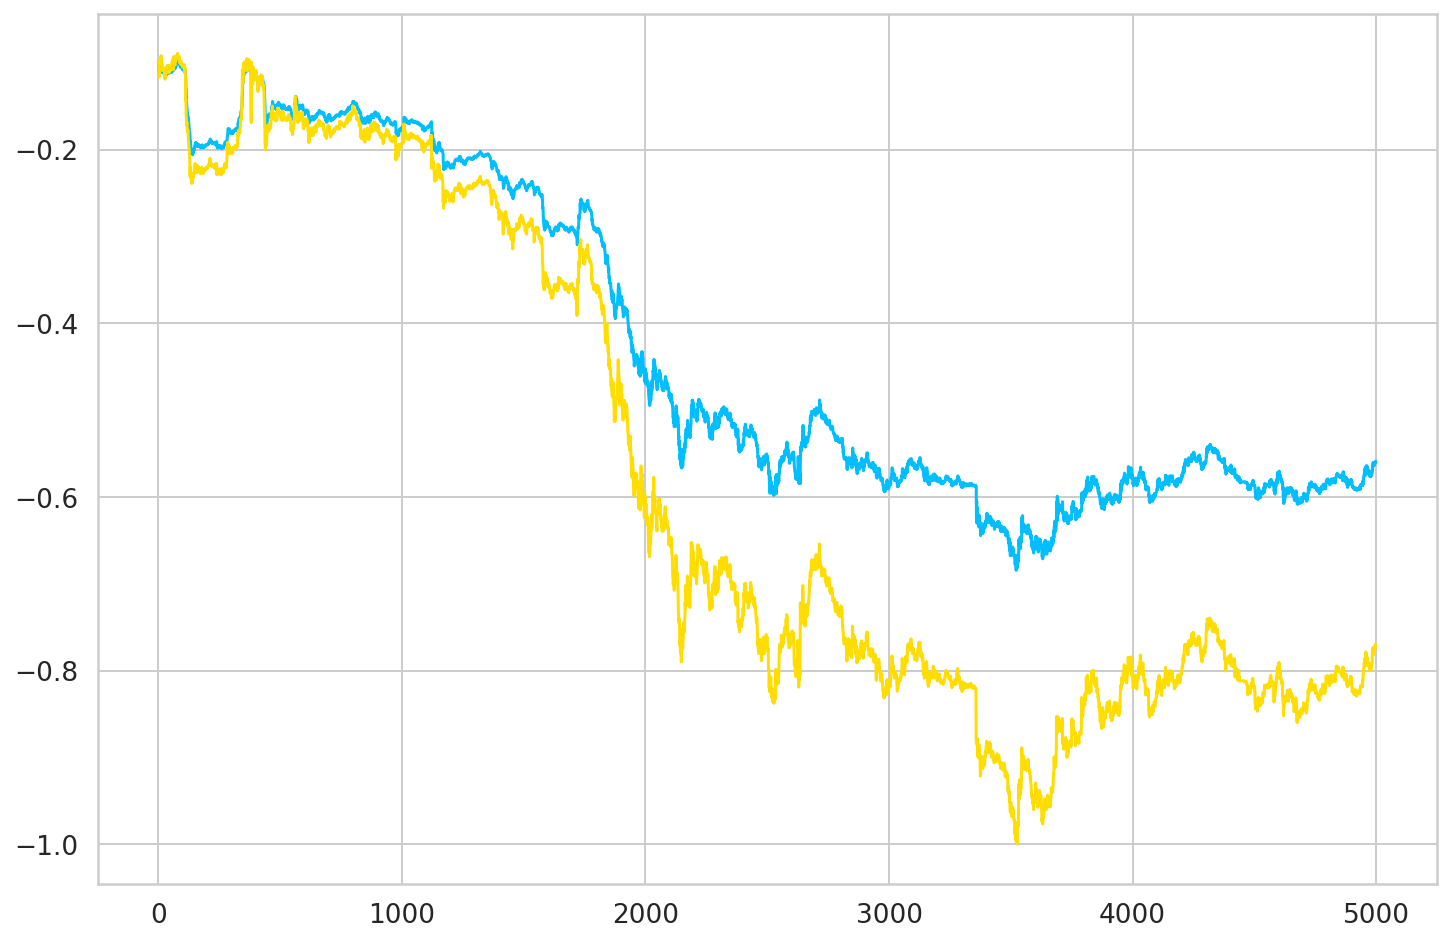

In [ ]:
plot_predictions1(model_uv_lstm, X_val1, y_val1)

(      Predictions   Actuals
 0       -0.558585 -0.774143
 1       -0.561009 -0.774205
 2       -0.559312 -0.772726
 3       -0.560029 -0.771556
 4       -0.559113 -0.771738
 ...           ...       ...
 5270    -0.607458 -0.856011
 5271    -0.607255 -0.855788
 5272    -0.607523 -0.860783
 5273    -0.610527 -0.861937
 5274    -0.609503 -0.868828
 
 [5275 rows x 2 columns], 0.05419950664557486)

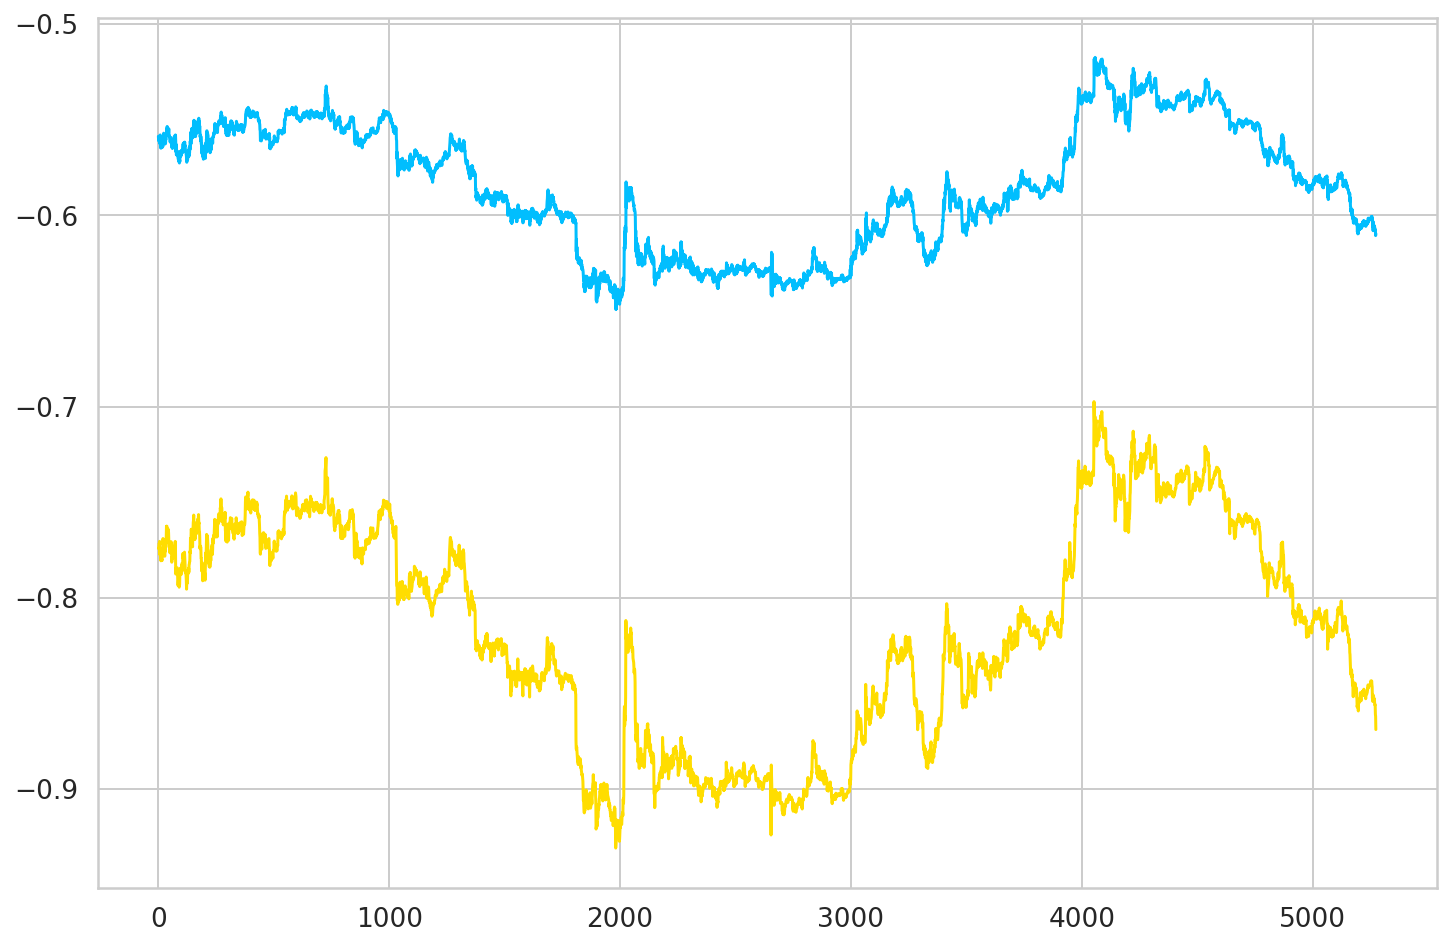

In [ ]:
plot_predictions1(model_uv_lstm, X_test1, y_test1)

### Plot predictions - model_uv_lstm_eth

(       Predictions   Actuals
 0         0.691739  0.871365
 1         0.691604  0.874237
 2         0.692474  0.878655
 3         0.693896  0.884685
 4         0.696207  0.889375
 ...            ...       ...
 44995    -0.326256 -0.321487
 44996    -0.326227 -0.323246
 44997    -0.327179 -0.325285
 44998    -0.328166 -0.330342
 44999    -0.330820 -0.329882
 
 [45000 rows x 2 columns], 0.0032669493367211404)

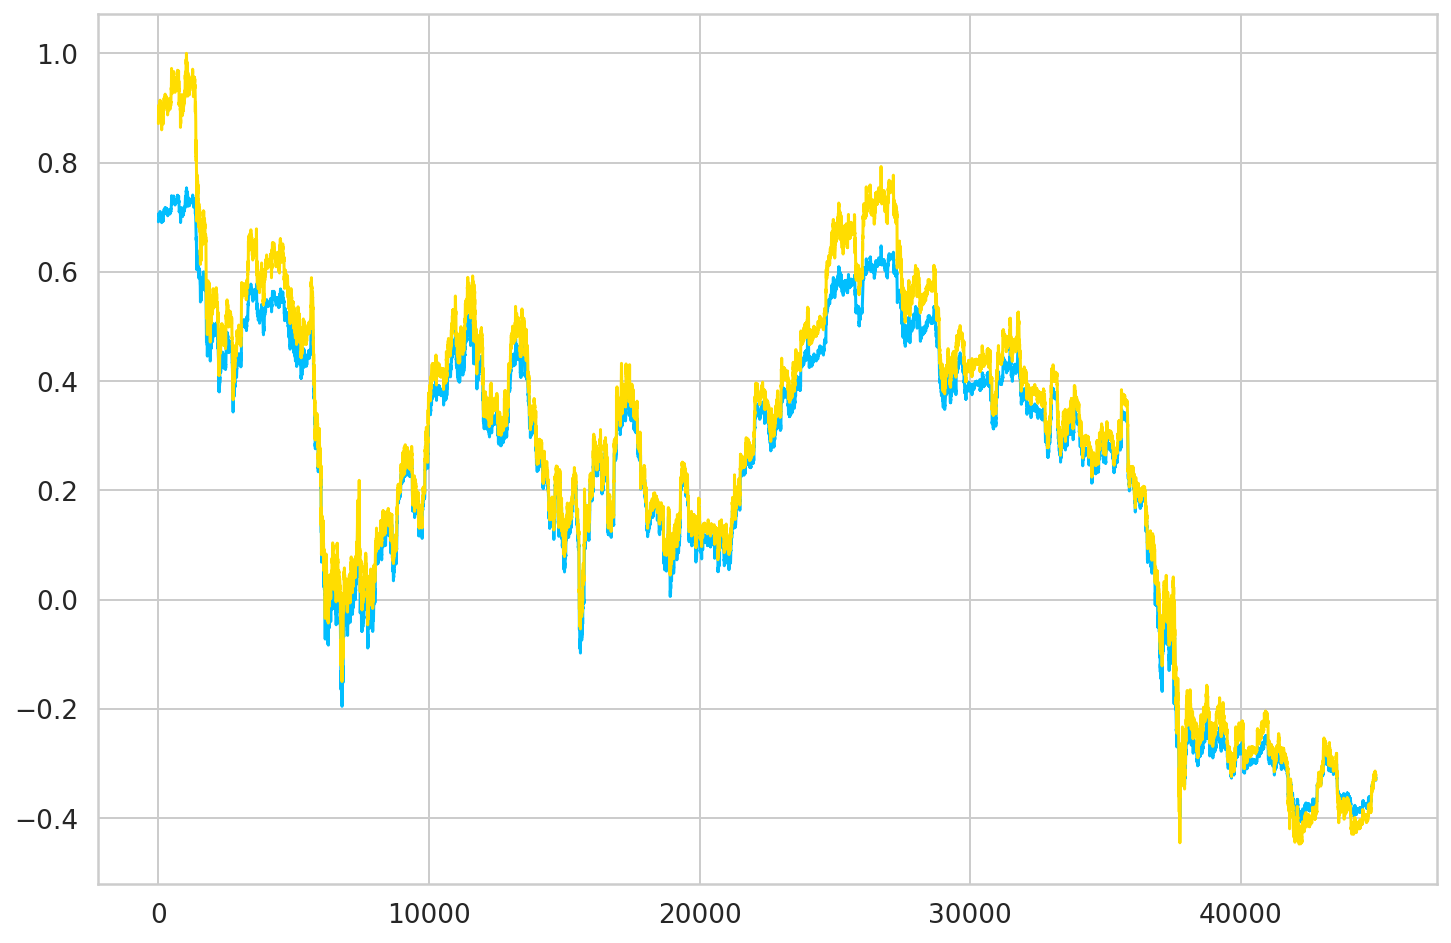

In [ ]:
plot_predictions1(model_uv_lstm_eth, X_eth_train1, y_eth_train1)

(      Predictions   Actuals
 0       -0.330796 -0.332520
 1       -0.332616 -0.335359
 2       -0.334299 -0.338724
 3       -0.336311 -0.347059
 4       -0.340849 -0.344894
 ...           ...       ...
 4995    -0.635570 -0.829342
 4996    -0.635455 -0.827843
 4997    -0.634601 -0.827657
 4998    -0.634683 -0.827650
 4999    -0.634541 -0.827816
 
 [5000 rows x 2 columns], 0.027074951158369515)

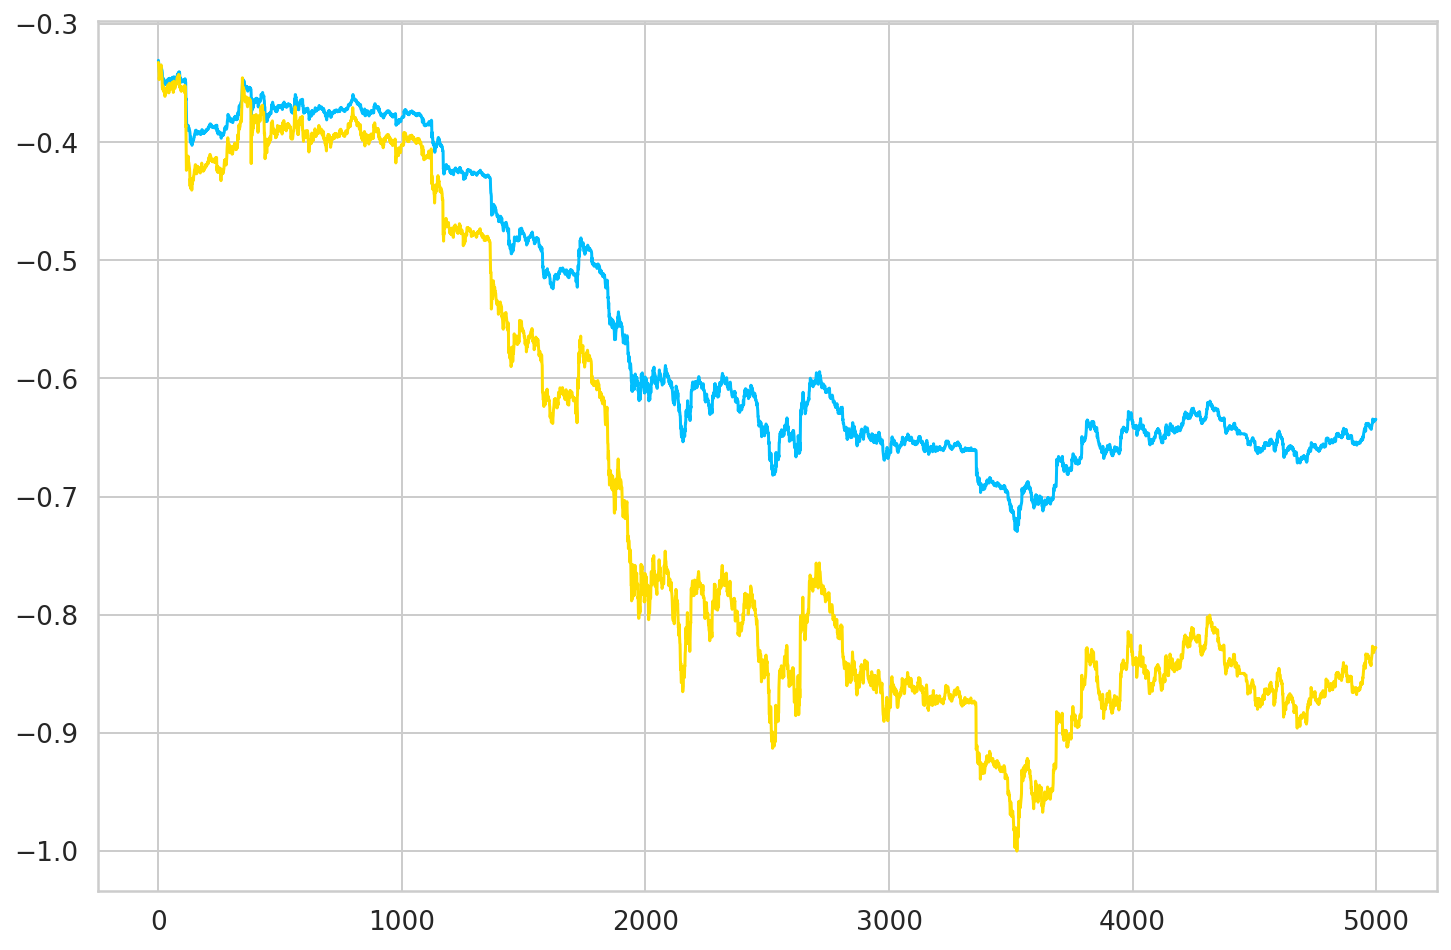

In [ ]:
plot_predictions1(model_uv_lstm_eth, X_eth_val1, y_eth_val1)

(      Predictions   Actuals
 0       -0.634602 -0.829249
 1       -0.635320 -0.829362
 2       -0.635180 -0.828429
 3       -0.634809 -0.827510
 4       -0.634475 -0.828190
 ...           ...       ...
 5270    -0.659649 -0.873804
 5271    -0.659957 -0.873091
 5272    -0.659743 -0.876829
 5273    -0.662070 -0.877715
 5274    -0.662003 -0.881480
 
 [5275 rows x 2 columns], 0.03731880301166459)

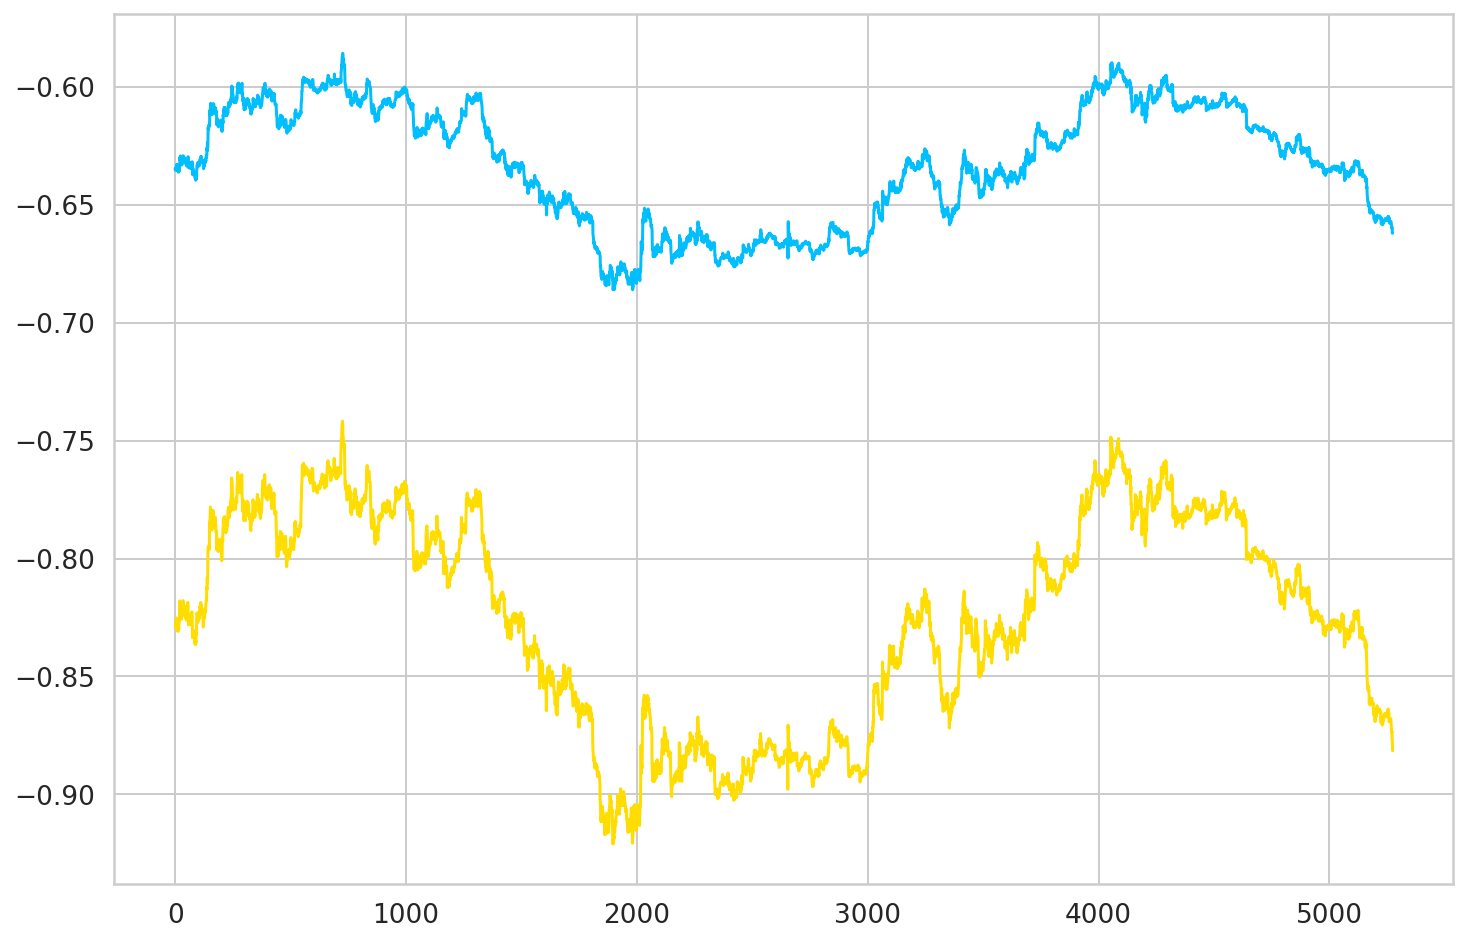

In [ ]:
plot_predictions1(model_uv_lstm_eth, X_eth_test1, y_eth_test1)

## Construct Univariate GRU Models

In [ ]:
model_GRU = Sequential()
model_GRU.add(InputLayer((6, 1)))
model_GRU.add(GRU(64))
model_GRU.add(Dense(8, 'relu'))
model_GRU.add(Dense(1, 'linear'))
model_GRU.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_GRU_eth = Sequential()
model_GRU_eth.add(InputLayer((6, 1)))
model_GRU_eth.add(GRU(64))
model_GRU_eth.add(Dense(8, 'relu'))
model_GRU_eth.add(Dense(1, 'linear'))
model_GRU_eth.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 64)                12864     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


## Set Model Checkpoint and Complie

In [ ]:
cp2_es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
cp2 = ModelCheckpoint('model_GRU/', save_best_only=True)
model_GRU.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
cp2_eth_es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
cp2_eth = ModelCheckpoint('model_GRU_eth/', save_best_only=True)
model_GRU_eth.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

## Train Univariate GRU Models 

In [ ]:
model_GRU.fit(GRU_X_train1, GRU_y_train1, validation_data=(GRU_X_val1, GRU_y_val1), epochs=100, callbacks=[cp2_es,cp2])

Epoch 1/100
1406/1407 [============================>.] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.0396

INFO:tensorflow:Assets written to: model_GRU/assets


INFO:tensorflow:Assets written to: model_GRU/assets


1407/1407 [==============================] - 10s 6ms/step - loss: 0.0016 - root_mean_squared_error: 0.0396 - val_loss: 0.0399 - val_root_mean_squared_error: 0.1997
Epoch 2/100
1395/1407 [============================>.] - ETA: 0s - loss: 4.7556e-05 - root_mean_squared_error: 0.0069

INFO:tensorflow:Assets written to: model_GRU/assets


INFO:tensorflow:Assets written to: model_GRU/assets


1407/1407 [==============================] - 8s 5ms/step - loss: 4.7560e-05 - root_mean_squared_error: 0.0069 - val_loss: 0.0246 - val_root_mean_squared_error: 0.1568
Epoch 3/100
1391/1407 [============================>.] - ETA: 0s - loss: 4.5243e-05 - root_mean_squared_error: 0.0067

INFO:tensorflow:Assets written to: model_GRU/assets


INFO:tensorflow:Assets written to: model_GRU/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 4.5204e-05 - root_mean_squared_error: 0.0067 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1495
Epoch 4/100
1394/1407 [============================>.] - ETA: 0s - loss: 4.2036e-05 - root_mean_squared_error: 0.0065

INFO:tensorflow:Assets written to: model_GRU/assets


INFO:tensorflow:Assets written to: model_GRU/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 4.2097e-05 - root_mean_squared_error: 0.0065 - val_loss: 0.0220 - val_root_mean_squared_error: 0.1485
Epoch 5/100
1400/1407 [============================>.] - ETA: 0s - loss: 4.1367e-05 - root_mean_squared_error: 0.0064

INFO:tensorflow:Assets written to: model_GRU/assets


INFO:tensorflow:Assets written to: model_GRU/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 4.1330e-05 - root_mean_squared_error: 0.0064 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1304
Epoch 6/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.7223e-05 - root_mean_squared_error: 0.0061 - val_loss: 0.0196 - val_root_mean_squared_error: 0.1400
Epoch 7/100
1400/1407 [============================>.] - ETA: 0s - loss: 3.6666e-05 - root_mean_squared_error: 0.0061

INFO:tensorflow:Assets written to: model_GRU/assets


INFO:tensorflow:Assets written to: model_GRU/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.6701e-05 - root_mean_squared_error: 0.0061 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1303
Epoch 8/100
1391/1407 [============================>.] - ETA: 0s - loss: 3.6294e-05 - root_mean_squared_error: 0.0060

INFO:tensorflow:Assets written to: model_GRU/assets


INFO:tensorflow:Assets written to: model_GRU/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.6199e-05 - root_mean_squared_error: 0.0060 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1227
Epoch 9/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.5361e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1246
Epoch 10/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.4982e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0189 - val_root_mean_squared_error: 0.1376
Epoch 11/100
1396/1407 [============================>.] - ETA: 0s - loss: 3.5266e-05 - root_mean_squared_error: 0.0059

INFO:tensorflow:Assets written to: model_GRU/assets


INFO:tensorflow:Assets written to: model_GRU/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.5192e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0105 - val_root_mean_squared_error: 0.1026
Epoch 12/100
1405/1407 [============================>.] - ETA: 0s - loss: 3.3811e-05 - root_mean_squared_error: 0.0058

INFO:tensorflow:Assets written to: model_GRU/assets


INFO:tensorflow:Assets written to: model_GRU/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.3826e-05 - root_mean_squared_error: 0.0058 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0999
Epoch 13/100
1395/1407 [============================>.] - ETA: 0s - loss: 3.4361e-05 - root_mean_squared_error: 0.0059

INFO:tensorflow:Assets written to: model_GRU/assets


INFO:tensorflow:Assets written to: model_GRU/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 3.4308e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0974
Epoch 14/100
1394/1407 [============================>.] - ETA: 0s - loss: 3.3389e-05 - root_mean_squared_error: 0.0058

INFO:tensorflow:Assets written to: model_GRU/assets


INFO:tensorflow:Assets written to: model_GRU/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.3365e-05 - root_mean_squared_error: 0.0058 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0809
Epoch 15/100
1397/1407 [============================>.] - ETA: 0s - loss: 3.4382e-05 - root_mean_squared_error: 0.0059

INFO:tensorflow:Assets written to: model_GRU/assets


INFO:tensorflow:Assets written to: model_GRU/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.4362e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0749
Epoch 16/100
1394/1407 [============================>.] - ETA: 0s - loss: 3.3097e-05 - root_mean_squared_error: 0.0058

INFO:tensorflow:Assets written to: model_GRU/assets


INFO:tensorflow:Assets written to: model_GRU/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.3047e-05 - root_mean_squared_error: 0.0057 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0372
Epoch 17/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.3852e-05 - root_mean_squared_error: 0.0058 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1086
Epoch 18/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.3666e-05 - root_mean_squared_error: 0.0058 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0615
Epoch 19/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.3600e-05 - root_mean_squared_error: 0.0058 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0859
Epoch 20/100
1403/1407 [============================>.] - ETA: 0s - loss: 3.2212e-05 - root_mean_squared_error: 0.0057

INFO:tensorflow:Assets written to: model_GRU/assets


INFO:tensorflow:Assets written to: model_GRU/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.2220e-05 - root_mean_squared_error: 0.0057 - val_loss: 7.6042e-04 - val_root_mean_squared_error: 0.0276
Epoch 21/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.3382e-05 - root_mean_squared_error: 0.0058 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0711
Epoch 22/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.2732e-05 - root_mean_squared_error: 0.0057 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0465
Epoch 23/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.2473e-05 - root_mean_squared_error: 0.0057 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0806
Epoch 24/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.3238e-05 - root_mean_squared_error: 0.0058 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0932
Epoch 25/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.2536e-05 - root_mean_squared_

In [ ]:
model_GRU_eth.fit(GRU_X_eth_train1, GRU_y_eth_train1, validation_data=(GRU_X_eth_val1, GRU_y_eth_val1), epochs=100, callbacks=[cp2_eth_es,cp2_eth])

Epoch 1/100
1403/1407 [============================>.] - ETA: 0s - loss: 7.6445e-04 - root_mean_squared_error: 0.0276

INFO:tensorflow:Assets written to: model_GRU_eth/assets


INFO:tensorflow:Assets written to: model_GRU_eth/assets


1407/1407 [==============================] - 10s 6ms/step - loss: 7.6281e-04 - root_mean_squared_error: 0.0276 - val_loss: 0.0461 - val_root_mean_squared_error: 0.2148
Epoch 2/100
1393/1407 [============================>.] - ETA: 0s - loss: 3.6414e-05 - root_mean_squared_error: 0.0060

INFO:tensorflow:Assets written to: model_GRU_eth/assets


INFO:tensorflow:Assets written to: model_GRU_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.6450e-05 - root_mean_squared_error: 0.0060 - val_loss: 0.0452 - val_root_mean_squared_error: 0.2126
Epoch 3/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.4789e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0466 - val_root_mean_squared_error: 0.2159
Epoch 4/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.2080e-05 - root_mean_squared_error: 0.0057 - val_loss: 0.0493 - val_root_mean_squared_error: 0.2221
Epoch 5/100
1404/1407 [============================>.] - ETA: 0s - loss: 3.1262e-05 - root_mean_squared_error: 0.0056

INFO:tensorflow:Assets written to: model_GRU_eth/assets


INFO:tensorflow:Assets written to: model_GRU_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.1271e-05 - root_mean_squared_error: 0.0056 - val_loss: 0.0366 - val_root_mean_squared_error: 0.1914
Epoch 6/100
1406/1407 [============================>.] - ETA: 0s - loss: 2.8709e-05 - root_mean_squared_error: 0.0054

INFO:tensorflow:Assets written to: model_GRU_eth/assets


INFO:tensorflow:Assets written to: model_GRU_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 2.8708e-05 - root_mean_squared_error: 0.0054 - val_loss: 0.0253 - val_root_mean_squared_error: 0.1591
Epoch 7/100
1406/1407 [============================>.] - ETA: 0s - loss: 2.8233e-05 - root_mean_squared_error: 0.0053

INFO:tensorflow:Assets written to: model_GRU_eth/assets


INFO:tensorflow:Assets written to: model_GRU_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 2.8234e-05 - root_mean_squared_error: 0.0053 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1212
Epoch 8/100
1407/1407 [==============================] - 4s 3ms/step - loss: 2.8115e-05 - root_mean_squared_error: 0.0053 - val_loss: 0.0182 - val_root_mean_squared_error: 0.1347
Epoch 9/100
1400/1407 [============================>.] - ETA: 0s - loss: 2.7441e-05 - root_mean_squared_error: 0.0052

INFO:tensorflow:Assets written to: model_GRU_eth/assets


INFO:tensorflow:Assets written to: model_GRU_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 2.7426e-05 - root_mean_squared_error: 0.0052 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0692
Epoch 10/100
1398/1407 [============================>.] - ETA: 0s - loss: 2.6765e-05 - root_mean_squared_error: 0.0052

INFO:tensorflow:Assets written to: model_GRU_eth/assets


INFO:tensorflow:Assets written to: model_GRU_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 2.6740e-05 - root_mean_squared_error: 0.0052 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0371
Epoch 11/100
1399/1407 [============================>.] - ETA: 0s - loss: 2.7090e-05 - root_mean_squared_error: 0.0052

INFO:tensorflow:Assets written to: model_GRU_eth/assets


INFO:tensorflow:Assets written to: model_GRU_eth/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 2.7056e-05 - root_mean_squared_error: 0.0052 - val_loss: 1.0681e-04 - val_root_mean_squared_error: 0.0103
Epoch 12/100
1392/1407 [============================>.] - ETA: 0s - loss: 2.7028e-05 - root_mean_squared_error: 0.0052

INFO:tensorflow:Assets written to: model_GRU_eth/assets


INFO:tensorflow:Assets written to: model_GRU_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 2.7012e-05 - root_mean_squared_error: 0.0052 - val_loss: 1.6629e-05 - val_root_mean_squared_error: 0.0041
Epoch 13/100
1407/1407 [==============================] - 5s 3ms/step - loss: 2.6707e-05 - root_mean_squared_error: 0.0052 - val_loss: 1.0126e-04 - val_root_mean_squared_error: 0.0101
Epoch 14/100
1407/1407 [==============================] - 5s 3ms/step - loss: 2.6764e-05 - root_mean_squared_error: 0.0052 - val_loss: 4.0091e-05 - val_root_mean_squared_error: 0.0063
Epoch 15/100
1407/1407 [==============================] - 5s 3ms/step - loss: 2.7369e-05 - root_mean_squared_error: 0.0052 - val_loss: 2.6589e-04 - val_root_mean_squared_error: 0.0163
Epoch 16/100
1407/1407 [==============================] - 5s 3ms/step - loss: 2.6021e-05 - root_mean_squared_error: 0.0051 - val_loss: 3.7219e-04 - val_root_mean_squared_error: 0.0193
Epoch 17/100
1407/1407 [==============================] - 5s 3ms/step - loss: 2.6805e-05 - ro

## Plot Predictions for univariate GRU Models

### Plot predictions - model_GRU

(       Predictions   Actuals
 0         0.884171  0.878375
 1         0.882188  0.885595
 2         0.889759  0.891870
 3         0.895761  0.894791
 4         0.898617  0.901556
 ...            ...       ...
 44995    -0.077910 -0.081226
 44996    -0.078278 -0.084272
 44997    -0.081306 -0.087185
 44998    -0.084091 -0.092333
 44999    -0.089182 -0.093579
 
 [45000 rows x 2 columns], 3.554071230187623e-05)

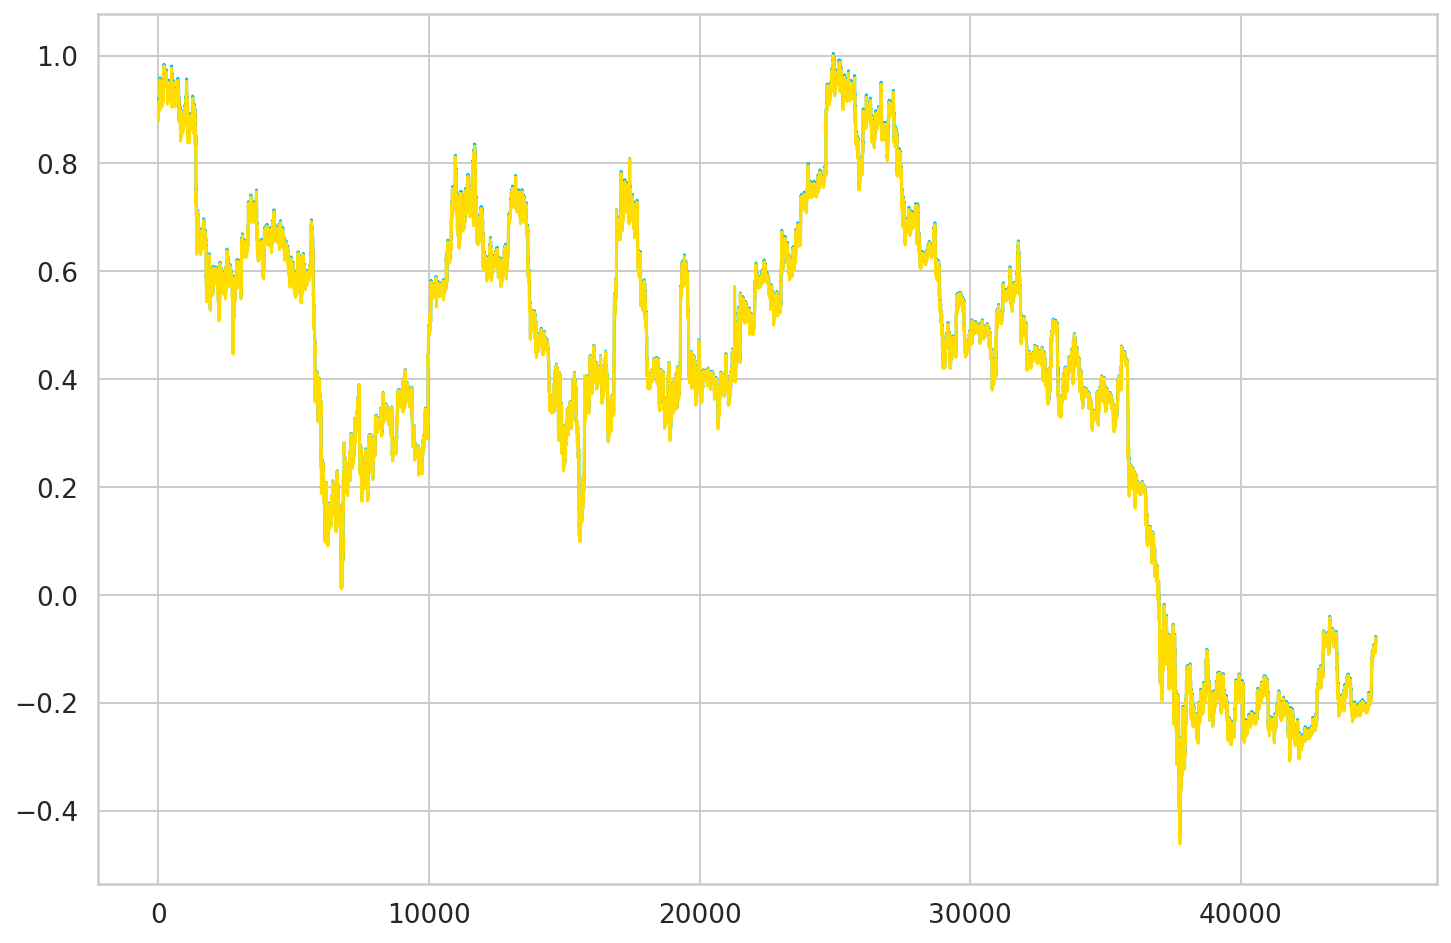

In [ ]:
plot_predictions1(model_GRU, GRU_X_train1, GRU_y_train1)

(      Predictions   Actuals
 0       -0.090456 -0.096840
 1       -0.093838 -0.101056
 2       -0.097889 -0.103126
 3       -0.100010 -0.116073
 4       -0.112632 -0.109961
 ...           ...       ...
 4995    -0.719986 -0.774502
 4996    -0.718914 -0.771328
 4997    -0.716605 -0.769867
 4998    -0.715130 -0.773450
 4999    -0.717155 -0.772455
 
 [5000 rows x 2 columns], 0.002134901428905554)

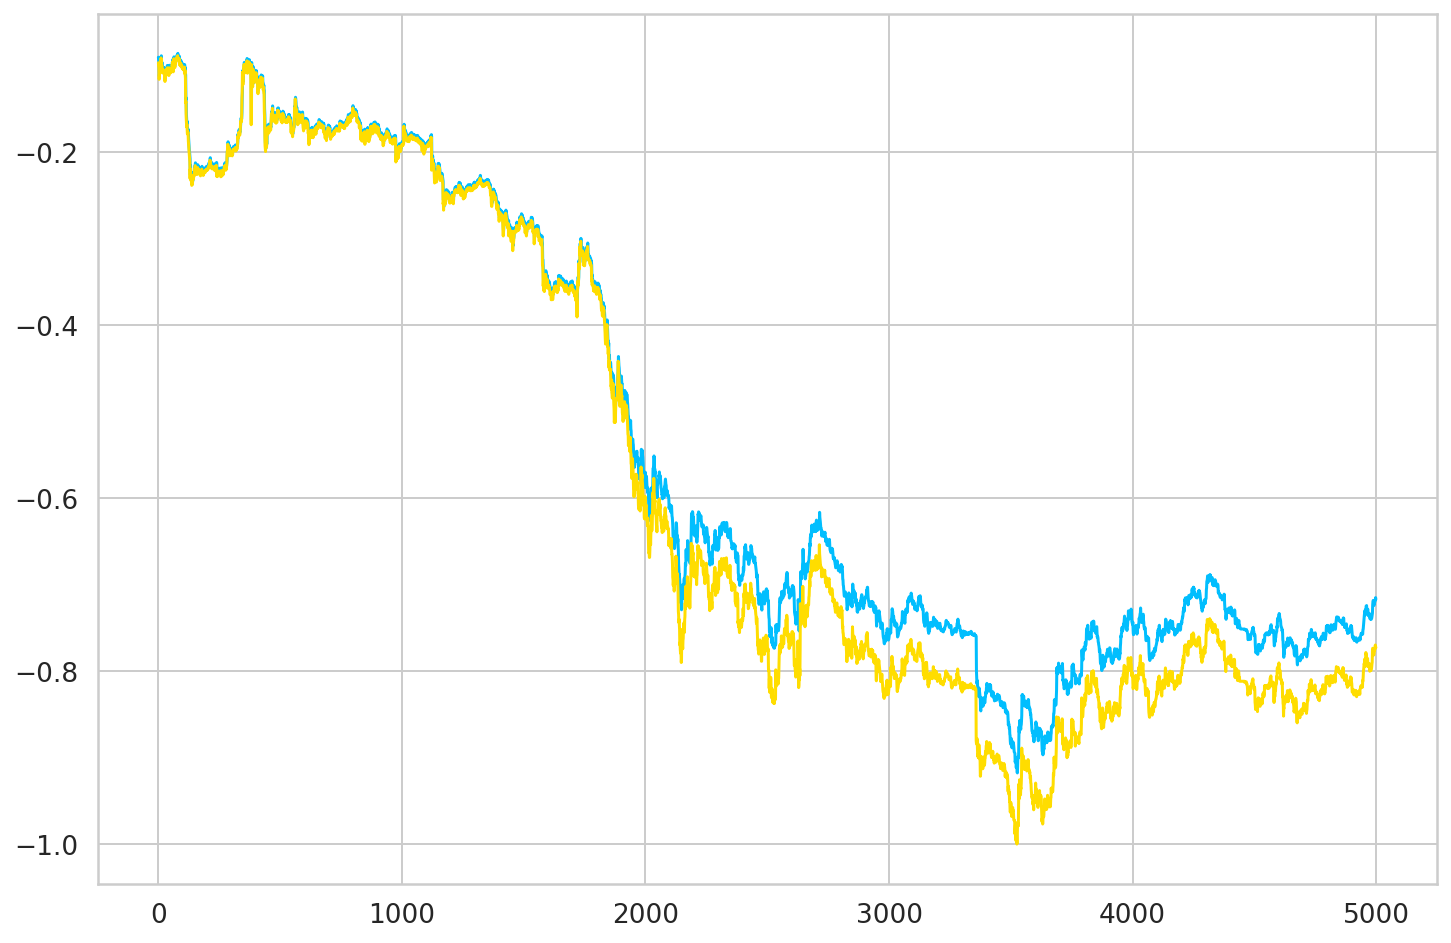

In [ ]:
plot_predictions1(model_GRU, GRU_X_val1, GRU_y_val1)

(      Predictions   Actuals
 0       -0.716729 -0.774143
 1       -0.718020 -0.774205
 2       -0.718132 -0.772726
 3       -0.717312 -0.771556
 4       -0.716359 -0.771738
 ...           ...       ...
 5270    -0.789596 -0.856011
 5271    -0.790262 -0.855788
 5272    -0.790316 -0.860783
 5273    -0.793719 -0.861937
 5274    -0.795100 -0.868828
 
 [5275 rows x 2 columns], 0.0037287066339376077)

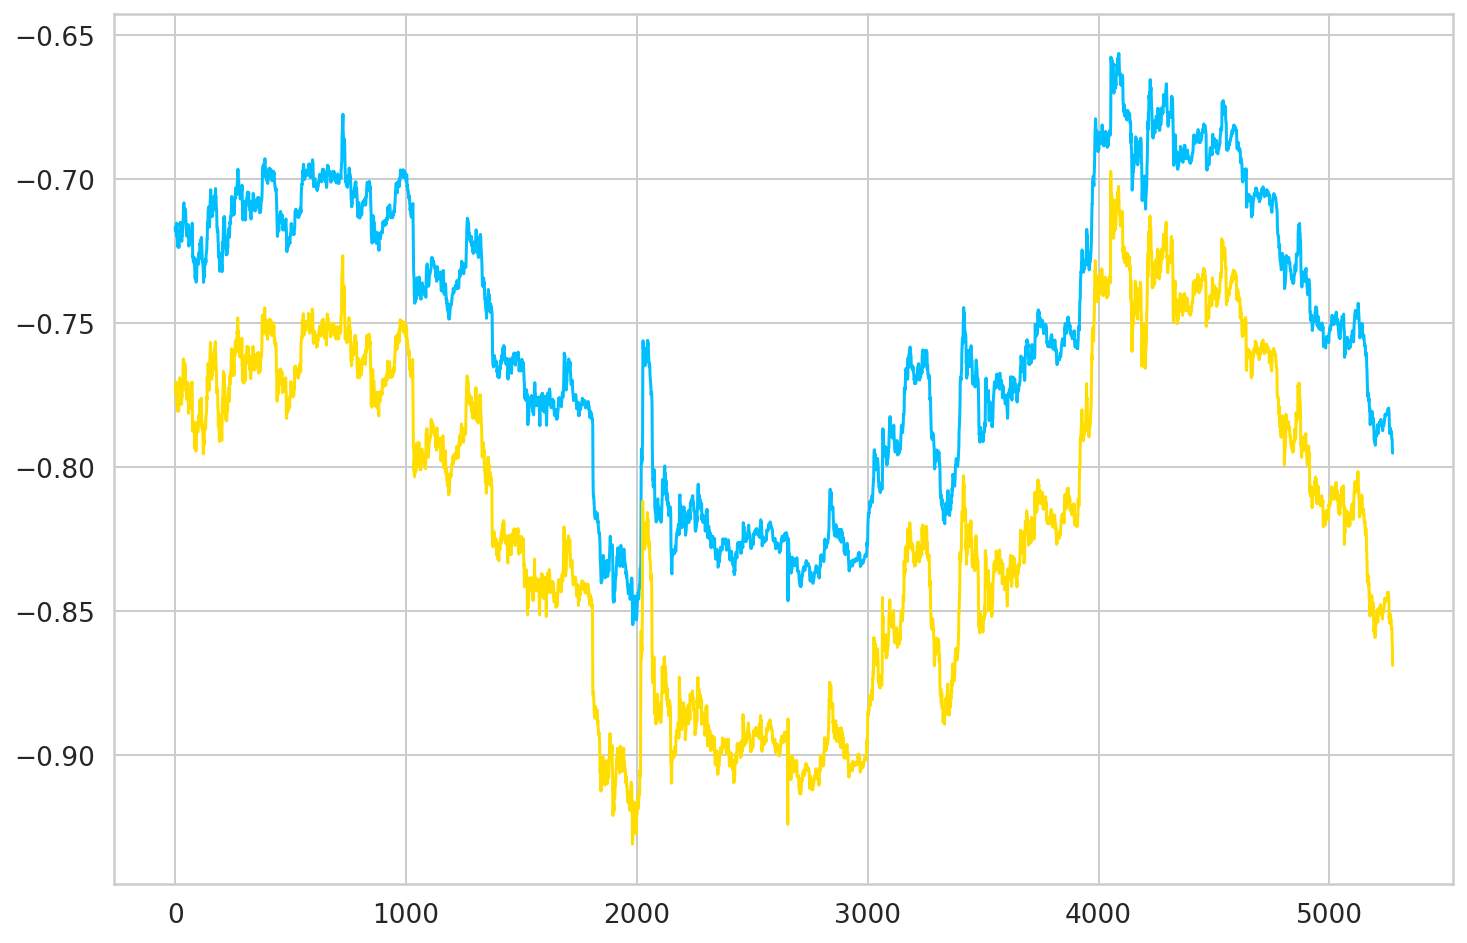

In [ ]:
plot_predictions1(model_GRU, GRU_X_test1, GRU_y_test1)

### Plot predictions - model_GRU_eth

(       Predictions   Actuals
 0         0.870220  0.871365
 1         0.868175  0.874237
 2         0.871432  0.878655
 3         0.875774  0.884685
 4         0.881761  0.889375
 ...            ...       ...
 44995    -0.323007 -0.321487
 44996    -0.323131 -0.323246
 44997    -0.324654 -0.325285
 44998    -0.326404 -0.330342
 44999    -0.330796 -0.329882
 
 [45000 rows x 2 columns], 2.3566729015942192e-05)

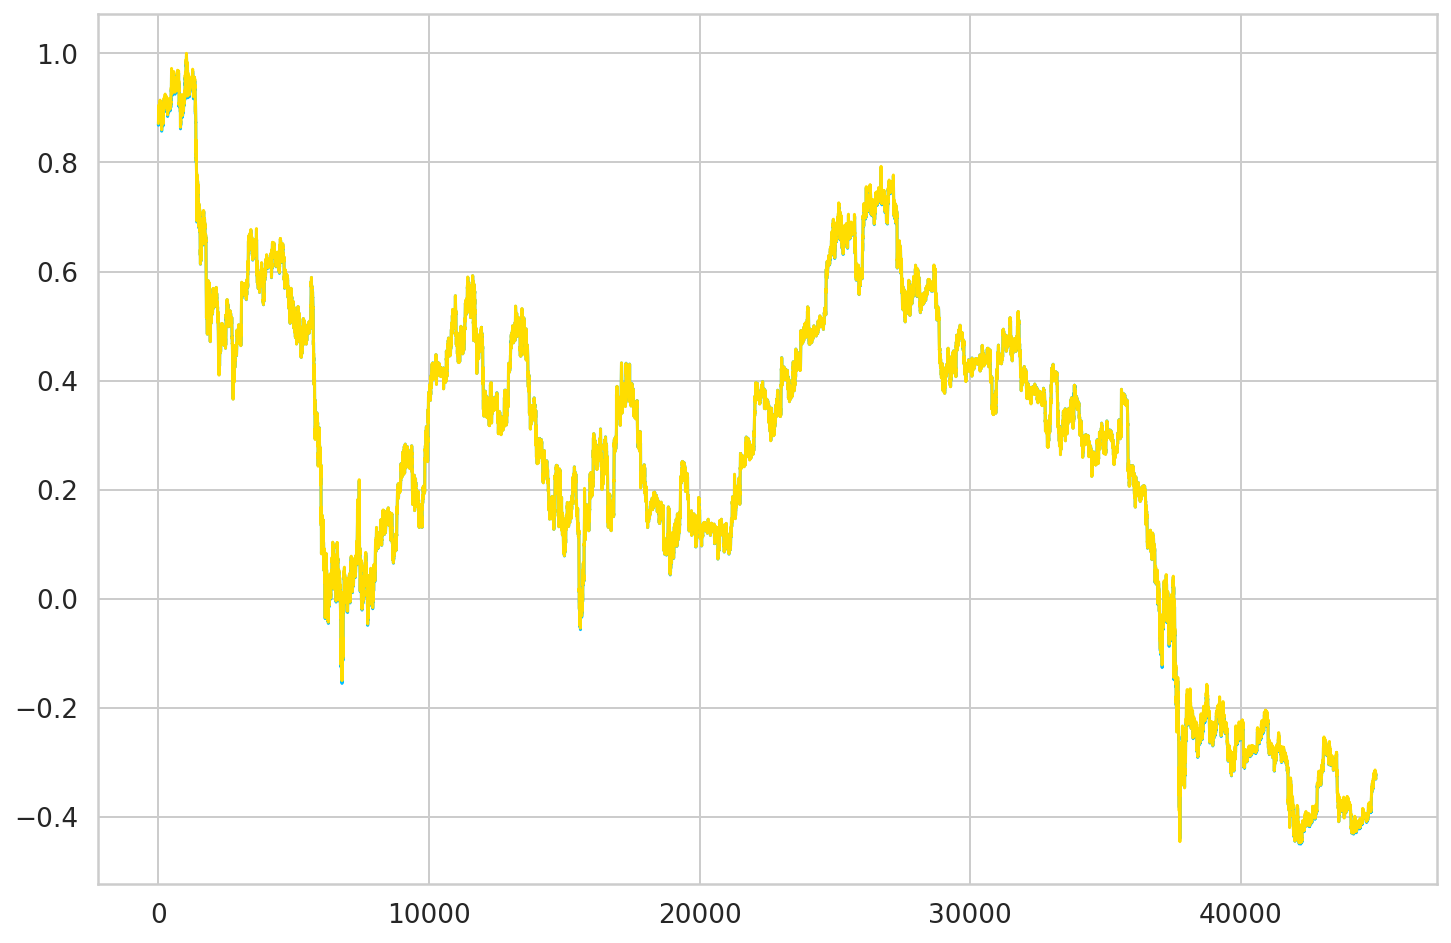

In [ ]:
plot_predictions1(model_GRU_eth, GRU_X_eth_train1, GRU_y_eth_train1)

(      Predictions   Actuals
 0       -0.330806 -0.332520
 1       -0.333400 -0.335359
 2       -0.336069 -0.338724
 3       -0.339253 -0.347059
 4       -0.346613 -0.344894
 ...           ...       ...
 4995    -0.835096 -0.829342
 4996    -0.835163 -0.827843
 4997    -0.833842 -0.827657
 4998    -0.833689 -0.827650
 4999    -0.833578 -0.827816
 
 [5000 rows x 2 columns], 3.6627288274400614e-05)

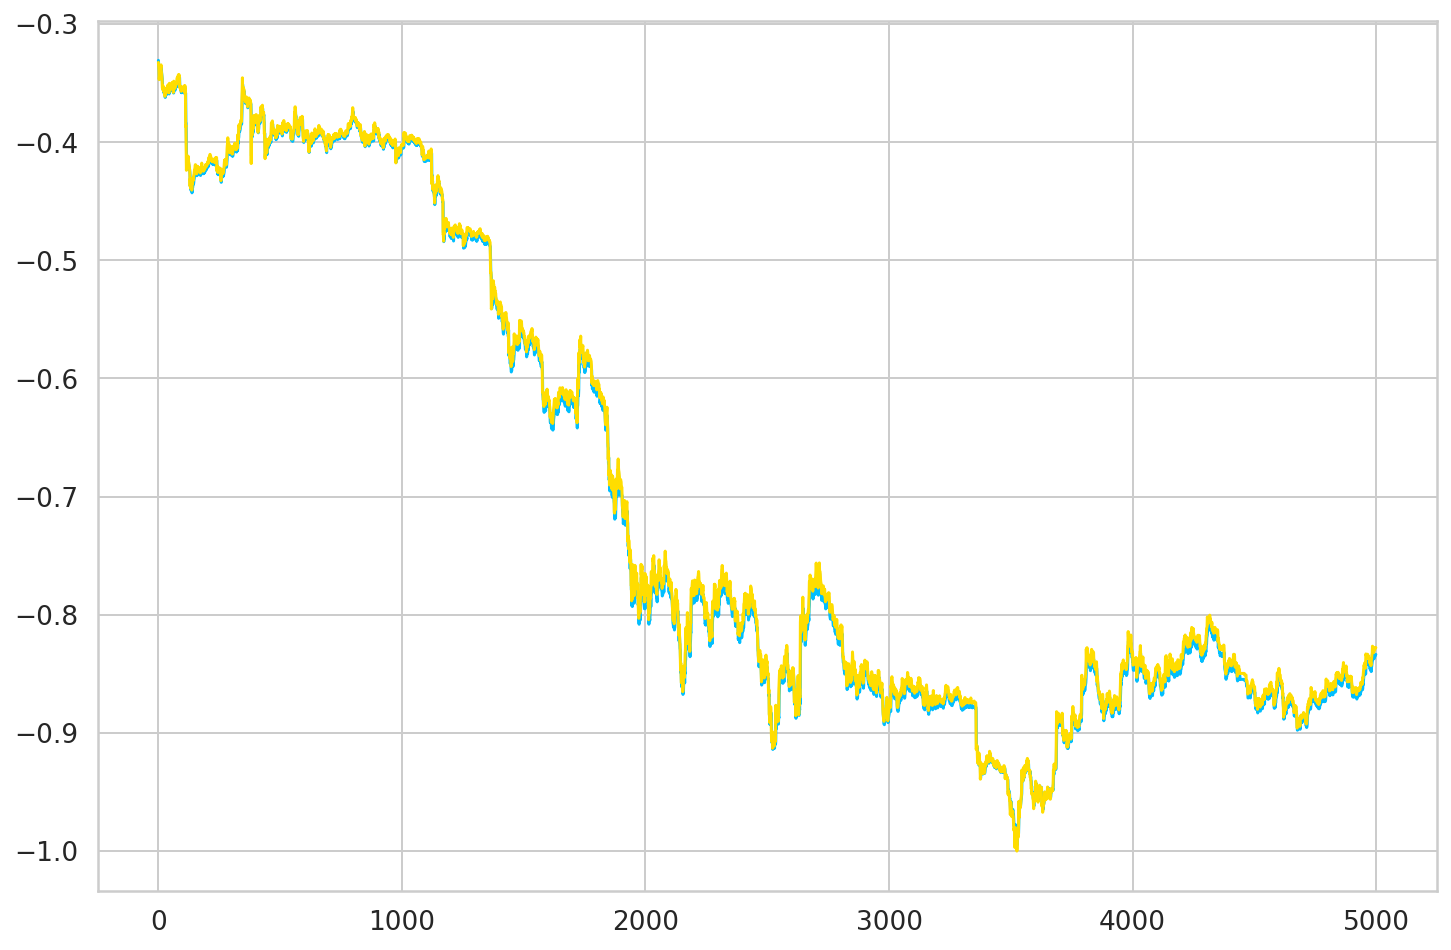

In [ ]:
plot_predictions1(model_GRU_eth, GRU_X_eth_val1, GRU_y_eth_val1)

(      Predictions   Actuals
 0       -0.833685 -0.829249
 1       -0.834885 -0.829362
 2       -0.834955 -0.828429
 3       -0.834253 -0.827510
 4       -0.833516 -0.828190
 ...           ...       ...
 5270    -0.876617 -0.873804
 5271    -0.877400 -0.873091
 5272    -0.876970 -0.876829
 5273    -0.880341 -0.877715
 5274    -0.881047 -0.881480
 
 [5275 rows x 2 columns], 3.825183980476741e-05)

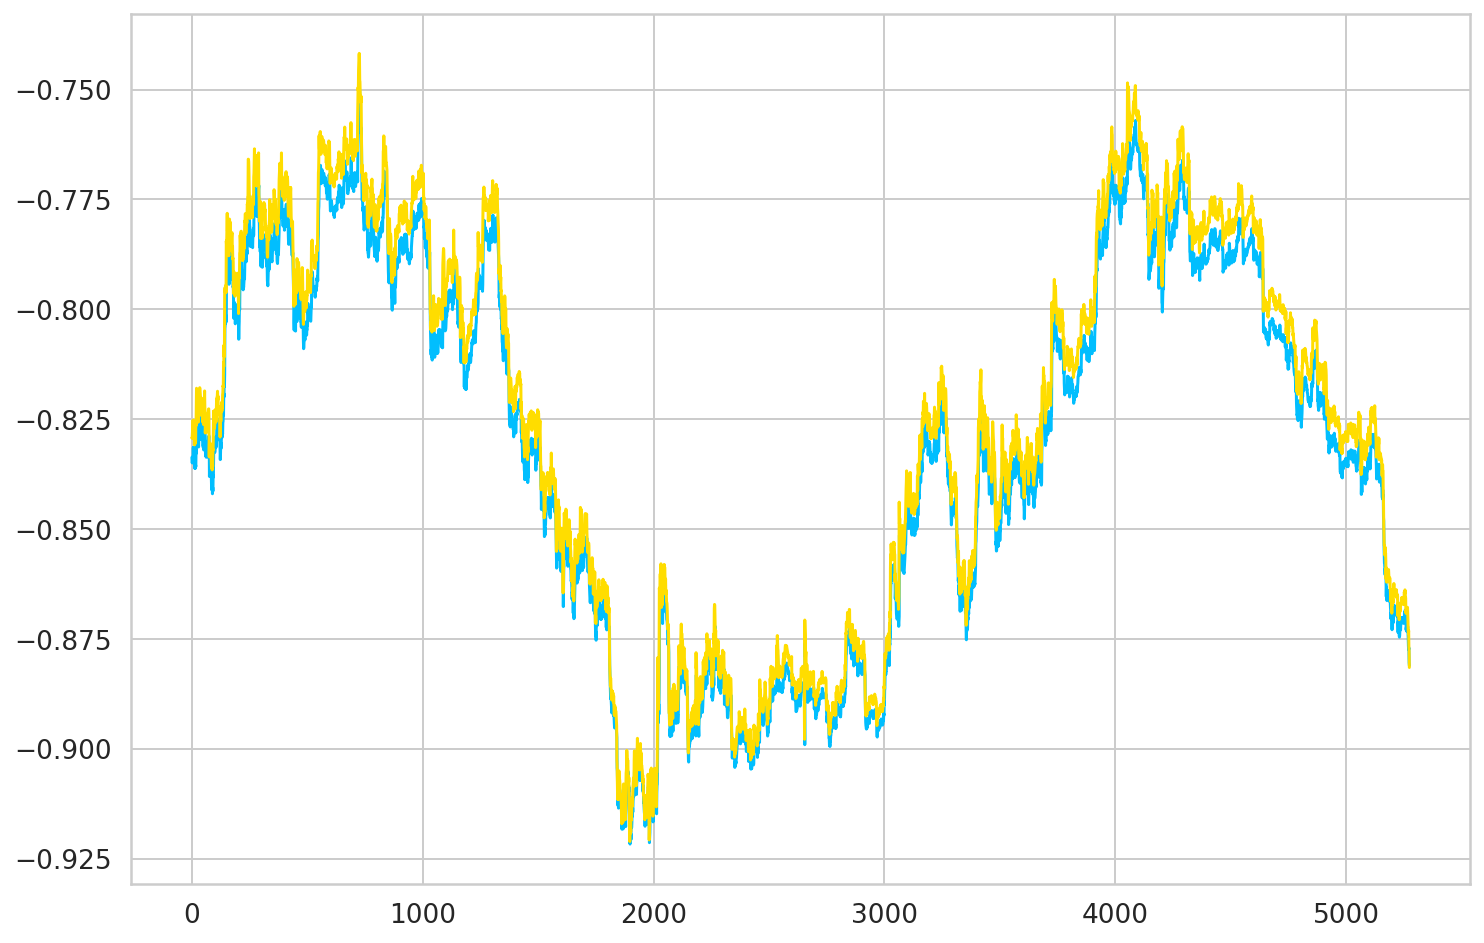

In [ ]:
plot_predictions1(model_GRU_eth, GRU_X_eth_test1, GRU_y_eth_test1)

# Part 2 - Multi Variate LSTM & GRU

## MV LSTM

## Seperate df into windowed multivariate matrices (assigned to x) with target assigned to y (the next sequence in the time series following the current window end)

In [ ]:
def df_to_Xy2(df_scaled, window_size= 6):
  df_as_np = df_scaled.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][3]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
def df_to_Xy2_eth(df_eth_scaled, window_size= 6):
  df_eth_as_np = df_eth_scaled.to_numpy()
  X_eth = []
  y_eth = []
  for i in range(len(df_eth_as_np)-window_size):
    row = [r for r in df_eth_as_np[i:i+window_size]]
    X_eth.append(row)
    label = df_eth_as_np[i+window_size][3]
    y_eth.append(label)
  return np.array(X_eth), np.array(y_eth)



In [ ]:
def df_all_to_Xy2_btc(df_all_scaled_btc, window_size= 6):
  df_all_btc_as_np = df_all_scaled_btc.to_numpy()
  X_all_btc = []
  y_all_btc = []
  for i in range(len(df_all_btc_as_np)-window_size):
    row = [r for r in df_all_btc_as_np[i:i+window_size]]
    X_all_btc.append(row)
    label = df_all_btc_as_np[i+window_size][3]
    y_all_btc.append(label)
  return np.array(X_all_btc), np.array(y_all_btc)


In [ ]:
def df_all_to_Xy2_eth(df_all_scaled_eth, window_size= 6):
  df_all_eth_as_np = df_all_scaled_eth.to_numpy()
  X_all_eth = []
  y_all_eth = []
  for i in range(len(df_all_eth_as_np)-window_size):
    row = [r for r in df_all_eth_as_np[i:i+window_size]]
    X_all_eth.append(row)
    label = df_all_eth_as_np[i+window_size][4]
    y_all_eth.append(label)
  return np.array(X_all_eth), np.array(y_all_eth)

In [ ]:
def df_all_to_Xy2(df_all_scaled, window_size= 6):
  df_all_as_np = df_all_scaled.to_numpy()
  X_all = []
  y_all = []
  for i in range(len(df_all_as_np)-window_size):
    row = [r for r in df_all_as_np[i:i+window_size]]
    X_all.append(row)
    label = df_all_as_np[i+window_size][8]
    y_all.append(label)
  return np.array(X_all), np.array(y_all)

## Shape Data

In [ ]:
X2, y2 = df_to_Xy2(df_scaled)
X2.shape, y2.shape

((55275, 6, 6), (55275,))

In [ ]:
X2_eth, y2_eth = df_to_Xy2_eth(df_eth_scaled)
X2_eth.shape, y2_eth.shape

((55275, 6, 6), (55275,))

In [ ]:
X2_all_btc, y2_all_btc = df_all_to_Xy2_btc(df_all_scaled_btc)
X2_all_btc.shape, y2_all_btc.shape

((55275, 6, 8), (55275,))

In [ ]:
X2_all_eth, y2_all_eth = df_all_to_Xy2_eth(df_all_scaled_eth)
X2_all_eth.shape, y2_all_eth.shape

((55275, 6, 8), (55275,))

In [ ]:
X2_all, y2_all = df_all_to_Xy2(df_all_scaled)
X2_all.shape, y2_all.shape

((55275, 6, 12), (55275,))

## Split data into; Train(x,y), validation(x,y) and test(x,y) matrices:

In [ ]:
X_train2, y_train2 = X2[:45000], y2[:45000]
X_val2, y_val2 = X2[45000:50000], y2[45000:50000]
X_test2, y_test2 = X2[50000:], y2[50000:]
X_train2.shape, y_train2.shape, X_val2.shape, y_val2.shape, X_test2.shape, y_test2.shape

((45000, 6, 6), (45000,), (5000, 6, 6), (5000,), (5275, 6, 6), (5275,))

In [ ]:
X_eth_train2, y_eth_train2 = X2_eth[:45000], y2_eth[:45000]
X_eth_val2, y_eth_val2 = X2_eth[45000:50000], y2_eth[45000:50000]
X_eth_test2, y_eth_test2 = X2_eth[50000:], y2_eth[50000:]
X_eth_train2.shape, y_eth_train2.shape, X_eth_val2.shape, y_eth_val2.shape, X_eth_test2.shape, y_eth_test2.shape

((45000, 6, 6), (45000,), (5000, 6, 6), (5000,), (5275, 6, 6), (5275,))

In [ ]:
X_btc_all_train2, y_btc_all_train2 = X2_all_btc[:45000], y2_all_btc[:45000]
X_btc_all_val2, y_btc_all_val2 = X2_all_btc[45000:50000], y2_all_btc[45000:50000]
X_btc_all_test2, y_btc_all_test2 = X2_all_btc[50000:], y2_all_btc[50000:]
X_btc_all_train2.shape, y_btc_all_train2.shape, X_btc_all_val2.shape, y_btc_all_val2.shape, X_btc_all_test2.shape, y_btc_all_test2.shape

((45000, 6, 8), (45000,), (5000, 6, 8), (5000,), (5275, 6, 8), (5275,))

In [ ]:
X_eth_all_train2, y_eth_all_train2 = X2_all_eth[:45000], y2_all_eth[:45000]
X_eth_all_val2, y_eth_all_val2 = X2_all_eth[45000:50000], y2_all_eth[45000:50000]
X_eth_all_test2, y_eth_all_test2 = X2_all_eth[50000:], y2_all_eth[50000:]
X_eth_all_train2.shape, y_eth_all_train2.shape, X_eth_all_val2.shape, y_eth_all_val2.shape, X_eth_all_test2.shape, y_eth_all_test2.shape

((45000, 6, 8), (45000,), (5000, 6, 8), (5000,), (5275, 6, 8), (5275,))

In [ ]:
X_all_train2, y_all_train2 = X2_all[:45000], y2_all[:45000]
X_all_val2, y_all_val2 = X2_all[45000:50000], y2_all[45000:50000]
X_all_test2, y_all_test2 = X2_all[50000:], y2_all[50000:]
X_all_train2.shape, y_all_train2.shape, X_all_val2.shape, y_btc_all_val2.shape, X_all_test2.shape, y_all_test2.shape

((45000, 6, 12), (45000,), (5000, 6, 12), (5000,), (5275, 6, 12), (5275,))

## Construct Multi Variate LSTM Models

In [ ]:
model_mv_lstm = Sequential()
model_mv_lstm.add(InputLayer((6, 6)))
model_mv_lstm.add(LSTM(64))
model_mv_lstm.add(Dense(8, 'relu'))
model_mv_lstm.add(Dense(1, 'linear'))

model_mv_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                18176     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,705
Trainable params: 18,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_mv_lstm_eth = Sequential()
model_mv_lstm_eth.add(InputLayer((6, 6)))
model_mv_lstm_eth.add(LSTM(64))
model_mv_lstm_eth.add(Dense(8, 'relu'))
model_mv_lstm_eth.add(Dense(1, 'linear'))

model_mv_lstm_eth.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                18176     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18,705
Trainable params: 18,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_mv_lstm_all_btc = Sequential()
model_mv_lstm_all_btc.add(InputLayer((6, 8)))
model_mv_lstm_all_btc.add(LSTM(64))
model_mv_lstm_all_btc.add(Dense(8, 'relu'))
model_mv_lstm_all_btc.add(Dense(1, 'linear'))

model_mv_lstm_all_btc.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                18688     
                                                                 
 dense_12 (Dense)            (None, 8)                 520       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 19,217
Trainable params: 19,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_mv_lstm_all_eth = Sequential()
model_mv_lstm_all_eth.add(InputLayer((6, 8)))
model_mv_lstm_all_eth.add(LSTM(64))
model_mv_lstm_all_eth.add(Dense(8, 'relu'))
model_mv_lstm_all_eth.add(Dense(1, 'linear'))

model_mv_lstm_all_eth.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 64)                18688     
                                                                 
 dense_14 (Dense)            (None, 8)                 520       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 19,217
Trainable params: 19,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_mv_lstm_all = Sequential()
model_mv_lstm_all.add(InputLayer((6, 12)))
model_mv_lstm_all.add(LSTM(64))
model_mv_lstm_all.add(Dense(8, 'relu'))
model_mv_lstm_all.add(Dense(1, 'linear'))

model_mv_lstm_all.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                19712     
                                                                 
 dense_16 (Dense)            (None, 8)                 520       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 20,241
Trainable params: 20,241
Non-trainable params: 0
_________________________________________________________________


## Save Checkpoint & Compile Multi Variate LSTM Models

In [ ]:
ES_cp3= EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
cp3 = ModelCheckpoint('model_mv_lstm/', save_best_only=True)
model_mv_lstm.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
ES_cp3_eth= EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
cp3_eth = ModelCheckpoint('model_mv_lstm_eth/', save_best_only=True)
model_mv_lstm_eth.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
ES_cp3_all_btc= EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
cp3_all_btc = ModelCheckpoint('model_mv_lstm_all_btc/', save_best_only=True)
model_mv_lstm_all_btc.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
ES_cp3_all_eth= EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
cp3_all_eth = ModelCheckpoint('model_mv_lstm_all_eth/', save_best_only=True)
model_mv_lstm_all_eth.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
ES_cp3_all= EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
cp3_all = ModelCheckpoint('model_mv_lstm_all/', save_best_only=True)
model_mv_lstm_all.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

##Train MV LSTM MODELS

In [ ]:
model_mv_lstm.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=100, callbacks=[ES_cp3,cp3])                   

Epoch 1/100
1402/1407 [============================>.] - ETA: 0s - loss: 4.3852e-04 - root_mean_squared_error: 0.0209

INFO:tensorflow:Assets written to: model_mv_lstm/assets


INFO:tensorflow:Assets written to: model_mv_lstm/assets


1407/1407 [==============================] - 10s 6ms/step - loss: 4.3731e-04 - root_mean_squared_error: 0.0209 - val_loss: 0.0545 - val_root_mean_squared_error: 0.2335
Epoch 2/100
1402/1407 [============================>.] - ETA: 0s - loss: 4.5402e-05 - root_mean_squared_error: 0.0067

INFO:tensorflow:Assets written to: model_mv_lstm/assets


INFO:tensorflow:Assets written to: model_mv_lstm/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 4.5360e-05 - root_mean_squared_error: 0.0067 - val_loss: 0.0492 - val_root_mean_squared_error: 0.2217
Epoch 3/100
1396/1407 [============================>.] - ETA: 0s - loss: 4.4561e-05 - root_mean_squared_error: 0.0067

INFO:tensorflow:Assets written to: model_mv_lstm/assets


INFO:tensorflow:Assets written to: model_mv_lstm/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 4.4518e-05 - root_mean_squared_error: 0.0067 - val_loss: 0.0462 - val_root_mean_squared_error: 0.2149
Epoch 4/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.9281e-05 - root_mean_squared_error: 0.0063 - val_loss: 0.0463 - val_root_mean_squared_error: 0.2153
Epoch 5/100
1393/1407 [============================>.] - ETA: 0s - loss: 3.8989e-05 - root_mean_squared_error: 0.0062

INFO:tensorflow:Assets written to: model_mv_lstm/assets


INFO:tensorflow:Assets written to: model_mv_lstm/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.9011e-05 - root_mean_squared_error: 0.0062 - val_loss: 0.0265 - val_root_mean_squared_error: 0.1628
Epoch 6/100
1407/1407 [==============================] - 5s 3ms/step - loss: 4.0934e-05 - root_mean_squared_error: 0.0064 - val_loss: 0.0294 - val_root_mean_squared_error: 0.1716
Epoch 7/100
1402/1407 [============================>.] - ETA: 0s - loss: 3.9493e-05 - root_mean_squared_error: 0.0063

INFO:tensorflow:Assets written to: model_mv_lstm/assets


INFO:tensorflow:Assets written to: model_mv_lstm/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 3.9499e-05 - root_mean_squared_error: 0.0063 - val_loss: 0.0208 - val_root_mean_squared_error: 0.1443
Epoch 8/100
1401/1407 [============================>.] - ETA: 0s - loss: 3.7854e-05 - root_mean_squared_error: 0.0062

INFO:tensorflow:Assets written to: model_mv_lstm/assets


INFO:tensorflow:Assets written to: model_mv_lstm/assets


1407/1407 [==============================] - 9s 7ms/step - loss: 3.7816e-05 - root_mean_squared_error: 0.0061 - val_loss: 0.0189 - val_root_mean_squared_error: 0.1375
Epoch 9/100
1394/1407 [============================>.] - ETA: 0s - loss: 3.7515e-05 - root_mean_squared_error: 0.0061

INFO:tensorflow:Assets written to: model_mv_lstm/assets


INFO:tensorflow:Assets written to: model_mv_lstm/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 3.7466e-05 - root_mean_squared_error: 0.0061 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0953
Epoch 10/100
1392/1407 [============================>.] - ETA: 0s - loss: 3.6534e-05 - root_mean_squared_error: 0.0060

INFO:tensorflow:Assets written to: model_mv_lstm/assets


INFO:tensorflow:Assets written to: model_mv_lstm/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.6524e-05 - root_mean_squared_error: 0.0060 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0522
Epoch 11/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.6422e-05 - root_mean_squared_error: 0.0060 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0568
Epoch 12/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.4771e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0547
Epoch 13/100
1401/1407 [============================>.] - ETA: 0s - loss: 3.6014e-05 - root_mean_squared_error: 0.0060

INFO:tensorflow:Assets written to: model_mv_lstm/assets


INFO:tensorflow:Assets written to: model_mv_lstm/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 3.5972e-05 - root_mean_squared_error: 0.0060 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0357
Epoch 14/100
1398/1407 [============================>.] - ETA: 0s - loss: 3.5124e-05 - root_mean_squared_error: 0.0059

INFO:tensorflow:Assets written to: model_mv_lstm/assets


INFO:tensorflow:Assets written to: model_mv_lstm/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 3.5111e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0353
Epoch 15/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.5510e-05 - root_mean_squared_error: 0.0060 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0385
Epoch 16/100
1396/1407 [============================>.] - ETA: 0s - loss: 3.4981e-05 - root_mean_squared_error: 0.0059

INFO:tensorflow:Assets written to: model_mv_lstm/assets


INFO:tensorflow:Assets written to: model_mv_lstm/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 3.4913e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0326
Epoch 17/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.5480e-05 - root_mean_squared_error: 0.0060 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0637
Epoch 18/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.4587e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0421
Epoch 19/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.5124e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0443
Epoch 20/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.3974e-05 - root_mean_squared_error: 0.0058 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0346
Epoch 21/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.4625e-05 - root_mean_squared_erro

In [ ]:
model_mv_lstm_eth.fit(X_eth_train2, y_eth_train2, validation_data=(X_eth_val2, y_eth_val2), epochs=100, callbacks=[ES_cp3_eth,cp3_eth])

Epoch 1/100
1401/1407 [============================>.] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.0605

INFO:tensorflow:Assets written to: model_mv_lstm_eth/assets


INFO:tensorflow:Assets written to: model_mv_lstm_eth/assets


1407/1407 [==============================] - 11s 6ms/step - loss: 0.0036 - root_mean_squared_error: 0.0604 - val_loss: 0.0331 - val_root_mean_squared_error: 0.1819
Epoch 2/100
1406/1407 [============================>.] - ETA: 0s - loss: 3.7221e-05 - root_mean_squared_error: 0.0061

INFO:tensorflow:Assets written to: model_mv_lstm_eth/assets


INFO:tensorflow:Assets written to: model_mv_lstm_eth/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 3.7218e-05 - root_mean_squared_error: 0.0061 - val_loss: 0.0294 - val_root_mean_squared_error: 0.1715
Epoch 3/100
1395/1407 [============================>.] - ETA: 0s - loss: 3.9266e-05 - root_mean_squared_error: 0.0063

INFO:tensorflow:Assets written to: model_mv_lstm_eth/assets


INFO:tensorflow:Assets written to: model_mv_lstm_eth/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 3.9222e-05 - root_mean_squared_error: 0.0063 - val_loss: 0.0248 - val_root_mean_squared_error: 0.1574
Epoch 4/100
1391/1407 [============================>.] - ETA: 0s - loss: 3.5712e-05 - root_mean_squared_error: 0.0060

INFO:tensorflow:Assets written to: model_mv_lstm_eth/assets


INFO:tensorflow:Assets written to: model_mv_lstm_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.5792e-05 - root_mean_squared_error: 0.0060 - val_loss: 0.0177 - val_root_mean_squared_error: 0.1331
Epoch 5/100
1401/1407 [============================>.] - ETA: 0s - loss: 3.5163e-05 - root_mean_squared_error: 0.0059

INFO:tensorflow:Assets written to: model_mv_lstm_eth/assets


INFO:tensorflow:Assets written to: model_mv_lstm_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.5395e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1208
Epoch 6/100
1394/1407 [============================>.] - ETA: 0s - loss: 3.7098e-05 - root_mean_squared_error: 0.0061

INFO:tensorflow:Assets written to: model_mv_lstm_eth/assets


INFO:tensorflow:Assets written to: model_mv_lstm_eth/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 3.7130e-05 - root_mean_squared_error: 0.0061 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0996
Epoch 7/100
1395/1407 [============================>.] - ETA: 0s - loss: 3.5070e-05 - root_mean_squared_error: 0.0059

INFO:tensorflow:Assets written to: model_mv_lstm_eth/assets


INFO:tensorflow:Assets written to: model_mv_lstm_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.5052e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0822
Epoch 8/100
1396/1407 [============================>.] - ETA: 0s - loss: 3.2688e-05 - root_mean_squared_error: 0.0057

INFO:tensorflow:Assets written to: model_mv_lstm_eth/assets


INFO:tensorflow:Assets written to: model_mv_lstm_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.2647e-05 - root_mean_squared_error: 0.0057 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0687
Epoch 9/100
1398/1407 [============================>.] - ETA: 0s - loss: 3.2021e-05 - root_mean_squared_error: 0.0057

INFO:tensorflow:Assets written to: model_mv_lstm_eth/assets


INFO:tensorflow:Assets written to: model_mv_lstm_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.2003e-05 - root_mean_squared_error: 0.0057 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0581
Epoch 10/100
1393/1407 [============================>.] - ETA: 0s - loss: 2.9810e-05 - root_mean_squared_error: 0.0055

INFO:tensorflow:Assets written to: model_mv_lstm_eth/assets


INFO:tensorflow:Assets written to: model_mv_lstm_eth/assets


1407/1407 [==============================] - 9s 7ms/step - loss: 2.9759e-05 - root_mean_squared_error: 0.0055 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0460
Epoch 11/100
1402/1407 [============================>.] - ETA: 0s - loss: 3.1583e-05 - root_mean_squared_error: 0.0056

INFO:tensorflow:Assets written to: model_mv_lstm_eth/assets


INFO:tensorflow:Assets written to: model_mv_lstm_eth/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 3.1543e-05 - root_mean_squared_error: 0.0056 - val_loss: 4.8413e-04 - val_root_mean_squared_error: 0.0220
Epoch 12/100
1407/1407 [==============================] - 5s 3ms/step - loss: 2.8655e-05 - root_mean_squared_error: 0.0054 - val_loss: 8.4819e-04 - val_root_mean_squared_error: 0.0291
Epoch 13/100
1407/1407 [==============================] - 5s 3ms/step - loss: 2.9203e-05 - root_mean_squared_error: 0.0054 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0411
Epoch 14/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.0774e-05 - root_mean_squared_error: 0.0055 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0348
Epoch 15/100
1407/1407 [==============================] - 5s 3ms/step - loss: 2.9060e-05 - root_mean_squared_error: 0.0054 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0370
Epoch 16/100
1407/1407 [==============================] - 5s 3ms/step - loss: 2.9600e-05 - root_mean_squa

In [ ]:
model_mv_lstm_all_btc.fit(X_btc_all_train2, y_btc_all_train2, validation_data=(X_btc_all_val2, y_btc_all_val2), epochs=100, callbacks=[ES_cp3_all_btc,cp3_all_btc])

Epoch 1/100
1396/1407 [============================>.] - ETA: 0s - loss: 0.0013 - root_mean_squared_error: 0.0367

INFO:tensorflow:Assets written to: model_mv_lstm_all_btc/assets


INFO:tensorflow:Assets written to: model_mv_lstm_all_btc/assets


1407/1407 [==============================] - 11s 7ms/step - loss: 0.0013 - root_mean_squared_error: 0.0366 - val_loss: 0.0436 - val_root_mean_squared_error: 0.2088
Epoch 2/100
1392/1407 [============================>.] - ETA: 0s - loss: 4.7025e-05 - root_mean_squared_error: 0.0069

INFO:tensorflow:Assets written to: model_mv_lstm_all_btc/assets


INFO:tensorflow:Assets written to: model_mv_lstm_all_btc/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 4.6930e-05 - root_mean_squared_error: 0.0069 - val_loss: 0.0377 - val_root_mean_squared_error: 0.1941
Epoch 3/100
1397/1407 [============================>.] - ETA: 0s - loss: 4.7089e-05 - root_mean_squared_error: 0.0069

INFO:tensorflow:Assets written to: model_mv_lstm_all_btc/assets


INFO:tensorflow:Assets written to: model_mv_lstm_all_btc/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 4.7007e-05 - root_mean_squared_error: 0.0069 - val_loss: 0.0361 - val_root_mean_squared_error: 0.1900
Epoch 4/100
1407/1407 [==============================] - 5s 3ms/step - loss: 4.2178e-05 - root_mean_squared_error: 0.0065 - val_loss: 0.0367 - val_root_mean_squared_error: 0.1915
Epoch 5/100
1404/1407 [============================>.] - ETA: 0s - loss: 4.2431e-05 - root_mean_squared_error: 0.0065

INFO:tensorflow:Assets written to: model_mv_lstm_all_btc/assets


INFO:tensorflow:Assets written to: model_mv_lstm_all_btc/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 4.2484e-05 - root_mean_squared_error: 0.0065 - val_loss: 0.0306 - val_root_mean_squared_error: 0.1748
Epoch 6/100
1400/1407 [============================>.] - ETA: 0s - loss: 4.4494e-05 - root_mean_squared_error: 0.0067

INFO:tensorflow:Assets written to: model_mv_lstm_all_btc/assets


INFO:tensorflow:Assets written to: model_mv_lstm_all_btc/assets


1407/1407 [==============================] - 9s 7ms/step - loss: 4.4512e-05 - root_mean_squared_error: 0.0067 - val_loss: 0.0278 - val_root_mean_squared_error: 0.1667
Epoch 7/100
1401/1407 [============================>.] - ETA: 0s - loss: 4.2012e-05 - root_mean_squared_error: 0.0065

INFO:tensorflow:Assets written to: model_mv_lstm_all_btc/assets


INFO:tensorflow:Assets written to: model_mv_lstm_all_btc/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 4.2006e-05 - root_mean_squared_error: 0.0065 - val_loss: 0.0210 - val_root_mean_squared_error: 0.1450
Epoch 8/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.9108e-05 - root_mean_squared_error: 0.0063 - val_loss: 0.0222 - val_root_mean_squared_error: 0.1491
Epoch 9/100
1400/1407 [============================>.] - ETA: 0s - loss: 4.0347e-05 - root_mean_squared_error: 0.0064

INFO:tensorflow:Assets written to: model_mv_lstm_all_btc/assets


INFO:tensorflow:Assets written to: model_mv_lstm_all_btc/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 4.0299e-05 - root_mean_squared_error: 0.0063 - val_loss: 0.0190 - val_root_mean_squared_error: 0.1378
Epoch 10/100
1407/1407 [==============================] - ETA: 0s - loss: 3.7908e-05 - root_mean_squared_error: 0.0062

INFO:tensorflow:Assets written to: model_mv_lstm_all_btc/assets


INFO:tensorflow:Assets written to: model_mv_lstm_all_btc/assets


1407/1407 [==============================] - 9s 7ms/step - loss: 3.7908e-05 - root_mean_squared_error: 0.0062 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0596
Epoch 11/100
1406/1407 [============================>.] - ETA: 0s - loss: 3.7898e-05 - root_mean_squared_error: 0.0062

INFO:tensorflow:Assets written to: model_mv_lstm_all_btc/assets


INFO:tensorflow:Assets written to: model_mv_lstm_all_btc/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.7896e-05 - root_mean_squared_error: 0.0062 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0519
Epoch 12/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.6068e-05 - root_mean_squared_error: 0.0060 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0774
Epoch 13/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.7171e-05 - root_mean_squared_error: 0.0061 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0679
Epoch 14/100
1402/1407 [============================>.] - ETA: 0s - loss: 3.6806e-05 - root_mean_squared_error: 0.0061

INFO:tensorflow:Assets written to: model_mv_lstm_all_btc/assets


INFO:tensorflow:Assets written to: model_mv_lstm_all_btc/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 3.6783e-05 - root_mean_squared_error: 0.0061 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0469
Epoch 15/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.5823e-05 - root_mean_squared_error: 0.0060 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0545
Epoch 16/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.6153e-05 - root_mean_squared_error: 0.0060 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0470
Epoch 17/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.6762e-05 - root_mean_squared_error: 0.0061 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0920
Epoch 18/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.5727e-05 - root_mean_squared_error: 0.0060 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0758
Epoch 19/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.5820e-05 - root_mean_squared_erro

In [ ]:
model_mv_lstm_all_eth.fit(X_eth_all_train2, y_eth_all_train2, validation_data=(X_eth_all_val2, y_eth_all_val2), epochs=100, callbacks=[ES_cp3_all_eth,cp3_all_eth])


Epoch 1/100
1405/1407 [============================>.] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0439

INFO:tensorflow:Assets written to: model_mv_lstm_all_eth/assets


INFO:tensorflow:Assets written to: model_mv_lstm_all_eth/assets


1407/1407 [==============================] - 11s 7ms/step - loss: 0.0019 - root_mean_squared_error: 0.0439 - val_loss: 0.0447 - val_root_mean_squared_error: 0.2113
Epoch 2/100
1405/1407 [============================>.] - ETA: 0s - loss: 3.4625e-05 - root_mean_squared_error: 0.0059

INFO:tensorflow:Assets written to: model_mv_lstm_all_eth/assets


INFO:tensorflow:Assets written to: model_mv_lstm_all_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.4608e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0403 - val_root_mean_squared_error: 0.2007
Epoch 3/100
1395/1407 [============================>.] - ETA: 0s - loss: 3.6639e-05 - root_mean_squared_error: 0.0061

INFO:tensorflow:Assets written to: model_mv_lstm_all_eth/assets


INFO:tensorflow:Assets written to: model_mv_lstm_all_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.6627e-05 - root_mean_squared_error: 0.0061 - val_loss: 0.0371 - val_root_mean_squared_error: 0.1926
Epoch 4/100
1400/1407 [============================>.] - ETA: 0s - loss: 3.4659e-05 - root_mean_squared_error: 0.0059

INFO:tensorflow:Assets written to: model_mv_lstm_all_eth/assets


INFO:tensorflow:Assets written to: model_mv_lstm_all_eth/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 3.4636e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0309 - val_root_mean_squared_error: 0.1759
Epoch 5/100
1401/1407 [============================>.] - ETA: 0s - loss: 3.2496e-05 - root_mean_squared_error: 0.0057

INFO:tensorflow:Assets written to: model_mv_lstm_all_eth/assets


INFO:tensorflow:Assets written to: model_mv_lstm_all_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.2624e-05 - root_mean_squared_error: 0.0057 - val_loss: 0.0255 - val_root_mean_squared_error: 0.1597
Epoch 6/100
1399/1407 [============================>.] - ETA: 0s - loss: 3.5621e-05 - root_mean_squared_error: 0.0060

INFO:tensorflow:Assets written to: model_mv_lstm_all_eth/assets


INFO:tensorflow:Assets written to: model_mv_lstm_all_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.5642e-05 - root_mean_squared_error: 0.0060 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1355
Epoch 7/100
1407/1407 [==============================] - ETA: 0s - loss: 3.3279e-05 - root_mean_squared_error: 0.0058

INFO:tensorflow:Assets written to: model_mv_lstm_all_eth/assets


INFO:tensorflow:Assets written to: model_mv_lstm_all_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.3279e-05 - root_mean_squared_error: 0.0058 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1154
Epoch 8/100
1405/1407 [============================>.] - ETA: 0s - loss: 3.0987e-05 - root_mean_squared_error: 0.0056

INFO:tensorflow:Assets written to: model_mv_lstm_all_eth/assets


INFO:tensorflow:Assets written to: model_mv_lstm_all_eth/assets


1407/1407 [==============================] - 9s 7ms/step - loss: 3.0982e-05 - root_mean_squared_error: 0.0056 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0815
Epoch 9/100
1398/1407 [============================>.] - ETA: 0s - loss: 3.1515e-05 - root_mean_squared_error: 0.0056

INFO:tensorflow:Assets written to: model_mv_lstm_all_eth/assets


INFO:tensorflow:Assets written to: model_mv_lstm_all_eth/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 3.1510e-05 - root_mean_squared_error: 0.0056 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0642
Epoch 10/100
1404/1407 [============================>.] - ETA: 0s - loss: 2.8513e-05 - root_mean_squared_error: 0.0053

INFO:tensorflow:Assets written to: model_mv_lstm_all_eth/assets


INFO:tensorflow:Assets written to: model_mv_lstm_all_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 2.8485e-05 - root_mean_squared_error: 0.0053 - val_loss: 1.0880e-04 - val_root_mean_squared_error: 0.0104
Epoch 11/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.0744e-05 - root_mean_squared_error: 0.0055 - val_loss: 9.5689e-04 - val_root_mean_squared_error: 0.0309
Epoch 12/100
1407/1407 [==============================] - 5s 3ms/step - loss: 2.8213e-05 - root_mean_squared_error: 0.0053 - val_loss: 4.0603e-04 - val_root_mean_squared_error: 0.0202
Epoch 13/100
1407/1407 [==============================] - 5s 3ms/step - loss: 2.8594e-05 - root_mean_squared_error: 0.0053 - val_loss: 6.8688e-04 - val_root_mean_squared_error: 0.0262
Epoch 14/100
1407/1407 [==============================] - 5s 3ms/step - loss: 2.9127e-05 - root_mean_squared_error: 0.0054 - val_loss: 4.5430e-04 - val_root_mean_squared_error: 0.0213
Epoch 15/100
1407/1407 [==============================] - 5s 3ms/step - loss: 2.8805e-05 - ro

In [ ]:
model_mv_lstm_all.fit(X_all_train2, y_all_train2, validation_data=(X_all_val2, y_all_val2), epochs=100, callbacks=[ES_cp3_all,cp3_all])

Epoch 1/100
1397/1407 [============================>.] - ETA: 0s - loss: 2.8299e-04 - root_mean_squared_error: 0.0168

INFO:tensorflow:Assets written to: model_mv_lstm_all/assets


INFO:tensorflow:Assets written to: model_mv_lstm_all/assets


1407/1407 [==============================] - 11s 7ms/step - loss: 2.8136e-04 - root_mean_squared_error: 0.0168 - val_loss: 0.0206 - val_root_mean_squared_error: 0.1434
Epoch 2/100
1391/1407 [============================>.] - ETA: 0s - loss: 4.5846e-05 - root_mean_squared_error: 0.0068

INFO:tensorflow:Assets written to: model_mv_lstm_all/assets


INFO:tensorflow:Assets written to: model_mv_lstm_all/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 4.5724e-05 - root_mean_squared_error: 0.0068 - val_loss: 0.0157 - val_root_mean_squared_error: 0.1252
Epoch 3/100
1407/1407 [==============================] - ETA: 0s - loss: 3.9574e-05 - root_mean_squared_error: 0.0063

INFO:tensorflow:Assets written to: model_mv_lstm_all/assets


INFO:tensorflow:Assets written to: model_mv_lstm_all/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.9574e-05 - root_mean_squared_error: 0.0063 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0993
Epoch 4/100
1394/1407 [============================>.] - ETA: 0s - loss: 3.7144e-05 - root_mean_squared_error: 0.0061

INFO:tensorflow:Assets written to: model_mv_lstm_all/assets


INFO:tensorflow:Assets written to: model_mv_lstm_all/assets


1407/1407 [==============================] - 9s 7ms/step - loss: 3.7087e-05 - root_mean_squared_error: 0.0061 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0702
Epoch 5/100
1405/1407 [============================>.] - ETA: 0s - loss: 3.5010e-05 - root_mean_squared_error: 0.0059

INFO:tensorflow:Assets written to: model_mv_lstm_all/assets


INFO:tensorflow:Assets written to: model_mv_lstm_all/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 3.5011e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0393
Epoch 6/100
1403/1407 [============================>.] - ETA: 0s - loss: 3.6727e-05 - root_mean_squared_error: 0.0061

INFO:tensorflow:Assets written to: model_mv_lstm_all/assets


INFO:tensorflow:Assets written to: model_mv_lstm_all/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 3.6707e-05 - root_mean_squared_error: 0.0061 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0329
Epoch 7/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.5410e-05 - root_mean_squared_error: 0.0060 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0490
Epoch 8/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.2654e-05 - root_mean_squared_error: 0.0057 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0493
Epoch 9/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.3184e-05 - root_mean_squared_error: 0.0058 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0367
Epoch 10/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.0705e-05 - root_mean_squared_error: 0.0055 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0520
Epoch 11/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.1770e-05 - root_mean_squared_error: 

## Plot Predictions for Multi Variate LSTM Models

### Training

(       Predictions   Actuals
 0         0.880763  0.878375
 1         0.878296  0.885595
 2         0.885801  0.891870
 3         0.891260  0.894791
 4         0.894281  0.901556
 ...            ...       ...
 44995    -0.083534 -0.081226
 44996    -0.083563 -0.084272
 44997    -0.087202 -0.087185
 44998    -0.089836 -0.092333
 44999    -0.095145 -0.093579
 
 [45000 rows x 2 columns], 2.9704295834693628e-05)

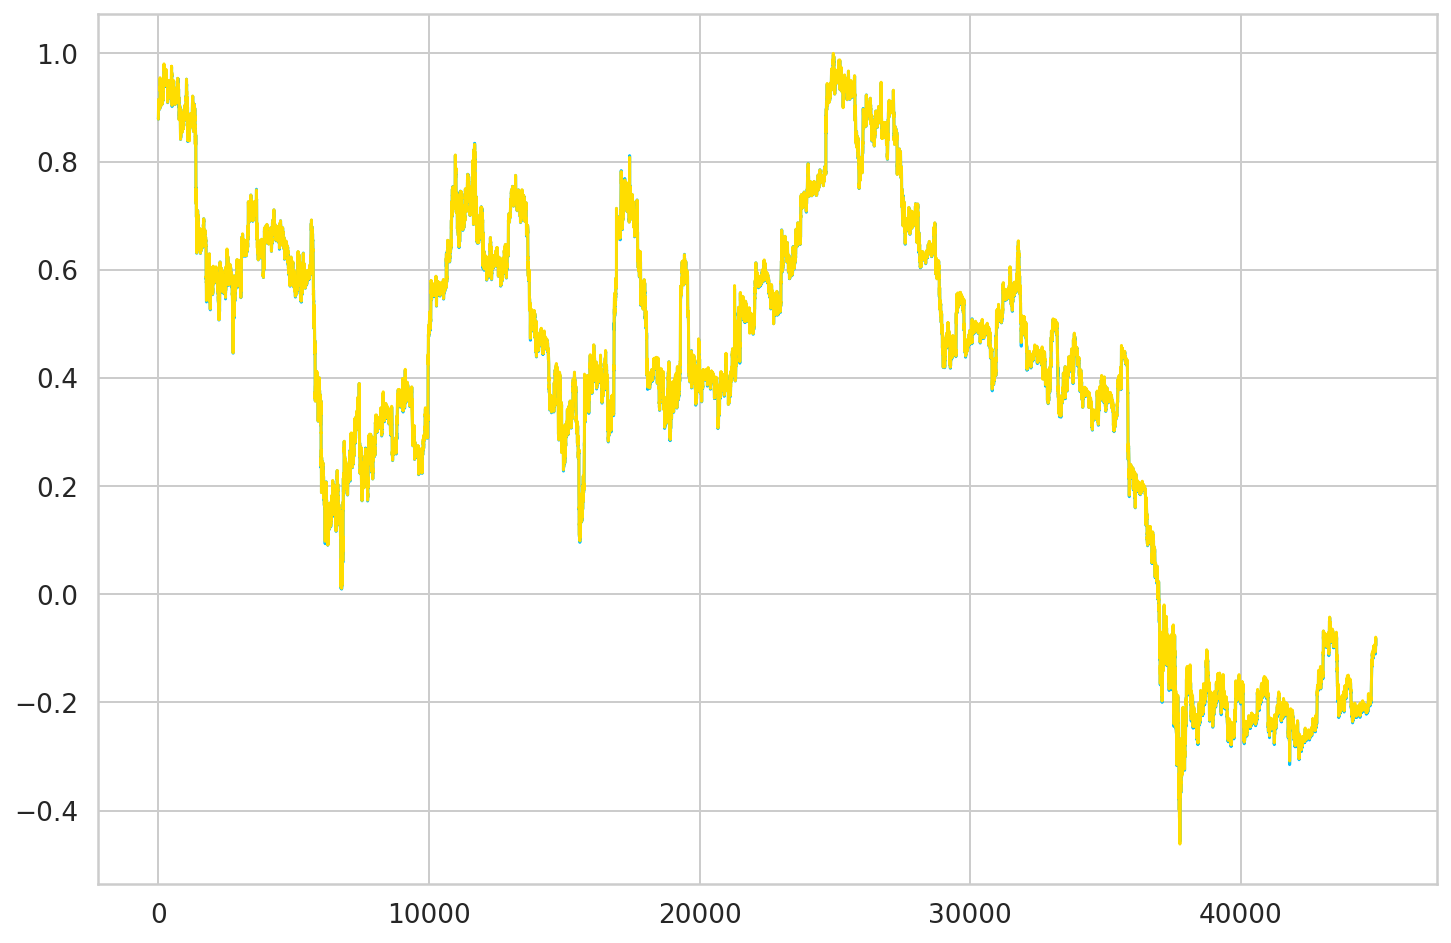

In [ ]:
plot_predictions1(model_mv_lstm, X_train2, y_train2)

(       Predictions   Actuals
 0         0.872644  0.871365
 1         0.871599  0.874237
 2         0.874121  0.878655
 3         0.879264  0.884685
 4         0.885089  0.889375
 ...            ...       ...
 44995    -0.321790 -0.321487
 44996    -0.321747 -0.323246
 44997    -0.323727 -0.325285
 44998    -0.325890 -0.330342
 44999    -0.330344 -0.329882
 
 [45000 rows x 2 columns], 2.3205976406327795e-05)

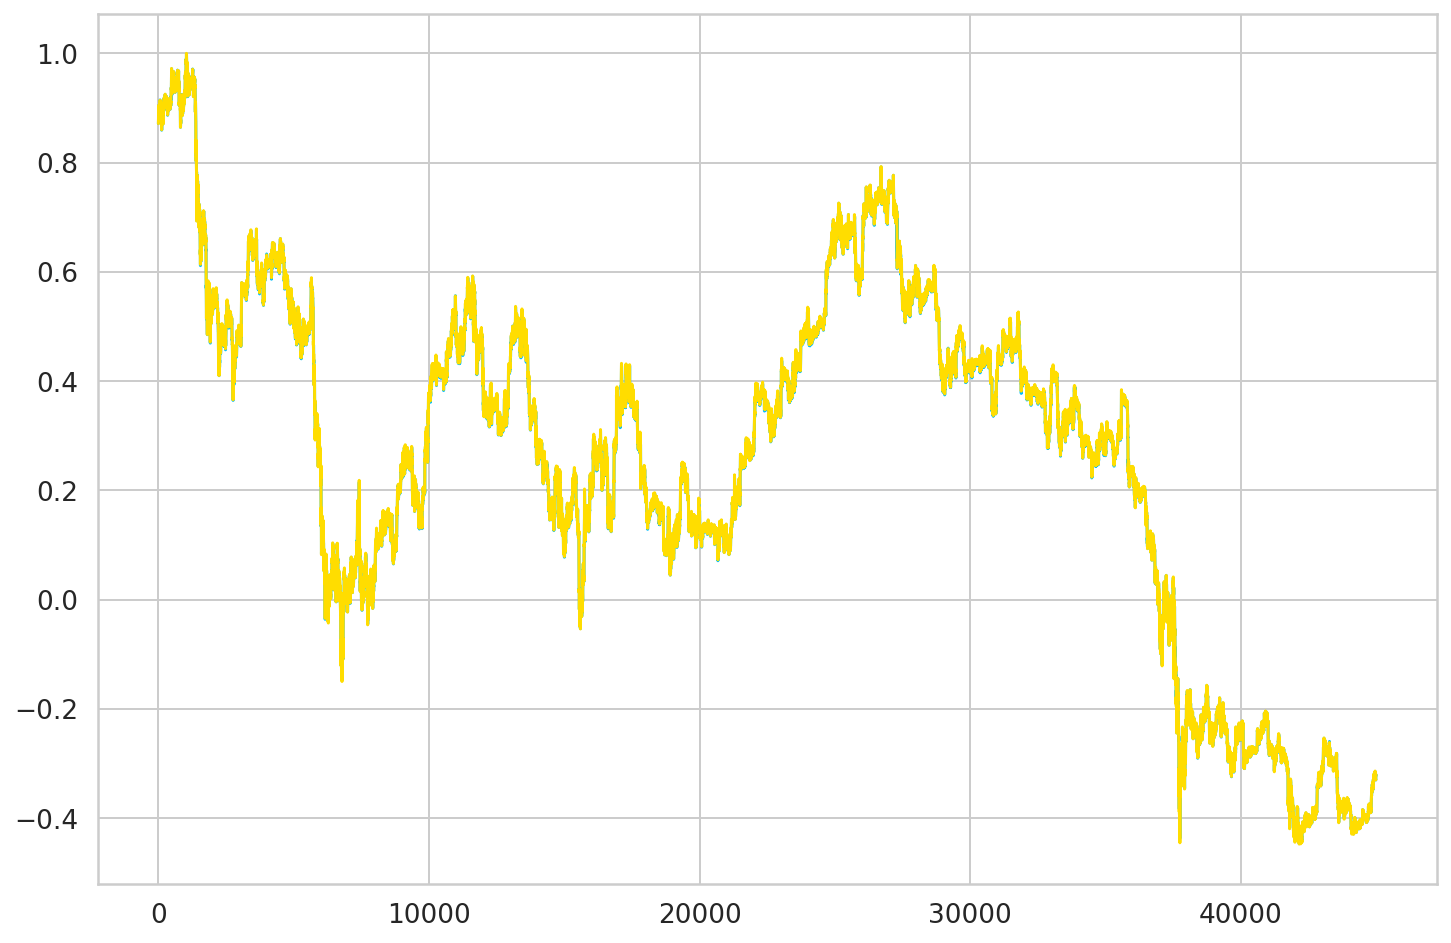

In [ ]:
plot_predictions1(model_mv_lstm_eth, X_eth_train2, y_eth_train2)

(       Predictions   Actuals
 0         0.884283  0.878375
 1         0.882067  0.885595
 2         0.889159  0.891870
 3         0.895204  0.894791
 4         0.898547  0.901556
 ...            ...       ...
 44995    -0.080867 -0.081226
 44996    -0.080707 -0.084272
 44997    -0.083915 -0.087185
 44998    -0.086385 -0.092333
 44999    -0.091665 -0.093579
 
 [45000 rows x 2 columns], 3.5194830796013747e-05)

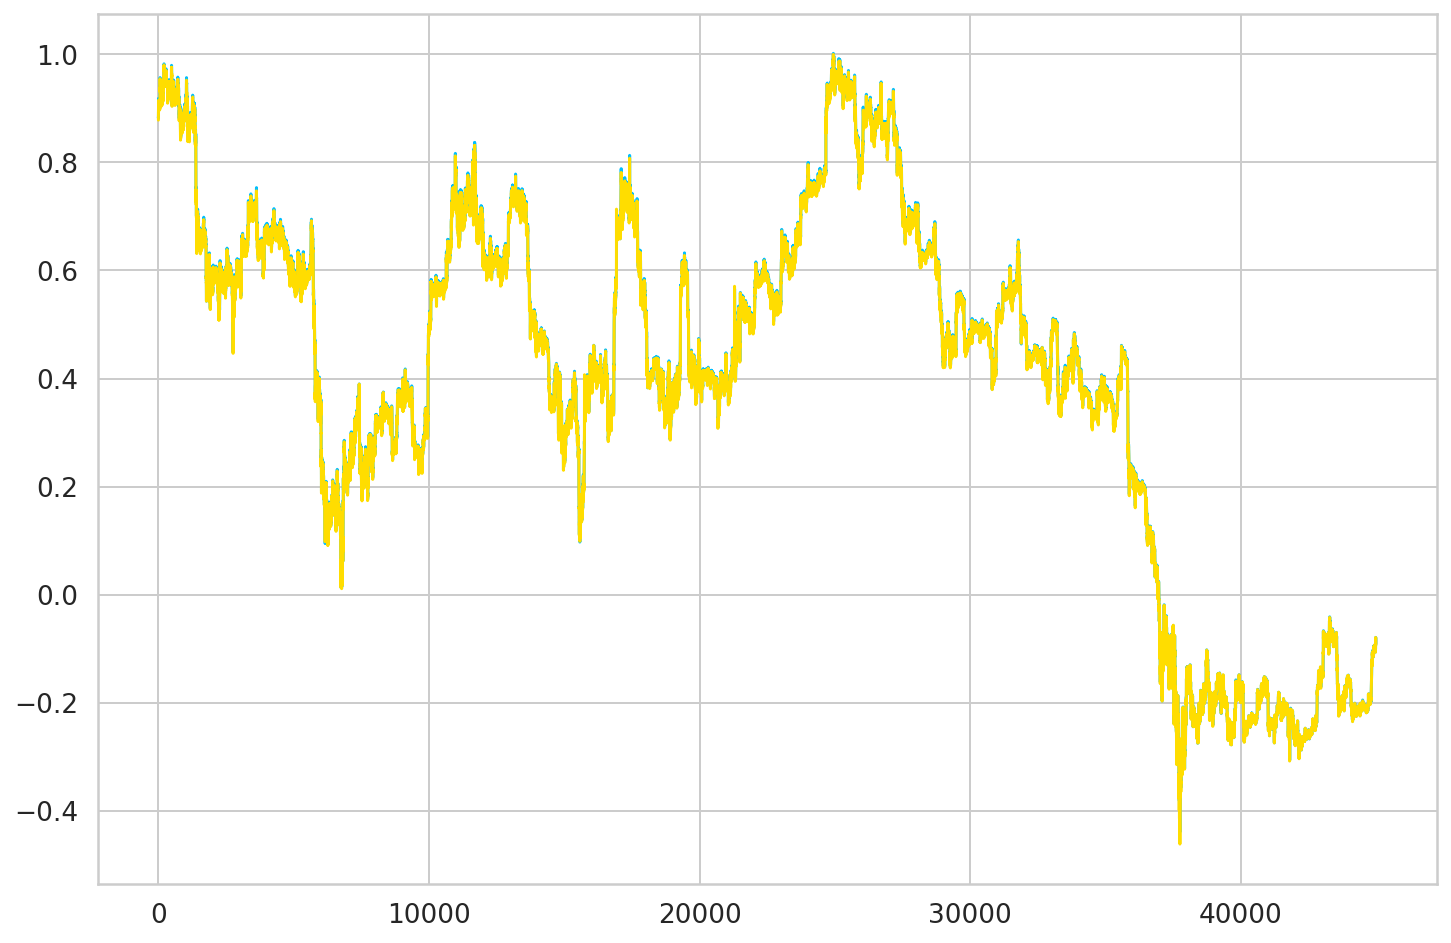

In [ ]:
plot_predictions1(model_mv_lstm_all_btc, X_btc_all_train2, y_btc_all_train2)

(       Predictions   Actuals
 0         0.881116  0.871365
 1         0.879062  0.874237
 2         0.883184  0.878655
 3         0.887717  0.884685
 4         0.892795  0.889375
 ...            ...       ...
 44995    -0.320771 -0.321487
 44996    -0.320565 -0.323246
 44997    -0.322828 -0.325285
 44998    -0.325059 -0.330342
 44999    -0.329541 -0.329882
 
 [45000 rows x 2 columns], 3.473157685439635e-05)

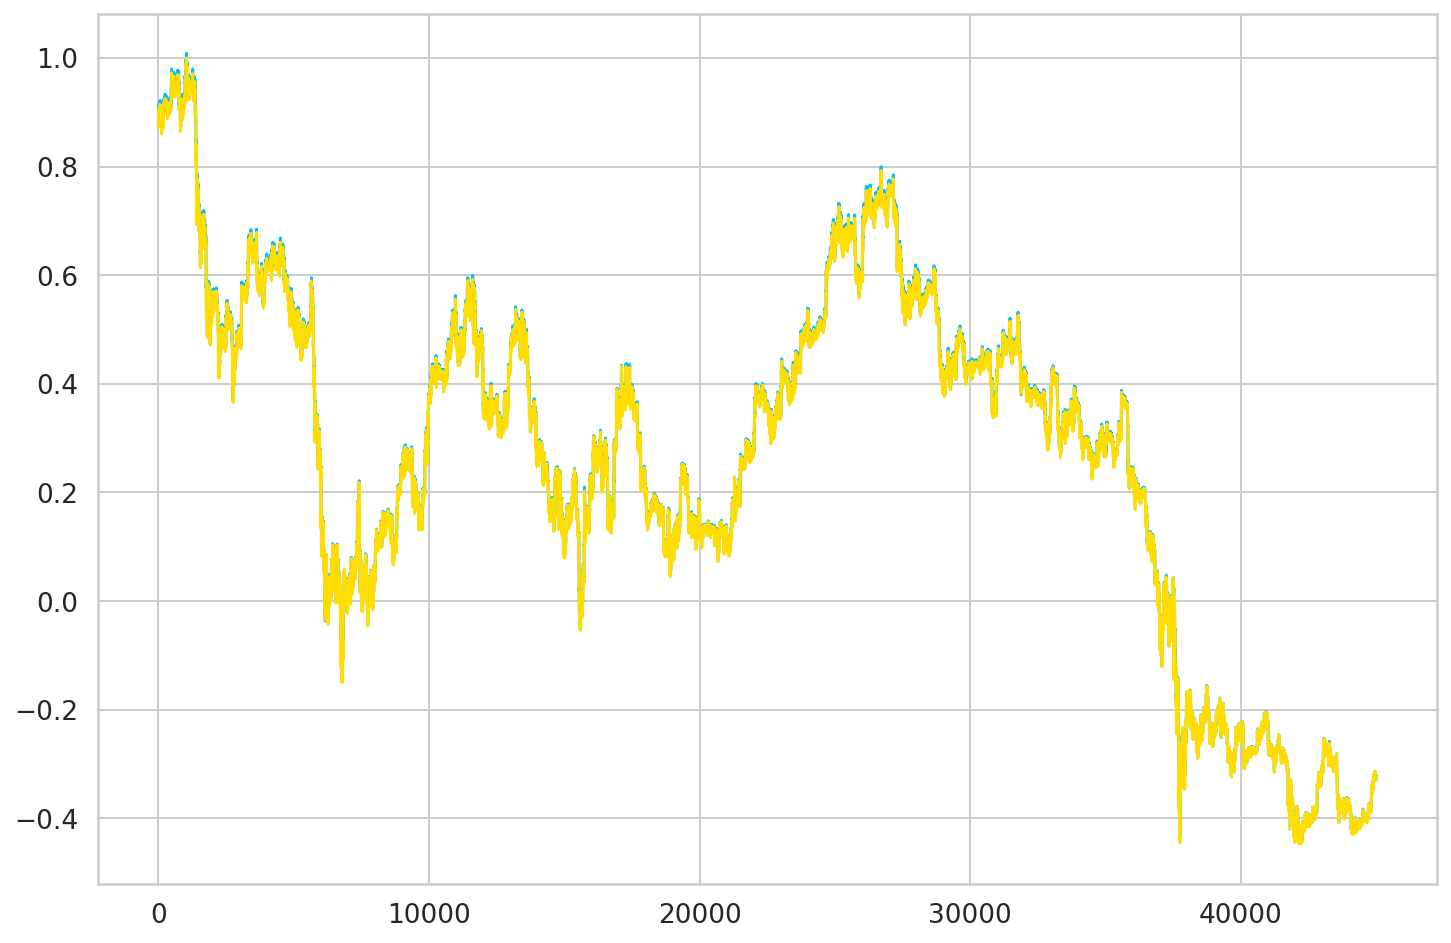

In [ ]:
plot_predictions1(model_mv_lstm_all_eth, X_eth_all_train2, y_eth_all_train2)

(       Predictions   Actuals
 0         0.876583  0.871365
 1         0.874670  0.874237
 2         0.878643  0.878655
 3         0.883120  0.884685
 4         0.888113  0.889375
 ...            ...       ...
 44995    -0.322068 -0.321487
 44996    -0.321724 -0.323246
 44997    -0.323684 -0.325285
 44998    -0.325684 -0.330342
 44999    -0.330225 -0.329882
 
 [45000 rows x 2 columns], 2.559024375570966e-05)

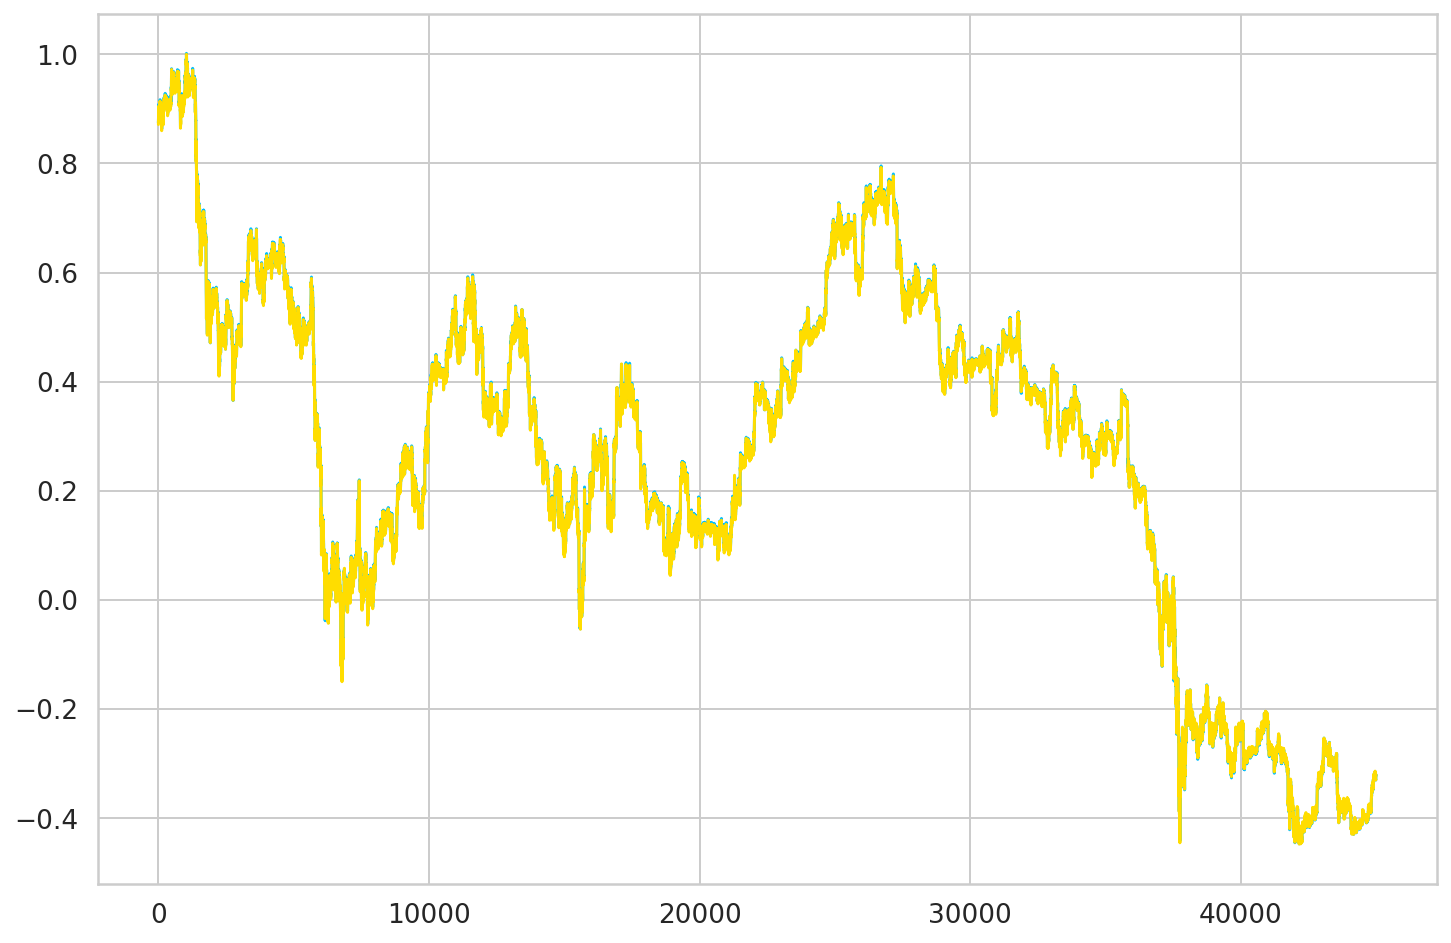

In [ ]:
plot_predictions1(model_mv_lstm_all, X_all_train2, y_all_train2)

### Validation

(      Predictions   Actuals
 0       -0.096263 -0.096840
 1       -0.099092 -0.101056
 2       -0.102965 -0.103126
 3       -0.105253 -0.116073
 4       -0.118022 -0.109961
 ...           ...       ...
 4995    -0.734514 -0.774502
 4996    -0.733246 -0.771328
 4997    -0.729953 -0.769867
 4998    -0.729223 -0.773450
 4999    -0.731584 -0.772455
 
 [5000 rows x 2 columns], 0.001517167375747447)

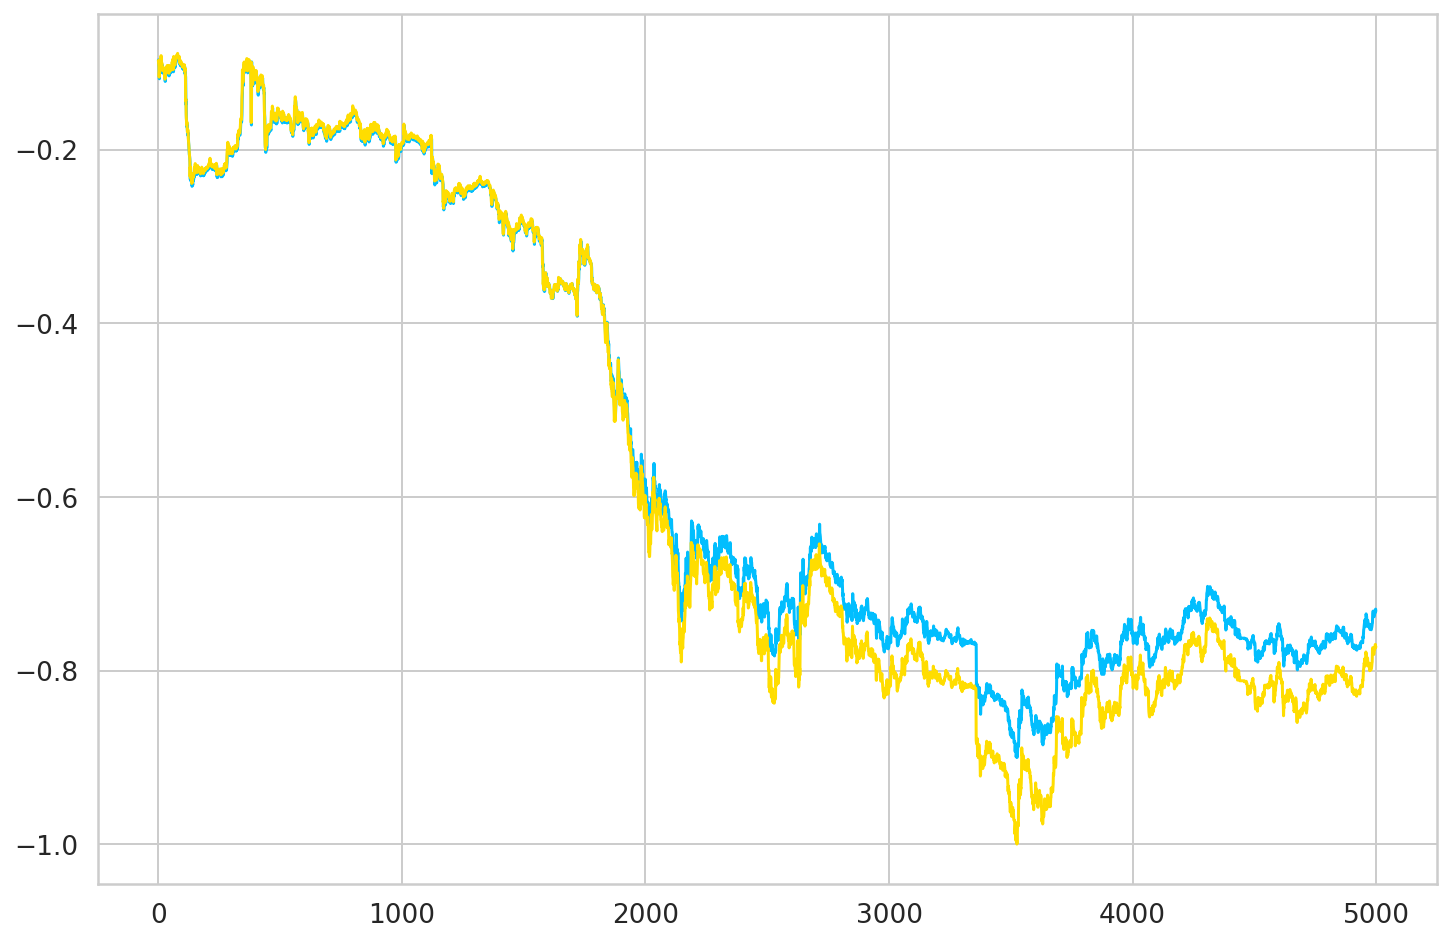

In [ ]:
plot_predictions1(model_mv_lstm, X_val2, y_val2)

(      Predictions   Actuals
 0       -0.330389 -0.332520
 1       -0.332962 -0.335359
 2       -0.335518 -0.338724
 3       -0.338807 -0.347059
 4       -0.346111 -0.344894
 ...           ...       ...
 4995    -0.779181 -0.829342
 4996    -0.779389 -0.827843
 4997    -0.778133 -0.827657
 4998    -0.778054 -0.827650
 4999    -0.778276 -0.827816
 
 [5000 rows x 2 columns], 0.002156753566240144)

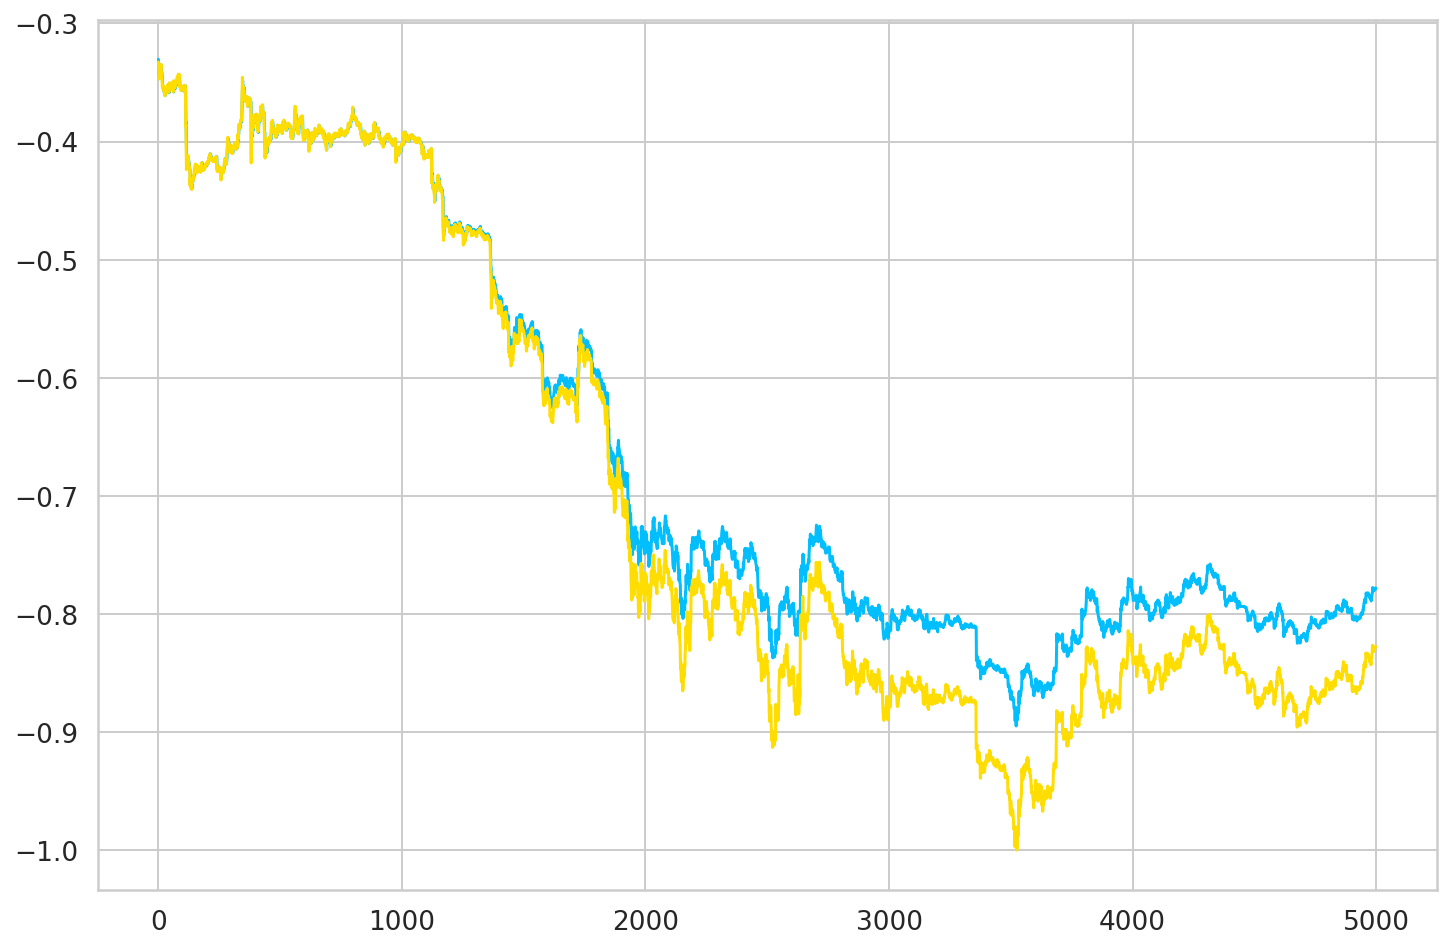

In [ ]:
plot_predictions1(model_mv_lstm_eth, X_eth_val2, y_eth_val2)

(      Predictions   Actuals
 0       -0.093009 -0.096840
 1       -0.095839 -0.101056
 2       -0.099563 -0.103126
 3       -0.102106 -0.116073
 4       -0.113748 -0.109961
 ...           ...       ...
 4995    -0.673793 -0.774502
 4996    -0.673342 -0.771328
 4997    -0.671083 -0.769867
 4998    -0.670142 -0.773450
 4999    -0.671327 -0.772455
 
 [5000 rows x 2 columns], 0.007940271751177775)

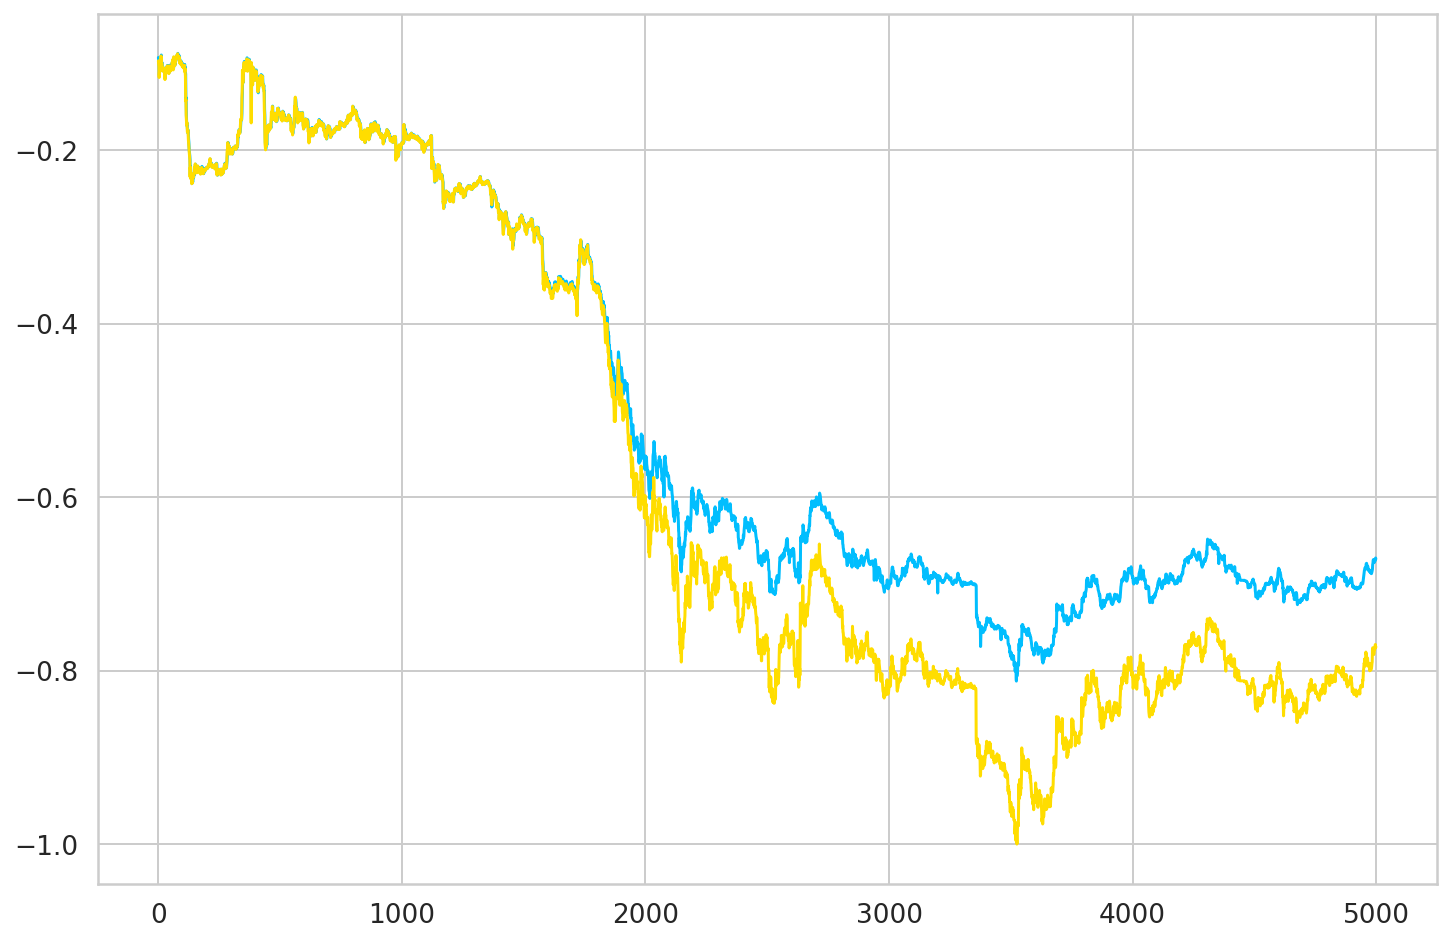

In [ ]:
plot_predictions1(model_mv_lstm_all_btc, X_btc_all_val2, y_btc_all_val2)

(      Predictions   Actuals
 0       -0.329817 -0.332520
 1       -0.332191 -0.335359
 2       -0.334804 -0.338724
 3       -0.338134 -0.347059
 4       -0.345775 -0.344894
 ...           ...       ...
 4995    -0.799203 -0.829342
 4996    -0.799355 -0.827843
 4997    -0.797689 -0.827657
 4998    -0.797573 -0.827650
 4999    -0.797721 -0.827816
 
 [5000 rows x 2 columns], 0.0007744195910276912)

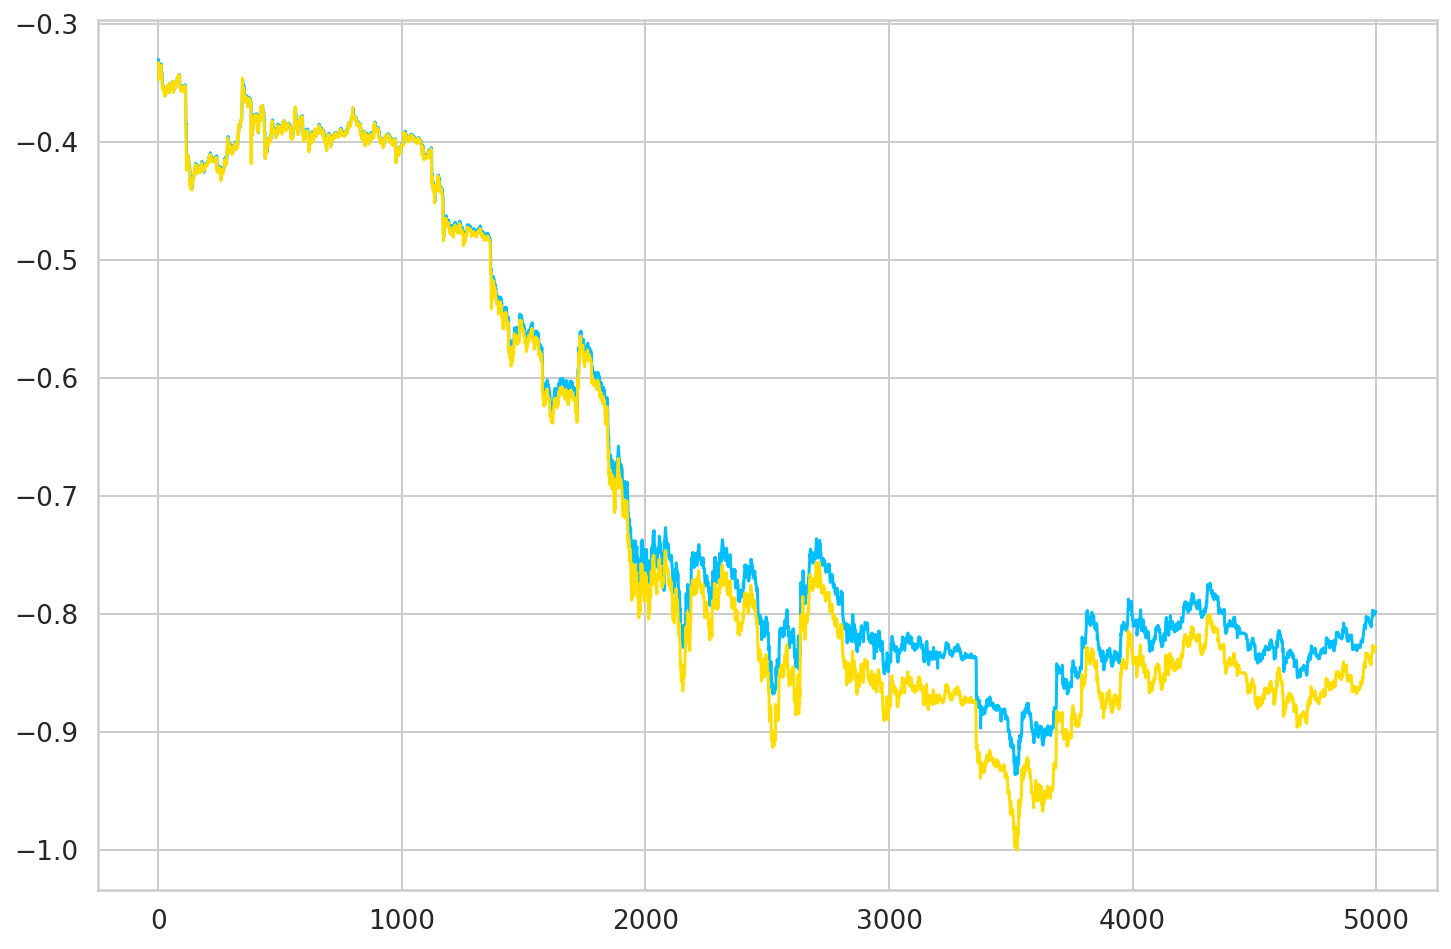

In [ ]:
plot_predictions1(model_mv_lstm_all_eth, X_eth_all_val2, y_eth_all_val2)

(      Predictions   Actuals
 0       -0.330597 -0.332520
 1       -0.332874 -0.335359
 2       -0.335620 -0.338724
 3       -0.338838 -0.347059
 4       -0.346487 -0.344894
 ...           ...       ...
 4995    -0.747466 -0.829342
 4996    -0.747424 -0.827843
 4997    -0.746622 -0.827657
 4998    -0.746641 -0.827650
 4999    -0.747321 -0.827816
 
 [5000 rows x 2 columns], 0.005294174621309067)

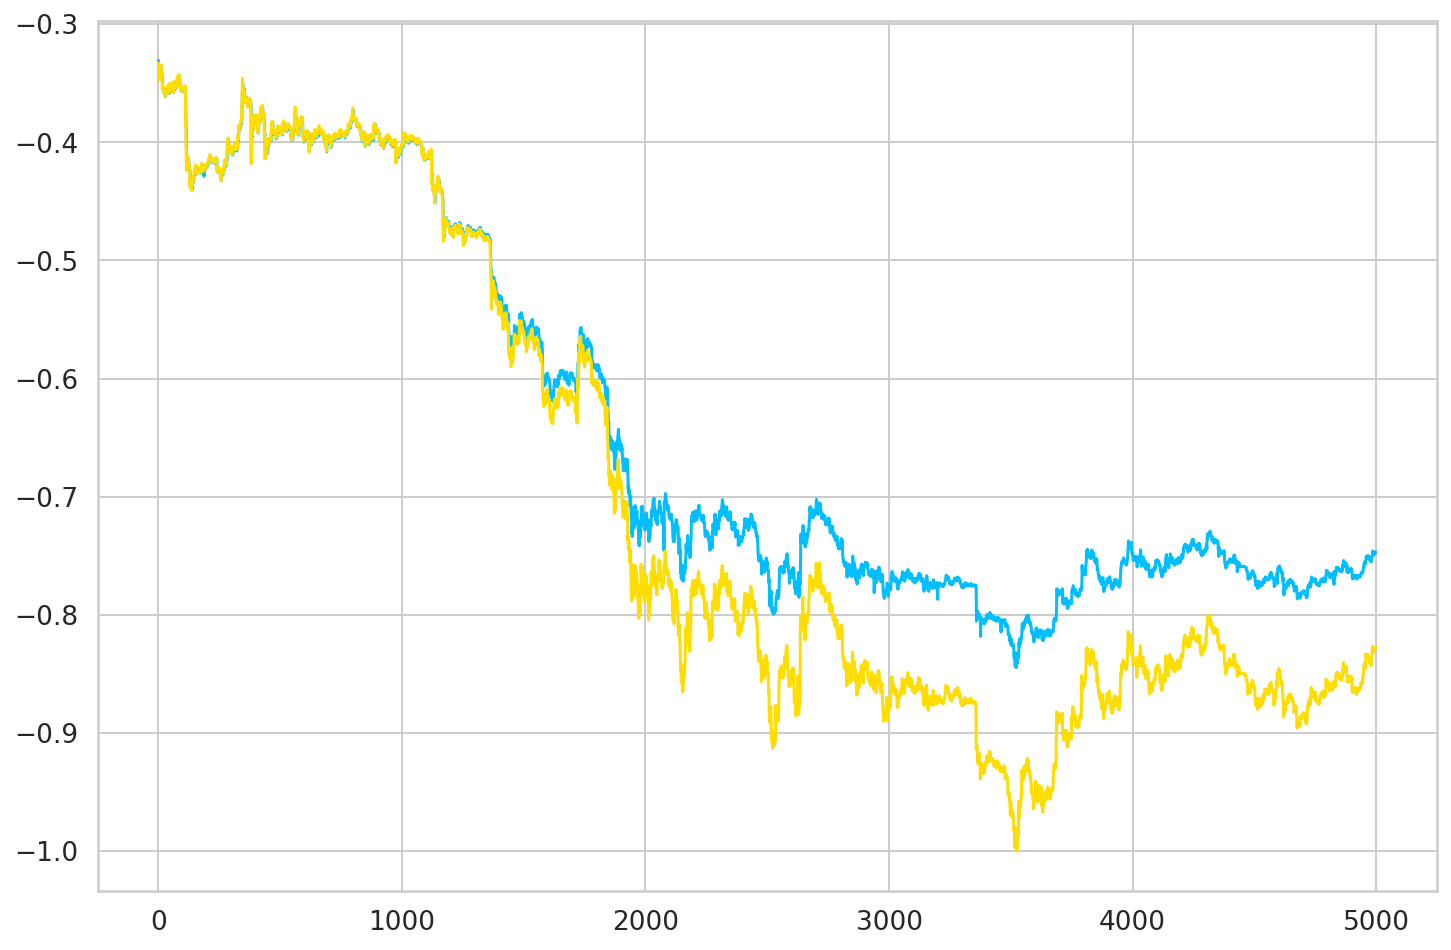

In [ ]:
plot_predictions1(model_mv_lstm_all, X_all_val2, y_all_val2)

### Test

(      Predictions   Actuals
 0       -0.730487 -0.774143
 1       -0.732550 -0.774205
 2       -0.732603 -0.772726
 3       -0.731922 -0.771556
 4       -0.730926 -0.771738
 ...           ...       ...
 5270    -0.796180 -0.856011
 5271    -0.796699 -0.855788
 5272    -0.796905 -0.860783
 5273    -0.801255 -0.861937
 5274    -0.801152 -0.868828
 
 [5275 rows x 2 columns], 0.0027503606481474353)

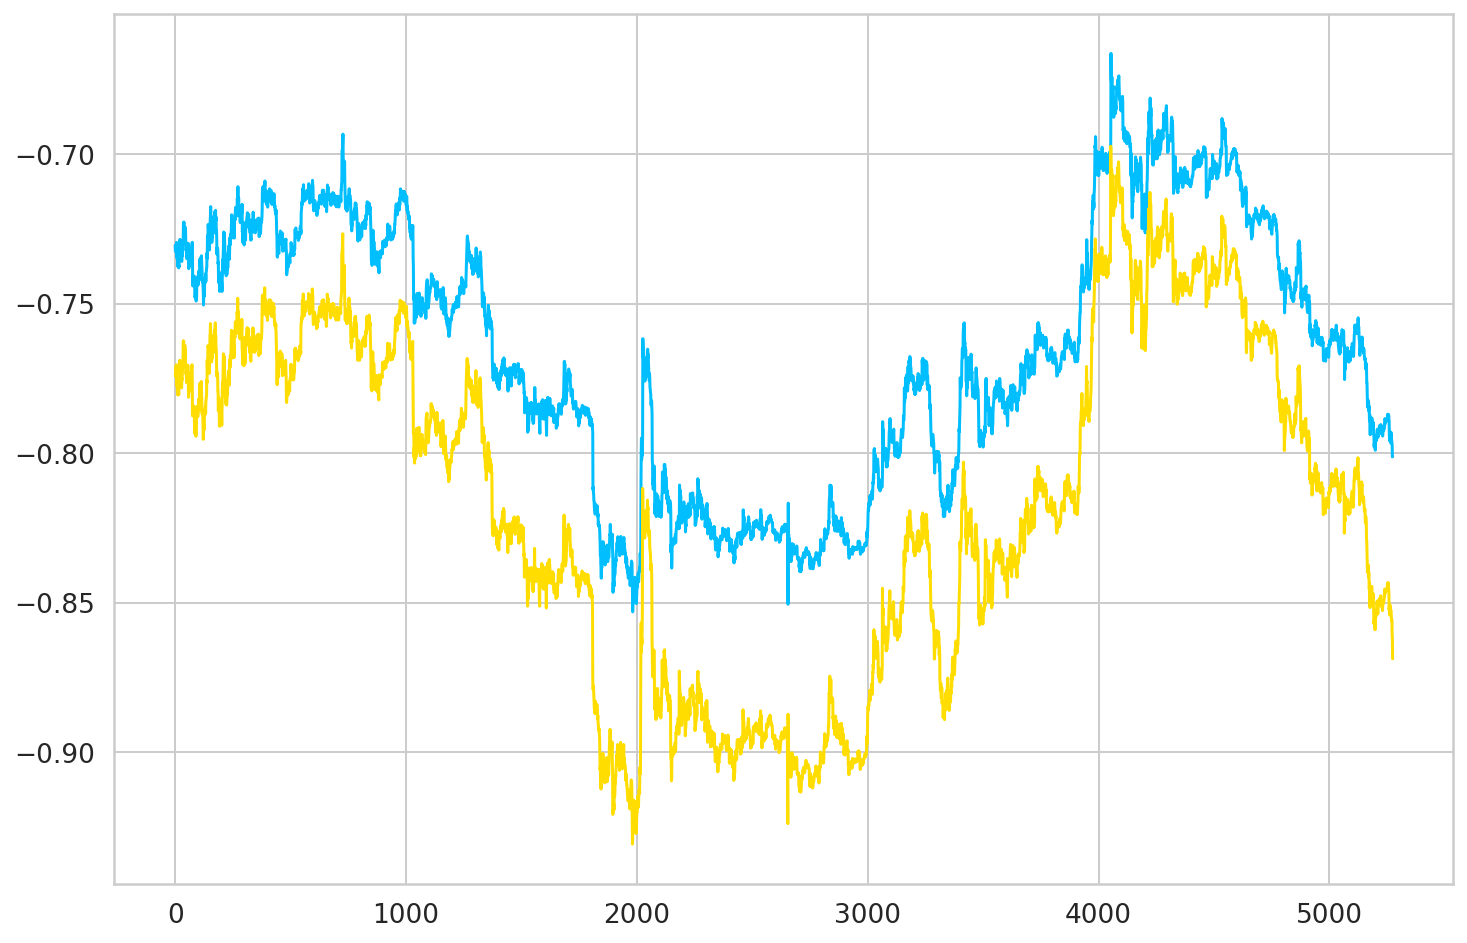

In [ ]:
plot_predictions1(model_mv_lstm, X_test2, y_test2)

(      Predictions   Actuals
 0       -0.778196 -0.829249
 1       -0.779035 -0.829362
 2       -0.778952 -0.828429
 3       -0.778731 -0.827510
 4       -0.778203 -0.828190
 ...           ...       ...
 5270    -0.810247 -0.873804
 5271    -0.812167 -0.873091
 5272    -0.810621 -0.876829
 5273    -0.812639 -0.877715
 5274    -0.812625 -0.881480
 
 [5275 rows x 2 columns], 0.0026399028906924625)

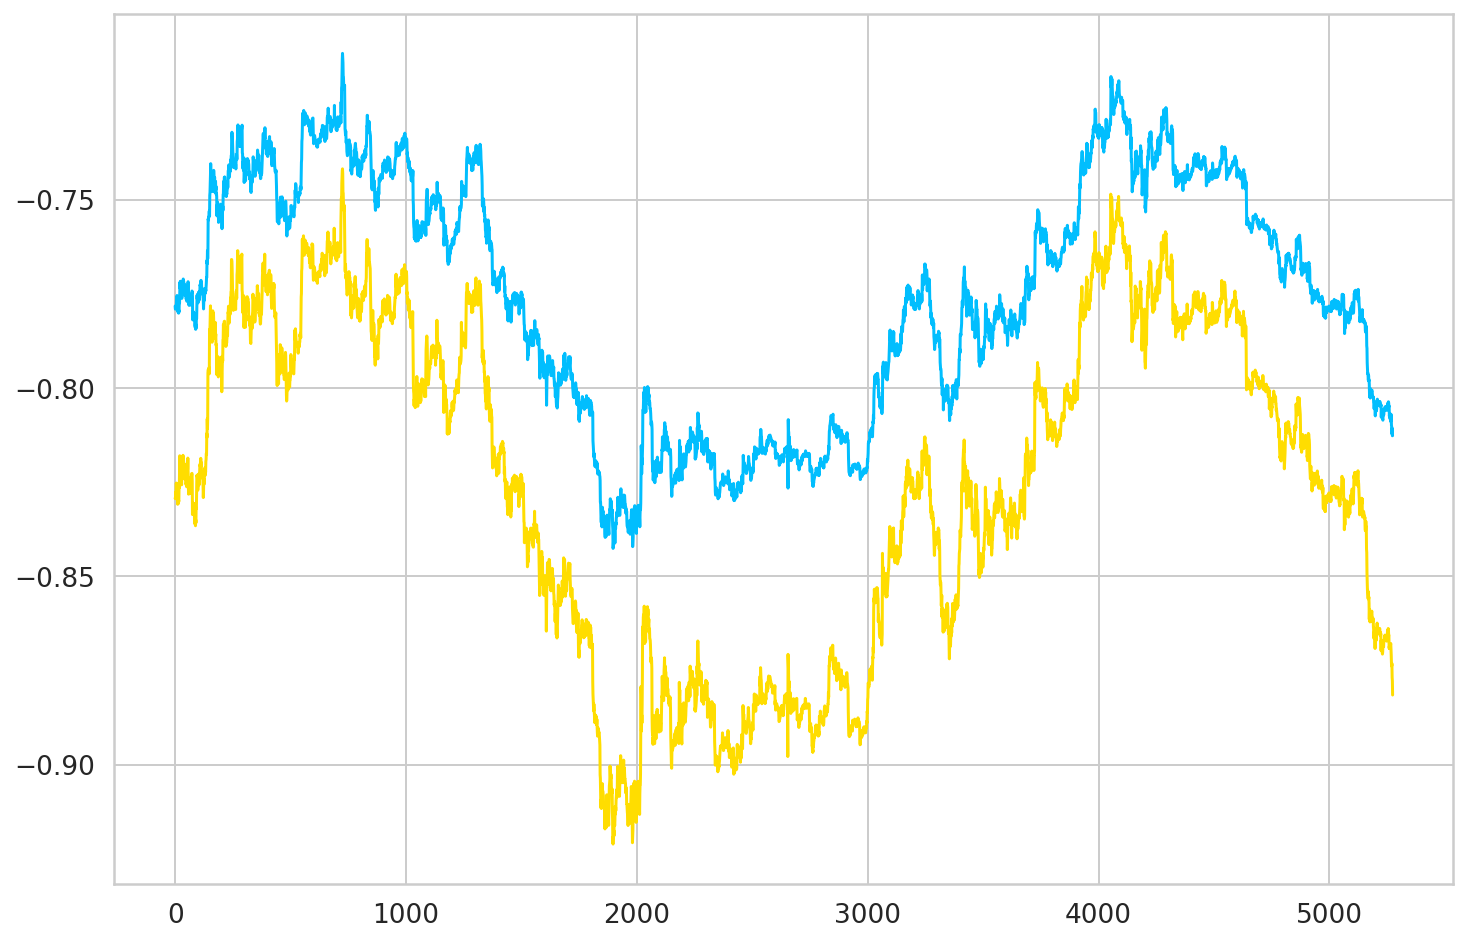

In [ ]:
plot_predictions1(model_mv_lstm_eth, X_eth_test2, y_eth_test2)

(      Predictions   Actuals
 0       -0.670541 -0.774143
 1       -0.671229 -0.774205
 2       -0.671957 -0.772726
 3       -0.673410 -0.771556
 4       -0.671935 -0.771738
 ...           ...       ...
 5270    -0.721665 -0.856011
 5271    -0.723732 -0.855788
 5272    -0.723307 -0.860783
 5273    -0.725026 -0.861937
 5274    -0.726583 -0.868828
 
 [5275 rows x 2 columns], 0.01439946823234129)

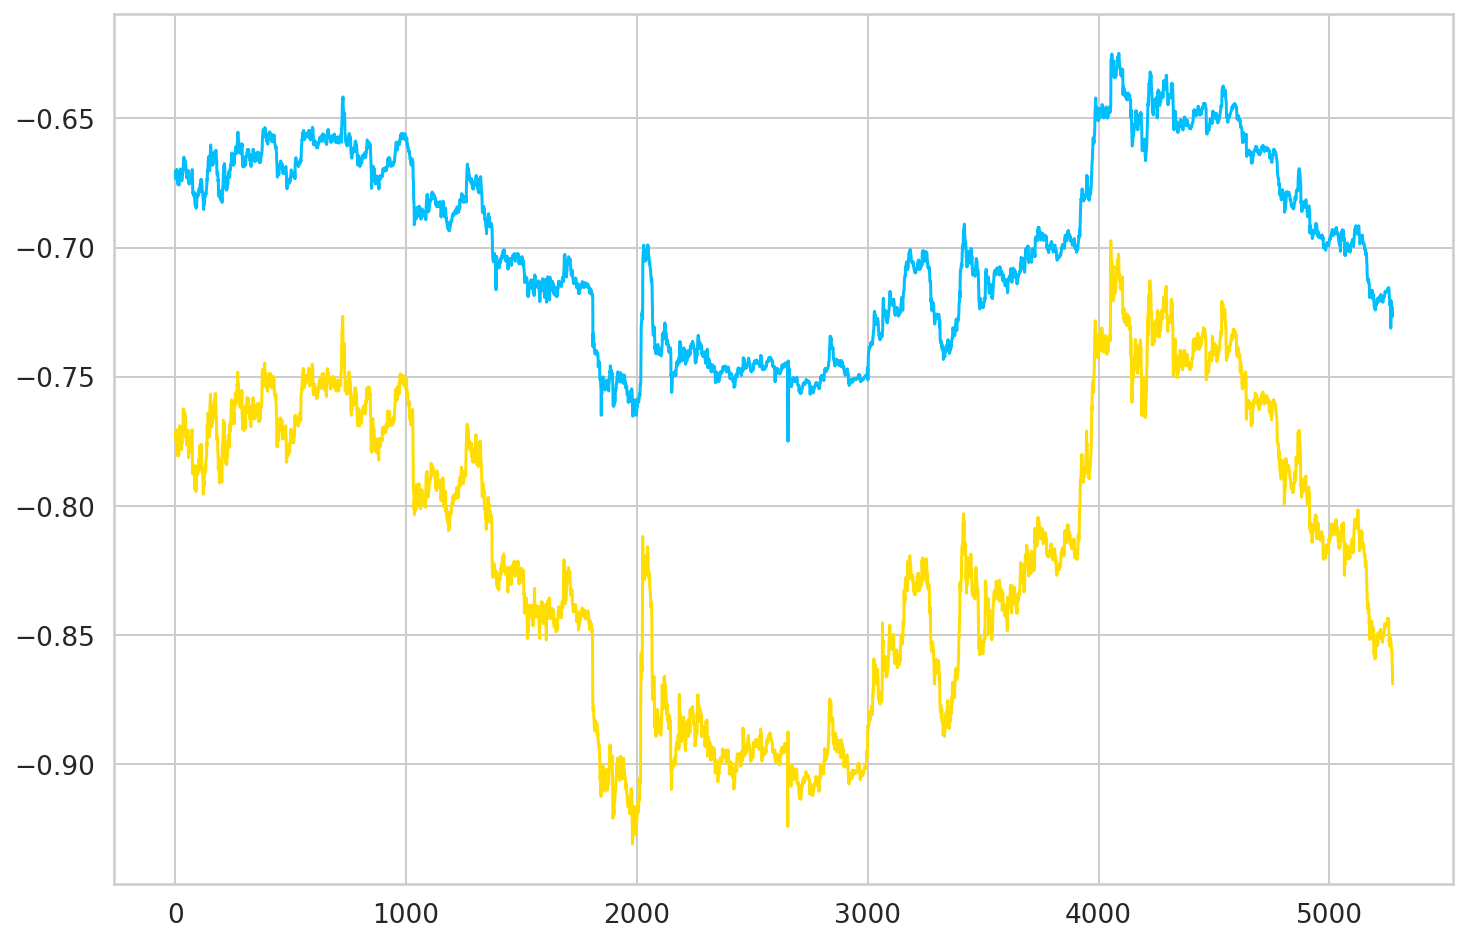

In [ ]:
plot_predictions1(model_mv_lstm_all_btc, X_btc_all_test2, y_btc_all_test2)

(      Predictions   Actuals
 0       -0.797230 -0.829249
 1       -0.798526 -0.829362
 2       -0.798921 -0.828429
 3       -0.799699 -0.827510
 4       -0.798660 -0.828190
 ...           ...       ...
 5270    -0.834709 -0.873804
 5271    -0.836736 -0.873091
 5272    -0.834821 -0.876829
 5273    -0.838057 -0.877715
 5274    -0.839530 -0.881480
 
 [5275 rows x 2 columns], 0.000957022965284187)

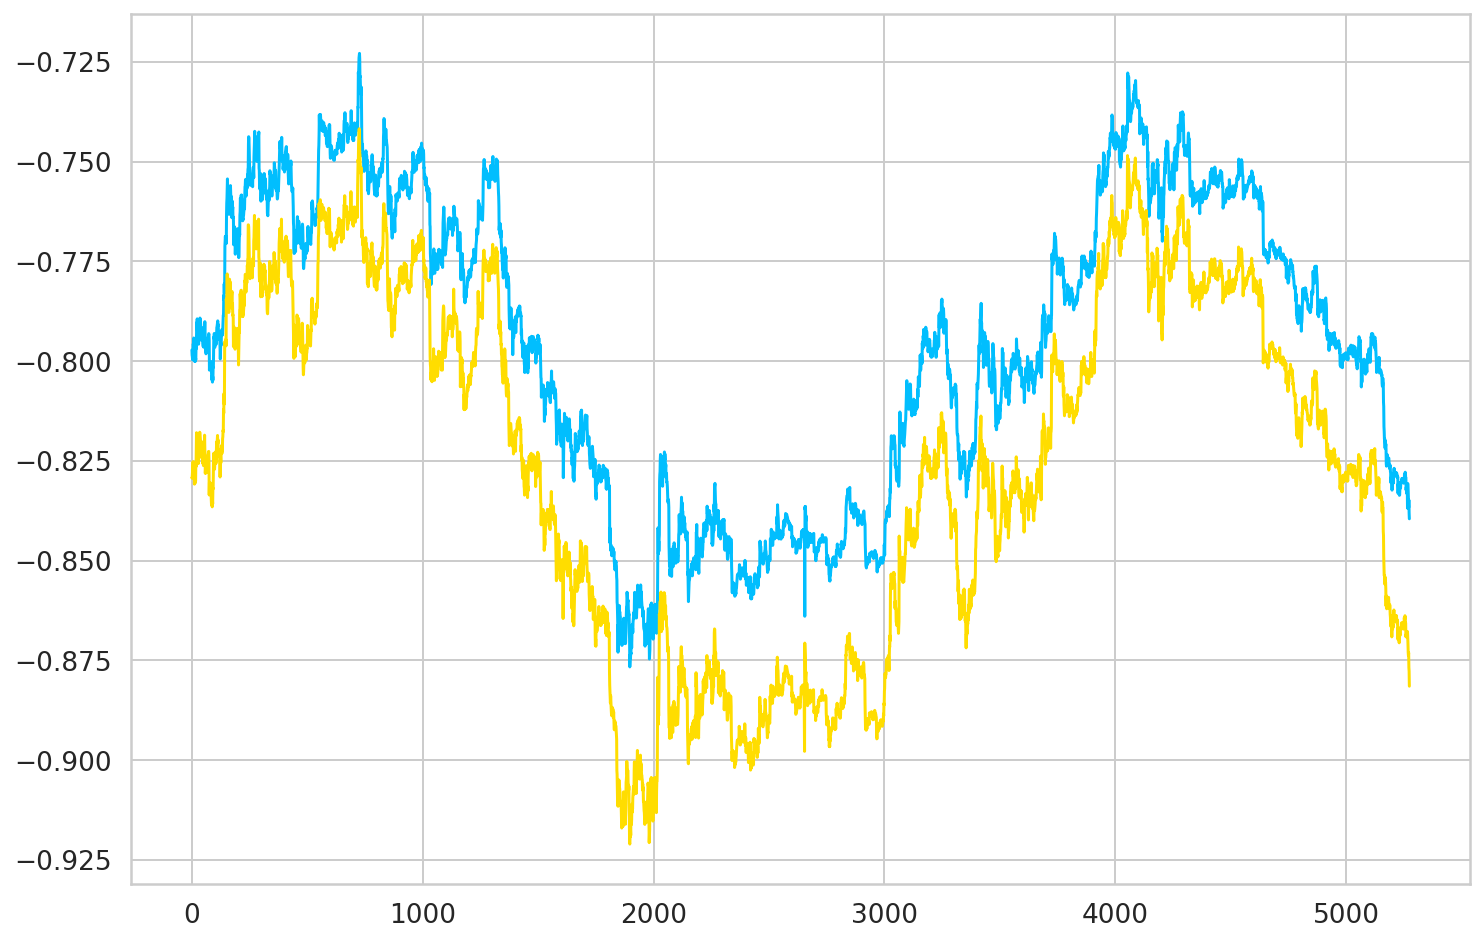

In [ ]:
plot_predictions1(model_mv_lstm_all_eth, X_eth_all_test2, y_eth_all_test2)

(      Predictions   Actuals
 0       -0.746448 -0.829249
 1       -0.747357 -0.829362
 2       -0.747868 -0.828429
 3       -0.748881 -0.827510
 4       -0.747634 -0.828190
 ...           ...       ...
 5270    -0.772004 -0.873804
 5271    -0.774594 -0.873091
 5272    -0.772346 -0.876829
 5273    -0.773979 -0.877715
 5274    -0.775113 -0.881480
 
 [5275 rows x 2 columns], 0.00734974043011558)

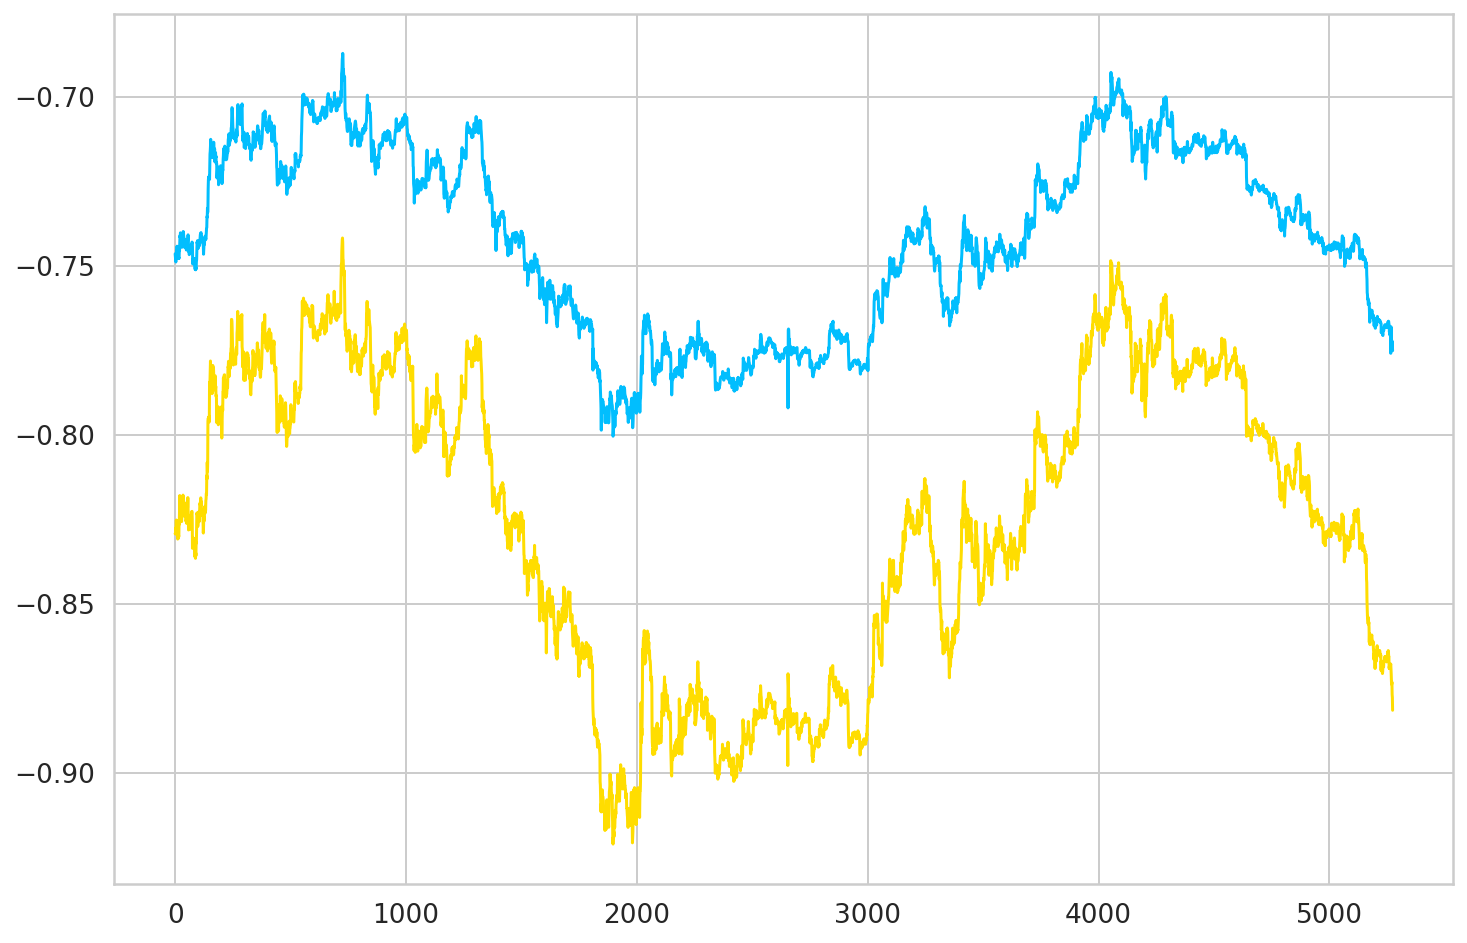

In [ ]:
plot_predictions1(model_mv_lstm_all, X_all_test2, y_all_test2)

## MV GRU

## Construct Multi Variate GRU Models

In [ ]:
model_mv_GRU = Sequential()
model_mv_GRU.add(InputLayer((6, 6)))
model_mv_GRU.add(GRU(64))
model_mv_GRU.add(Dense(8, 'relu'))
model_mv_GRU.add(Dense(1, 'linear'))
model_mv_GRU.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 64)                13824     
                                                                 
 dense_18 (Dense)            (None, 8)                 520       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 14,353
Trainable params: 14,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_mv_GRU_eth = Sequential()
model_mv_GRU_eth.add(InputLayer((6, 6)))
model_mv_GRU_eth.add(GRU(64))
model_mv_GRU_eth.add(Dense(8, 'relu'))
model_mv_GRU_eth.add(Dense(1, 'linear'))
model_mv_GRU_eth.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 64)                13824     
                                                                 
 dense_20 (Dense)            (None, 8)                 520       
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 14,353
Trainable params: 14,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_mv_GRU_all_btc = Sequential()
model_mv_GRU_all_btc.add(InputLayer((6, 8)))
model_mv_GRU_all_btc.add(GRU(64))
model_mv_GRU_all_btc.add(Dense(8, 'relu'))
model_mv_GRU_all_btc.add(Dense(1, 'linear'))
model_mv_GRU_all_btc.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 64)                14208     
                                                                 
 dense_22 (Dense)            (None, 8)                 520       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 14,737
Trainable params: 14,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_mv_GRU_all_eth = Sequential()
model_mv_GRU_all_eth.add(InputLayer((6, 8)))
model_mv_GRU_all_eth.add(GRU(64))
model_mv_GRU_all_eth.add(Dense(8, 'relu'))
model_mv_GRU_all_eth.add(Dense(1, 'linear'))
model_mv_GRU_all_eth.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 64)                14208     
                                                                 
 dense_24 (Dense)            (None, 8)                 520       
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 14,737
Trainable params: 14,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_mv_GRU_all = Sequential()
model_mv_GRU_all.add(InputLayer((6, 12)))
model_mv_GRU_all.add(GRU(64))
model_mv_GRU_all.add(Dense(8, 'relu'))
model_mv_GRU_all.add(Dense(1, 'linear'))
model_mv_GRU_all.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 64)                14976     
                                                                 
 dense_26 (Dense)            (None, 8)                 520       
                                                                 
 dense_27 (Dense)            (None, 1)                 9         
                                                                 
Total params: 15,505
Trainable params: 15,505
Non-trainable params: 0
_________________________________________________________________


## Save Checkpoint & Compile Multi Variate GRU Models

In [ ]:
ES_cp4= EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
cp4 = ModelCheckpoint('model_mv_GRU/', save_best_only=True)
model_mv_GRU.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
ES_cp4_eth= EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
cp4_eth = ModelCheckpoint('model_mv_GRU_eth/', save_best_only=True)
model_mv_GRU_eth.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
ES_cp4_all_btc= EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
cp4_all_btc = ModelCheckpoint('model_mv_GRU_all_btc/', save_best_only=True)
model_mv_GRU_all_btc.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
ES_cp4_all_eth= EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
cp4_all_eth = ModelCheckpoint('model_mv_GRU_all_eth/', save_best_only=True)
model_mv_GRU_all_eth.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
ES_cp4_all= EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
cp4_all = ModelCheckpoint('model_mv_GRU_all/', save_best_only=True)
model_mv_GRU_all.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

## Train Multi Variate GRU Models

In [ ]:
model_mv_GRU.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=100, callbacks=[ES_cp4,cp4])

Epoch 1/100
1397/1407 [============================>.] - ETA: 0s - loss: 4.1831e-04 - root_mean_squared_error: 0.0205

INFO:tensorflow:Assets written to: model_mv_GRU/assets


INFO:tensorflow:Assets written to: model_mv_GRU/assets


1407/1407 [==============================] - 10s 6ms/step - loss: 4.1576e-04 - root_mean_squared_error: 0.0204 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0365
Epoch 2/100
1407/1407 [==============================] - ETA: 0s - loss: 3.6611e-05 - root_mean_squared_error: 0.0061

INFO:tensorflow:Assets written to: model_mv_GRU/assets


INFO:tensorflow:Assets written to: model_mv_GRU/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.6611e-05 - root_mean_squared_error: 0.0061 - val_loss: 3.5950e-04 - val_root_mean_squared_error: 0.0190
Epoch 3/100
1407/1407 [==============================] - 4s 3ms/step - loss: 4.0641e-05 - root_mean_squared_error: 0.0064 - val_loss: 4.1429e-04 - val_root_mean_squared_error: 0.0204
Epoch 4/100
1407/1407 [==============================] - 5s 3ms/step - loss: 4.2187e-05 - root_mean_squared_error: 0.0065 - val_loss: 6.6147e-04 - val_root_mean_squared_error: 0.0257
Epoch 5/100
1403/1407 [============================>.] - ETA: 0s - loss: 3.8621e-05 - root_mean_squared_error: 0.0062

INFO:tensorflow:Assets written to: model_mv_GRU/assets


INFO:tensorflow:Assets written to: model_mv_GRU/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.8673e-05 - root_mean_squared_error: 0.0062 - val_loss: 1.2611e-04 - val_root_mean_squared_error: 0.0112
Epoch 6/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.8356e-05 - root_mean_squared_error: 0.0062 - val_loss: 5.8469e-04 - val_root_mean_squared_error: 0.0242
Epoch 7/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.8426e-05 - root_mean_squared_error: 0.0062 - val_loss: 1.3761e-04 - val_root_mean_squared_error: 0.0117
Epoch 8/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.6929e-05 - root_mean_squared_error: 0.0061 - val_loss: 4.8888e-04 - val_root_mean_squared_error: 0.0221
Epoch 9/100
1396/1407 [============================>.] - ETA: 0s - loss: 3.6600e-05 - root_mean_squared_error: 0.0060

INFO:tensorflow:Assets written to: model_mv_GRU/assets


INFO:tensorflow:Assets written to: model_mv_GRU/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.6528e-05 - root_mean_squared_error: 0.0060 - val_loss: 1.0413e-04 - val_root_mean_squared_error: 0.0102
Epoch 10/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.5873e-05 - root_mean_squared_error: 0.0060 - val_loss: 3.0157e-04 - val_root_mean_squared_error: 0.0174
Epoch 11/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.5219e-05 - root_mean_squared_error: 0.0059 - val_loss: 8.0843e-04 - val_root_mean_squared_error: 0.0284
Epoch 12/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.4666e-05 - root_mean_squared_error: 0.0059 - val_loss: 7.0159e-04 - val_root_mean_squared_error: 0.0265
Epoch 13/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.5042e-05 - root_mean_squared_error: 0.0059 - val_loss: 3.5022e-04 - val_root_mean_squared_error: 0.0187
Epoch 14/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.3609e-05 - ro

In [ ]:
model_mv_GRU_eth.fit(X_eth_train2, y_eth_train2, validation_data=(X_eth_val2, y_eth_val2), epochs=100, callbacks=[ES_cp4_eth,cp4_eth])

Epoch 1/100
1400/1407 [============================>.] - ETA: 0s - loss: 2.2258e-04 - root_mean_squared_error: 0.0149

INFO:tensorflow:Assets written to: model_mv_GRU_eth/assets


INFO:tensorflow:Assets written to: model_mv_GRU_eth/assets


1407/1407 [==============================] - 10s 6ms/step - loss: 2.2174e-04 - root_mean_squared_error: 0.0149 - val_loss: 0.0460 - val_root_mean_squared_error: 0.2145
Epoch 2/100
1405/1407 [============================>.] - ETA: 0s - loss: 4.0162e-05 - root_mean_squared_error: 0.0063

INFO:tensorflow:Assets written to: model_mv_GRU_eth/assets


INFO:tensorflow:Assets written to: model_mv_GRU_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 4.0141e-05 - root_mean_squared_error: 0.0063 - val_loss: 0.0448 - val_root_mean_squared_error: 0.2117
Epoch 3/100
1402/1407 [============================>.] - ETA: 0s - loss: 3.6735e-05 - root_mean_squared_error: 0.0061

INFO:tensorflow:Assets written to: model_mv_GRU_eth/assets


INFO:tensorflow:Assets written to: model_mv_GRU_eth/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 3.6789e-05 - root_mean_squared_error: 0.0061 - val_loss: 0.0420 - val_root_mean_squared_error: 0.2050
Epoch 4/100
1396/1407 [============================>.] - ETA: 0s - loss: 3.3196e-05 - root_mean_squared_error: 0.0058

INFO:tensorflow:Assets written to: model_mv_GRU_eth/assets


INFO:tensorflow:Assets written to: model_mv_GRU_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.3171e-05 - root_mean_squared_error: 0.0058 - val_loss: 0.0370 - val_root_mean_squared_error: 0.1922
Epoch 5/100
1400/1407 [============================>.] - ETA: 0s - loss: 3.2621e-05 - root_mean_squared_error: 0.0057

INFO:tensorflow:Assets written to: model_mv_GRU_eth/assets


INFO:tensorflow:Assets written to: model_mv_GRU_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.2658e-05 - root_mean_squared_error: 0.0057 - val_loss: 0.0267 - val_root_mean_squared_error: 0.1634
Epoch 6/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.3821e-05 - root_mean_squared_error: 0.0058 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1726
Epoch 7/100
1396/1407 [============================>.] - ETA: 0s - loss: 3.1489e-05 - root_mean_squared_error: 0.0056

INFO:tensorflow:Assets written to: model_mv_GRU_eth/assets


INFO:tensorflow:Assets written to: model_mv_GRU_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.1491e-05 - root_mean_squared_error: 0.0056 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0845
Epoch 8/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.0570e-05 - root_mean_squared_error: 0.0055 - val_loss: 0.0231 - val_root_mean_squared_error: 0.1519
Epoch 9/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.1177e-05 - root_mean_squared_error: 0.0056 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0882
Epoch 10/100
1407/1407 [==============================] - 5s 3ms/step - loss: 2.8167e-05 - root_mean_squared_error: 0.0053 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0853
Epoch 11/100
1398/1407 [============================>.] - ETA: 0s - loss: 2.8849e-05 - root_mean_squared_error: 0.0054

INFO:tensorflow:Assets written to: model_mv_GRU_eth/assets


INFO:tensorflow:Assets written to: model_mv_GRU_eth/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 2.8796e-05 - root_mean_squared_error: 0.0054 - val_loss: 3.7948e-05 - val_root_mean_squared_error: 0.0062
Epoch 12/100
1407/1407 [==============================] - 5s 3ms/step - loss: 2.8152e-05 - root_mean_squared_error: 0.0053 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0323
Epoch 13/100
1407/1407 [==============================] - 4s 3ms/step - loss: 2.8170e-05 - root_mean_squared_error: 0.0053 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0491
Epoch 14/100
1407/1407 [==============================] - 4s 3ms/step - loss: 2.8145e-05 - root_mean_squared_error: 0.0053 - val_loss: 5.3418e-04 - val_root_mean_squared_error: 0.0231
Epoch 15/100
1407/1407 [==============================] - 4s 3ms/step - loss: 2.9526e-05 - root_mean_squared_error: 0.0054 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0570
Epoch 16/100
1407/1407 [==============================] - 4s 3ms/step - loss: 2.6787e-05 - root_mean_squa

INFO:tensorflow:Assets written to: model_mv_GRU_eth/assets


INFO:tensorflow:Assets written to: model_mv_GRU_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 2.8069e-05 - root_mean_squared_error: 0.0053 - val_loss: 3.1151e-05 - val_root_mean_squared_error: 0.0056
Epoch 18/100
1407/1407 [==============================] - 4s 3ms/step - loss: 2.7227e-05 - root_mean_squared_error: 0.0052 - val_loss: 8.7721e-05 - val_root_mean_squared_error: 0.0094
Epoch 19/100
1407/1407 [==============================] - 4s 3ms/step - loss: 2.7557e-05 - root_mean_squared_error: 0.0052 - val_loss: 5.7851e-05 - val_root_mean_squared_error: 0.0076
Epoch 20/100
1407/1407 [==============================] - 4s 3ms/step - loss: 2.6573e-05 - root_mean_squared_error: 0.0052 - val_loss: 1.1708e-04 - val_root_mean_squared_error: 0.0108
Epoch 21/100
1407/1407 [==============================] - 4s 3ms/step - loss: 2.6939e-05 - root_mean_squared_error: 0.0052 - val_loss: 4.4593e-04 - val_root_mean_squared_error: 0.0211
Epoch 22/100
1407/1407 [==============================] - 4s 3ms/step - loss: 2.6984e-05 - ro

In [ ]:
model_mv_GRU_all_btc.fit(X_btc_all_train2, y_btc_all_train2, validation_data=(X_btc_all_val2, y_btc_all_val2), epochs=100, callbacks=[ES_cp4_all_btc,cp4_all_btc])

Epoch 1/100
1392/1407 [============================>.] - ETA: 0s - loss: 5.4401e-04 - root_mean_squared_error: 0.0233

INFO:tensorflow:Assets written to: model_mv_GRU_all_btc/assets


INFO:tensorflow:Assets written to: model_mv_GRU_all_btc/assets


1407/1407 [==============================] - 10s 6ms/step - loss: 5.3883e-04 - root_mean_squared_error: 0.0232 - val_loss: 0.0392 - val_root_mean_squared_error: 0.1979
Epoch 2/100
1404/1407 [============================>.] - ETA: 0s - loss: 4.0722e-05 - root_mean_squared_error: 0.0064

INFO:tensorflow:Assets written to: model_mv_GRU_all_btc/assets


INFO:tensorflow:Assets written to: model_mv_GRU_all_btc/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 4.0687e-05 - root_mean_squared_error: 0.0064 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1728
Epoch 3/100
1391/1407 [============================>.] - ETA: 0s - loss: 4.3428e-05 - root_mean_squared_error: 0.0066

INFO:tensorflow:Assets written to: model_mv_GRU_all_btc/assets


INFO:tensorflow:Assets written to: model_mv_GRU_all_btc/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 4.3367e-05 - root_mean_squared_error: 0.0066 - val_loss: 0.0290 - val_root_mean_squared_error: 0.1704
Epoch 4/100
1407/1407 [==============================] - 5s 3ms/step - loss: 4.3239e-05 - root_mean_squared_error: 0.0066 - val_loss: 0.0292 - val_root_mean_squared_error: 0.1709
Epoch 5/100
1402/1407 [============================>.] - ETA: 0s - loss: 3.9622e-05 - root_mean_squared_error: 0.0063

INFO:tensorflow:Assets written to: model_mv_GRU_all_btc/assets


INFO:tensorflow:Assets written to: model_mv_GRU_all_btc/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.9641e-05 - root_mean_squared_error: 0.0063 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1304
Epoch 6/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.9126e-05 - root_mean_squared_error: 0.0063 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1367
Epoch 7/100
1407/1407 [==============================] - 5s 3ms/step - loss: 4.0048e-05 - root_mean_squared_error: 0.0063 - val_loss: 0.0190 - val_root_mean_squared_error: 0.1380
Epoch 8/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.7752e-05 - root_mean_squared_error: 0.0061 - val_loss: 0.0214 - val_root_mean_squared_error: 0.1464
Epoch 9/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.7932e-05 - root_mean_squared_error: 0.0062 - val_loss: 0.0231 - val_root_mean_squared_error: 0.1520
Epoch 10/100
1405/1407 [============================>.] - ETA: 0s - loss: 3.7318e-05 - root_mean_squared_error: 0.006

INFO:tensorflow:Assets written to: model_mv_GRU_all_btc/assets


INFO:tensorflow:Assets written to: model_mv_GRU_all_btc/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.7302e-05 - root_mean_squared_error: 0.0061 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0441
Epoch 11/100
1407/1407 [==============================] - 5s 3ms/step - loss: 3.5811e-05 - root_mean_squared_error: 0.0060 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0524
Epoch 12/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.5047e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0110 - val_root_mean_squared_error: 0.1051
Epoch 13/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.6558e-05 - root_mean_squared_error: 0.0060 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0869
Epoch 14/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.4816e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0641
Epoch 15/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.6031e-05 - root_mean_squared_erro

INFO:tensorflow:Assets written to: model_mv_GRU_all_btc/assets


INFO:tensorflow:Assets written to: model_mv_GRU_all_btc/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.4069e-05 - root_mean_squared_error: 0.0058 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0390
Epoch 21/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.4744e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0803
Epoch 22/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.4006e-05 - root_mean_squared_error: 0.0058 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0655
Epoch 23/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.3623e-05 - root_mean_squared_error: 0.0058 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0491
Epoch 24/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.4426e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0708
Epoch 25/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.3686e-05 - root_mean_squared_erro

In [ ]:
model_mv_GRU_all_eth.fit(X_eth_all_train2, y_eth_all_train2, validation_data=(X_eth_all_val2, y_eth_all_val2), epochs=100, callbacks=[ES_cp4_all_eth,cp4_all_eth])

Epoch 1/100
1398/1407 [============================>.] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0485

INFO:tensorflow:Assets written to: model_mv_GRU_all_eth/assets


INFO:tensorflow:Assets written to: model_mv_GRU_all_eth/assets


1407/1407 [==============================] - 11s 6ms/step - loss: 0.0023 - root_mean_squared_error: 0.0483 - val_loss: 0.0564 - val_root_mean_squared_error: 0.2376
Epoch 2/100
1404/1407 [============================>.] - ETA: 0s - loss: 2.9445e-05 - root_mean_squared_error: 0.0054

INFO:tensorflow:Assets written to: model_mv_GRU_all_eth/assets


INFO:tensorflow:Assets written to: model_mv_GRU_all_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 2.9439e-05 - root_mean_squared_error: 0.0054 - val_loss: 0.0535 - val_root_mean_squared_error: 0.2314
Epoch 3/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.2286e-05 - root_mean_squared_error: 0.0057 - val_loss: 0.0603 - val_root_mean_squared_error: 0.2456
Epoch 4/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.1406e-05 - root_mean_squared_error: 0.0056 - val_loss: 0.0560 - val_root_mean_squared_error: 0.2367
Epoch 5/100
1394/1407 [============================>.] - ETA: 0s - loss: 3.1765e-05 - root_mean_squared_error: 0.0056

INFO:tensorflow:Assets written to: model_mv_GRU_all_eth/assets


INFO:tensorflow:Assets written to: model_mv_GRU_all_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.1876e-05 - root_mean_squared_error: 0.0056 - val_loss: 0.0439 - val_root_mean_squared_error: 0.2096
Epoch 6/100
1391/1407 [============================>.] - ETA: 0s - loss: 3.1405e-05 - root_mean_squared_error: 0.0056

INFO:tensorflow:Assets written to: model_mv_GRU_all_eth/assets


INFO:tensorflow:Assets written to: model_mv_GRU_all_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.1409e-05 - root_mean_squared_error: 0.0056 - val_loss: 0.0391 - val_root_mean_squared_error: 0.1978
Epoch 7/100
1394/1407 [============================>.] - ETA: 0s - loss: 3.0741e-05 - root_mean_squared_error: 0.0055

INFO:tensorflow:Assets written to: model_mv_GRU_all_eth/assets


INFO:tensorflow:Assets written to: model_mv_GRU_all_eth/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 3.0722e-05 - root_mean_squared_error: 0.0055 - val_loss: 0.0380 - val_root_mean_squared_error: 0.1949
Epoch 8/100
1400/1407 [============================>.] - ETA: 0s - loss: 2.9441e-05 - root_mean_squared_error: 0.0054

INFO:tensorflow:Assets written to: model_mv_GRU_all_eth/assets


INFO:tensorflow:Assets written to: model_mv_GRU_all_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 2.9425e-05 - root_mean_squared_error: 0.0054 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1358
Epoch 9/100
1407/1407 [==============================] - 5s 3ms/step - loss: 2.8975e-05 - root_mean_squared_error: 0.0054 - val_loss: 0.0241 - val_root_mean_squared_error: 0.1553
Epoch 10/100
1407/1407 [==============================] - 4s 3ms/step - loss: 2.7488e-05 - root_mean_squared_error: 0.0052 - val_loss: 0.0248 - val_root_mean_squared_error: 0.1574
Epoch 11/100
1407/1407 [==============================] - 4s 3ms/step - loss: 2.8090e-05 - root_mean_squared_error: 0.0053 - val_loss: 0.0208 - val_root_mean_squared_error: 0.1441
Epoch 12/100
1407/1407 [==============================] - 4s 3ms/step - loss: 2.8566e-05 - root_mean_squared_error: 0.0053 - val_loss: 0.0205 - val_root_mean_squared_error: 0.1432
Epoch 13/100
1396/1407 [============================>.] - ETA: 0s - loss: 2.7480e-05 - root_mean_squared_error: 0.

INFO:tensorflow:Assets written to: model_mv_GRU_all_eth/assets


INFO:tensorflow:Assets written to: model_mv_GRU_all_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 2.7479e-05 - root_mean_squared_error: 0.0052 - val_loss: 0.0162 - val_root_mean_squared_error: 0.1273
Epoch 14/100
1393/1407 [============================>.] - ETA: 0s - loss: 2.7433e-05 - root_mean_squared_error: 0.0052

INFO:tensorflow:Assets written to: model_mv_GRU_all_eth/assets


INFO:tensorflow:Assets written to: model_mv_GRU_all_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 2.7419e-05 - root_mean_squared_error: 0.0052 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0752
Epoch 15/100
1407/1407 [==============================] - 4s 3ms/step - loss: 2.8745e-05 - root_mean_squared_error: 0.0054 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0902
Epoch 16/100
1406/1407 [============================>.] - ETA: 0s - loss: 2.6343e-05 - root_mean_squared_error: 0.0051

INFO:tensorflow:Assets written to: model_mv_GRU_all_eth/assets


INFO:tensorflow:Assets written to: model_mv_GRU_all_eth/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 2.6342e-05 - root_mean_squared_error: 0.0051 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0581
Epoch 17/100
1400/1407 [============================>.] - ETA: 0s - loss: 2.7668e-05 - root_mean_squared_error: 0.0053

INFO:tensorflow:Assets written to: model_mv_GRU_all_eth/assets


INFO:tensorflow:Assets written to: model_mv_GRU_all_eth/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 2.7638e-05 - root_mean_squared_error: 0.0053 - val_loss: 2.9933e-04 - val_root_mean_squared_error: 0.0173
Epoch 18/100
1407/1407 [==============================] - 5s 3ms/step - loss: 2.7018e-05 - root_mean_squared_error: 0.0052 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0518
Epoch 19/100
1407/1407 [==============================] - 5s 3ms/step - loss: 2.6872e-05 - root_mean_squared_error: 0.0052 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0706
Epoch 20/100
1407/1407 [==============================] - 4s 3ms/step - loss: 2.6112e-05 - root_mean_squared_error: 0.0051 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0807
Epoch 21/100
1407/1407 [==============================] - 4s 3ms/step - loss: 2.6670e-05 - root_mean_squared_error: 0.0052 - val_loss: 6.0040e-04 - val_root_mean_squared_error: 0.0245
Epoch 22/100
1407/1407 [==============================] - 4s 3ms/step - loss: 2.6519e-05 - root_mean_squa

In [ ]:
model_mv_GRU_all.fit(X_all_train2, y_all_train2, validation_data=(X_all_val2, y_all_val2), epochs=100, callbacks=[ES_cp4_all,cp4_all])

Epoch 1/100
1400/1407 [============================>.] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.0618

INFO:tensorflow:Assets written to: model_mv_GRU_all/assets


INFO:tensorflow:Assets written to: model_mv_GRU_all/assets


1407/1407 [==============================] - 10s 6ms/step - loss: 0.0038 - root_mean_squared_error: 0.0617 - val_loss: 9.1149e-04 - val_root_mean_squared_error: 0.0302
Epoch 2/100
1407/1407 [==============================] - 5s 3ms/step - loss: 2.9046e-05 - root_mean_squared_error: 0.0054 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0317
Epoch 3/100
1405/1407 [============================>.] - ETA: 0s - loss: 3.2317e-05 - root_mean_squared_error: 0.0057

INFO:tensorflow:Assets written to: model_mv_GRU_all/assets


INFO:tensorflow:Assets written to: model_mv_GRU_all/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.2399e-05 - root_mean_squared_error: 0.0057 - val_loss: 8.2444e-04 - val_root_mean_squared_error: 0.0287
Epoch 4/100
1399/1407 [============================>.] - ETA: 0s - loss: 3.3449e-05 - root_mean_squared_error: 0.0058

INFO:tensorflow:Assets written to: model_mv_GRU_all/assets


INFO:tensorflow:Assets written to: model_mv_GRU_all/assets


1407/1407 [==============================] - 9s 6ms/step - loss: 3.3454e-05 - root_mean_squared_error: 0.0058 - val_loss: 6.3992e-04 - val_root_mean_squared_error: 0.0253
Epoch 5/100
1398/1407 [============================>.] - ETA: 0s - loss: 3.2799e-05 - root_mean_squared_error: 0.0057

INFO:tensorflow:Assets written to: model_mv_GRU_all/assets


INFO:tensorflow:Assets written to: model_mv_GRU_all/assets


1407/1407 [==============================] - 8s 6ms/step - loss: 3.2854e-05 - root_mean_squared_error: 0.0057 - val_loss: 2.6863e-04 - val_root_mean_squared_error: 0.0164
Epoch 6/100
1404/1407 [============================>.] - ETA: 0s - loss: 3.5969e-05 - root_mean_squared_error: 0.0060

INFO:tensorflow:Assets written to: model_mv_GRU_all/assets


INFO:tensorflow:Assets written to: model_mv_GRU_all/assets


1407/1407 [==============================] - 8s 5ms/step - loss: 3.5957e-05 - root_mean_squared_error: 0.0060 - val_loss: 1.0409e-04 - val_root_mean_squared_error: 0.0102
Epoch 7/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.4631e-05 - root_mean_squared_error: 0.0059 - val_loss: 1.7133e-04 - val_root_mean_squared_error: 0.0131
Epoch 8/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.1917e-05 - root_mean_squared_error: 0.0056 - val_loss: 8.8256e-04 - val_root_mean_squared_error: 0.0297
Epoch 9/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.2165e-05 - root_mean_squared_error: 0.0057 - val_loss: 3.5387e-04 - val_root_mean_squared_error: 0.0188
Epoch 10/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.0012e-05 - root_mean_squared_error: 0.0055 - val_loss: 1.5130e-04 - val_root_mean_squared_error: 0.0123
Epoch 11/100
1407/1407 [==============================] - 4s 3ms/step - loss: 3.1053e-05 - root_

## Plot Results (GRU MV)

### Training Results

(       Predictions   Actuals
 0         0.875684  0.878375
 1         0.874034  0.885595
 2         0.880646  0.891870
 3         0.886575  0.894791
 4         0.889569  0.901556
 ...            ...       ...
 44995    -0.083431 -0.081226
 44996    -0.083418 -0.084272
 44997    -0.087014 -0.087185
 44998    -0.089831 -0.092333
 44999    -0.095031 -0.093579
 
 [45000 rows x 2 columns], 3.36002148021856e-05)

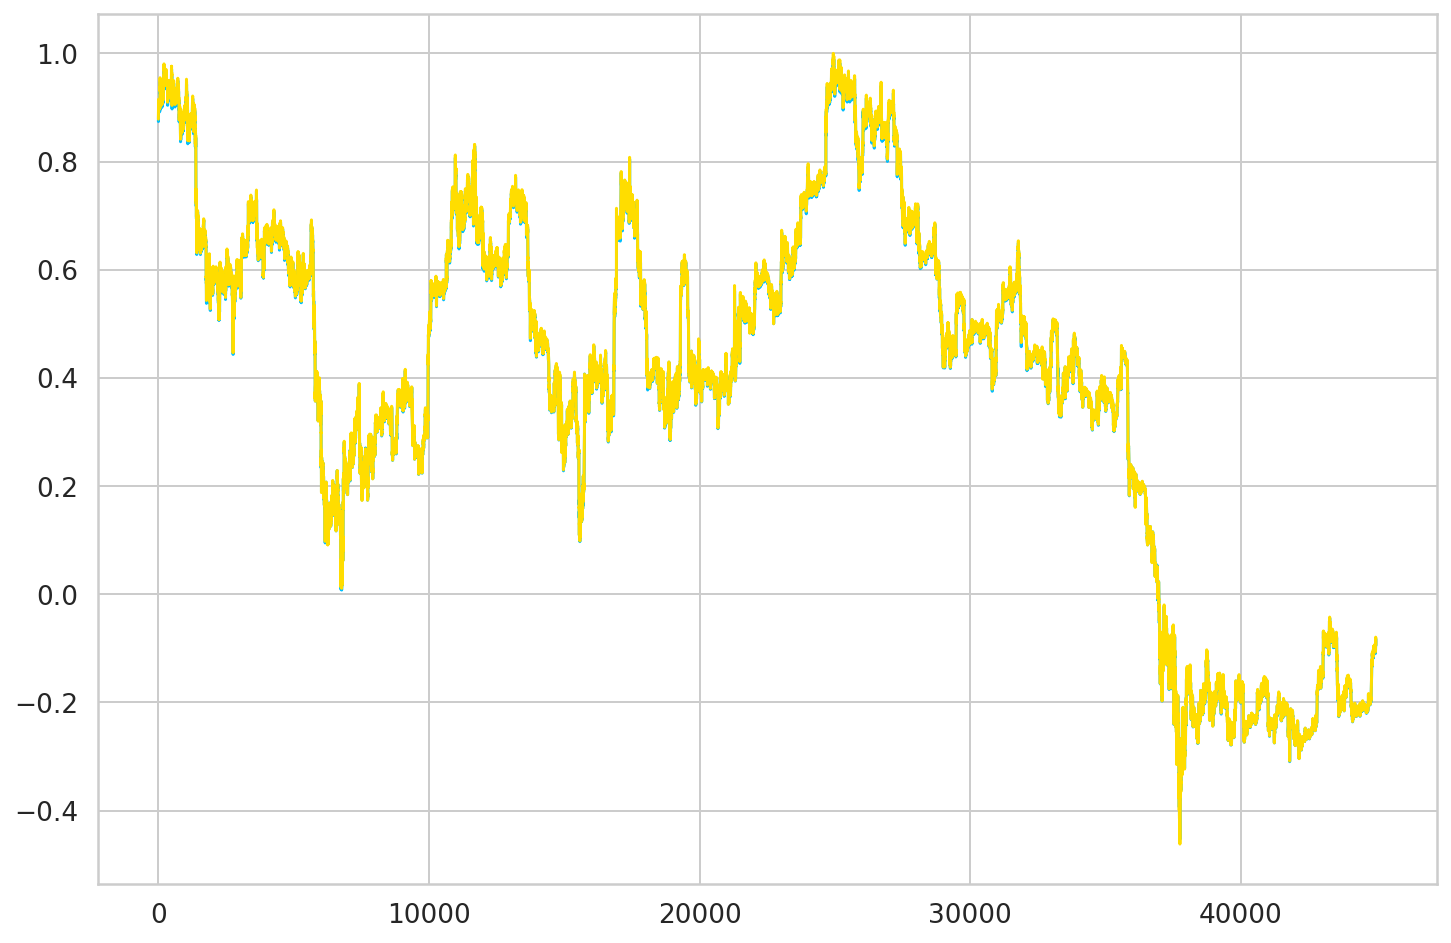

In [ ]:
plot_predictions1(model_mv_GRU, X_train2, y_train2)

(       Predictions   Actuals
 0         0.876277  0.871365
 1         0.874434  0.874237
 2         0.877803  0.878655
 3         0.882779  0.884685
 4         0.888251  0.889375
 ...            ...       ...
 44995    -0.315675 -0.321487
 44996    -0.315550 -0.323246
 44997    -0.317881 -0.325285
 44998    -0.320072 -0.330342
 44999    -0.325096 -0.329882
 
 [45000 rows x 2 columns], 3.2812045541186785e-05)

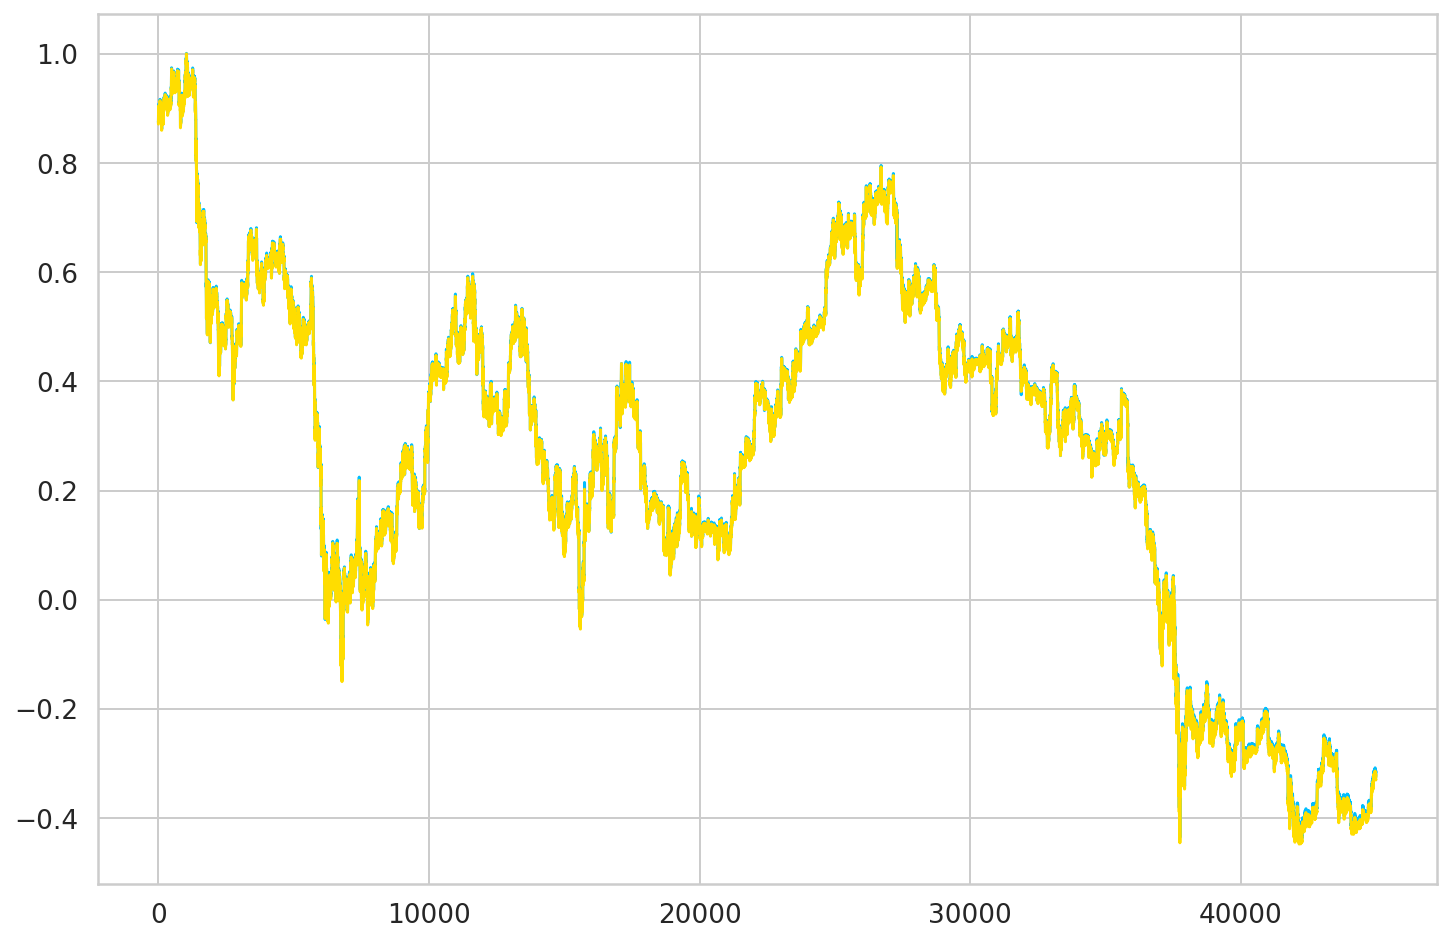

In [ ]:
plot_predictions1(model_mv_GRU_eth, X_eth_train2, y_eth_train2)

(       Predictions   Actuals
 0         0.887457  0.878375
 1         0.885353  0.885595
 2         0.892089  0.891870
 3         0.898224  0.894791
 4         0.901908  0.901556
 ...            ...       ...
 44995    -0.082810 -0.081226
 44996    -0.082497 -0.084272
 44997    -0.085867 -0.087185
 44998    -0.088533 -0.092333
 44999    -0.094062 -0.093579
 
 [45000 rows x 2 columns], 3.9317580913127467e-05)

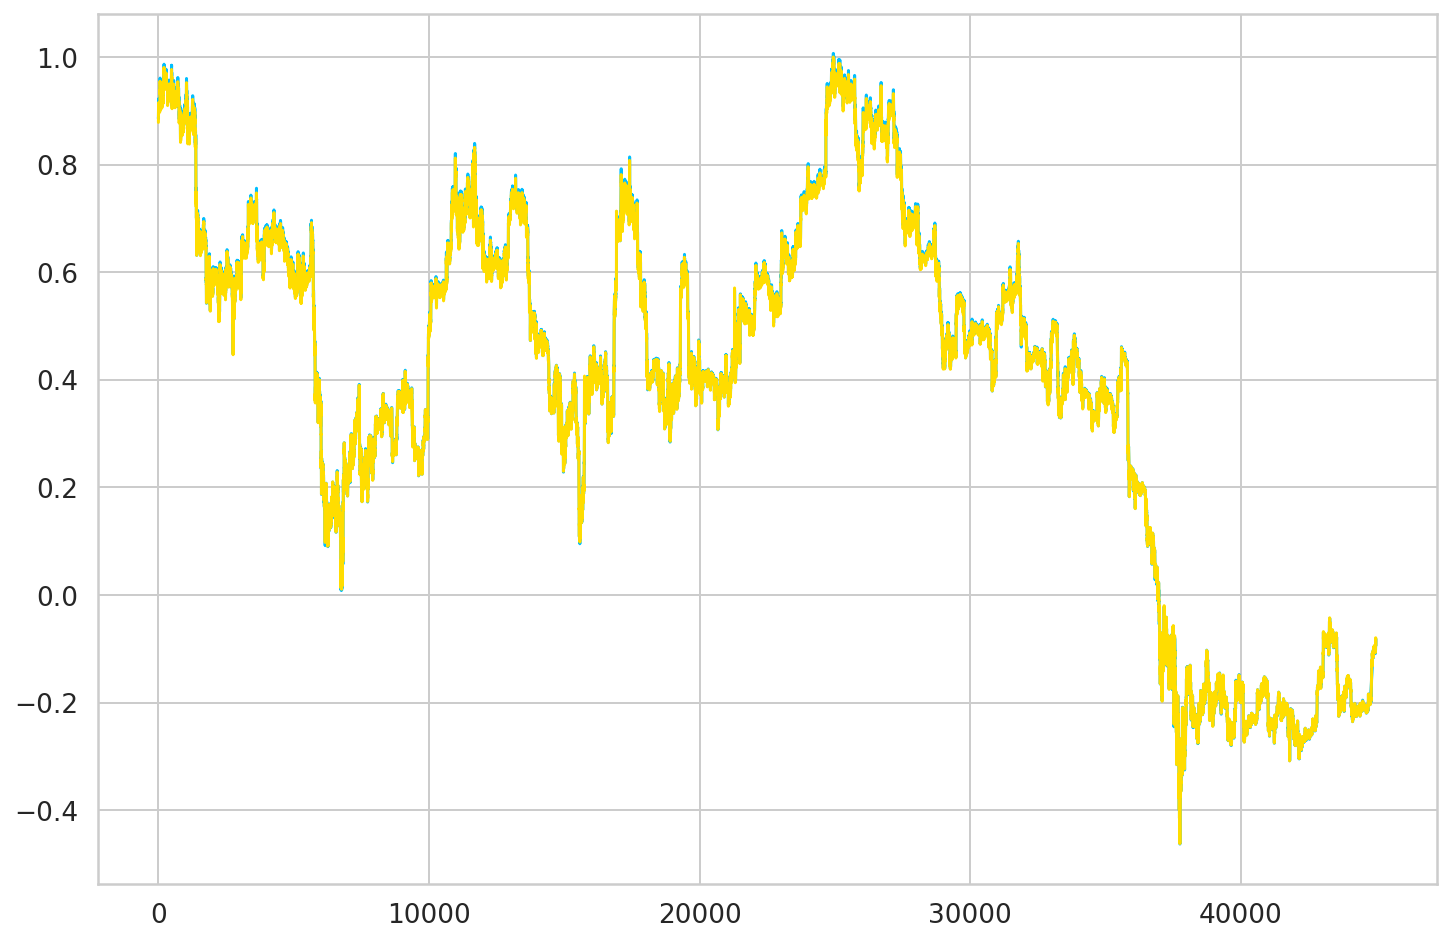

In [ ]:
plot_predictions1(model_mv_GRU_all_btc, X_btc_all_train2, y_btc_all_train2)

(       Predictions   Actuals
 0         0.875389  0.871365
 1         0.873491  0.874237
 2         0.877308  0.878655
 3         0.882119  0.884685
 4         0.887429  0.889375
 ...            ...       ...
 44995    -0.314668 -0.321487
 44996    -0.314621 -0.323246
 44997    -0.316997 -0.325285
 44998    -0.319139 -0.330342
 44999    -0.324043 -0.329882
 
 [45000 rows x 2 columns], 3.198903632939371e-05)

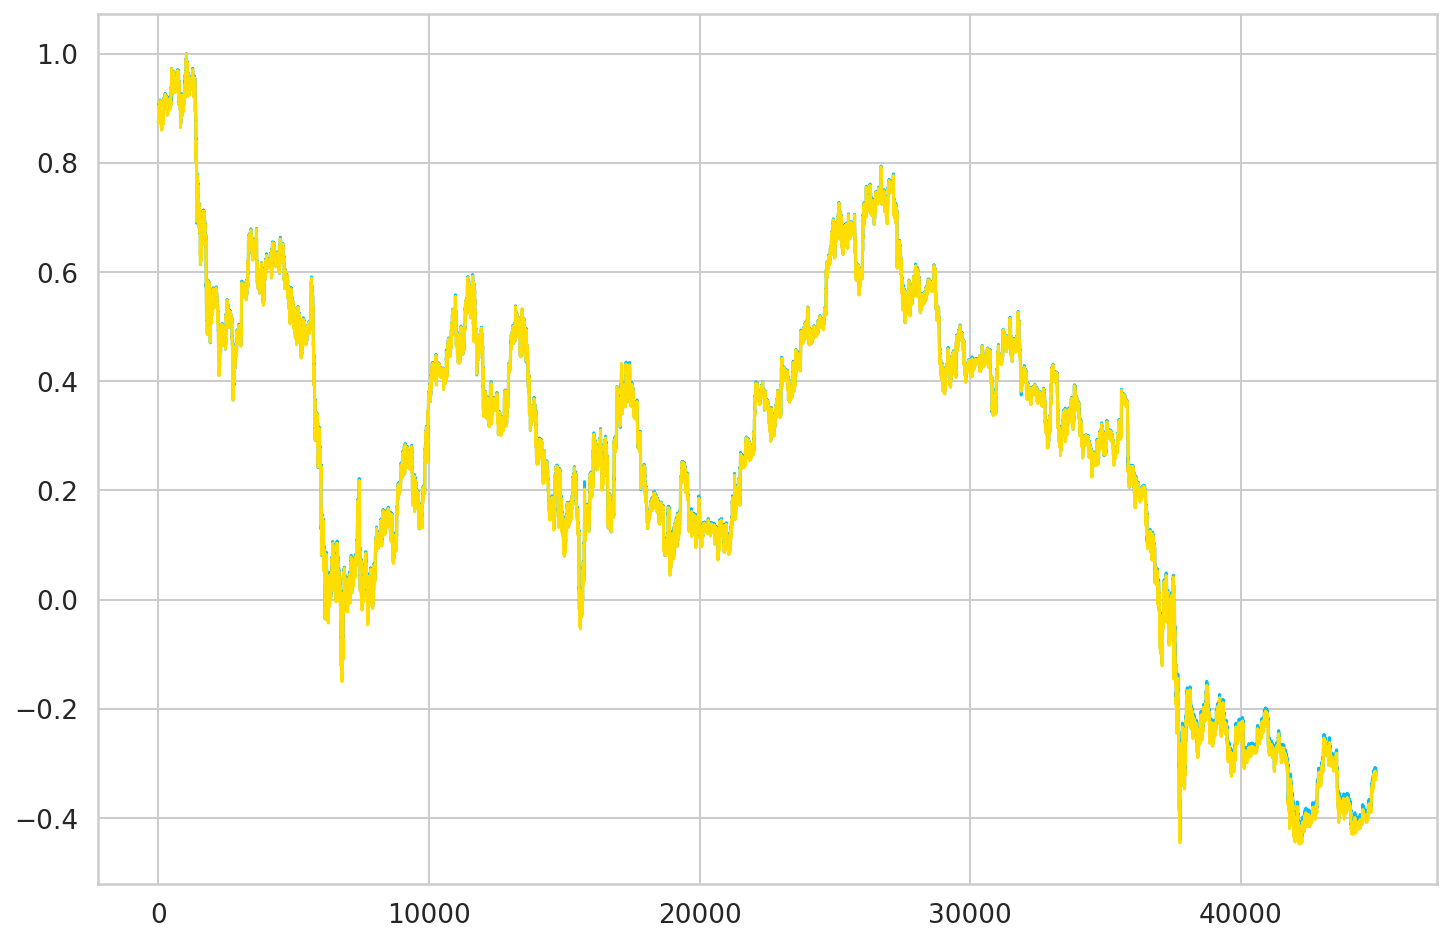

In [ ]:
plot_predictions1(model_mv_GRU_all_eth, X_eth_all_train2, y_eth_all_train2)

(       Predictions   Actuals
 0         0.871717  0.871365
 1         0.870214  0.874237
 2         0.873871  0.878655
 3         0.878511  0.884685
 4         0.883545  0.889375
 ...            ...       ...
 44995    -0.320798 -0.321487
 44996    -0.320856 -0.323246
 44997    -0.322839 -0.325285
 44998    -0.325101 -0.330342
 44999    -0.329747 -0.329882
 
 [45000 rows x 2 columns], 2.1955933876327542e-05)

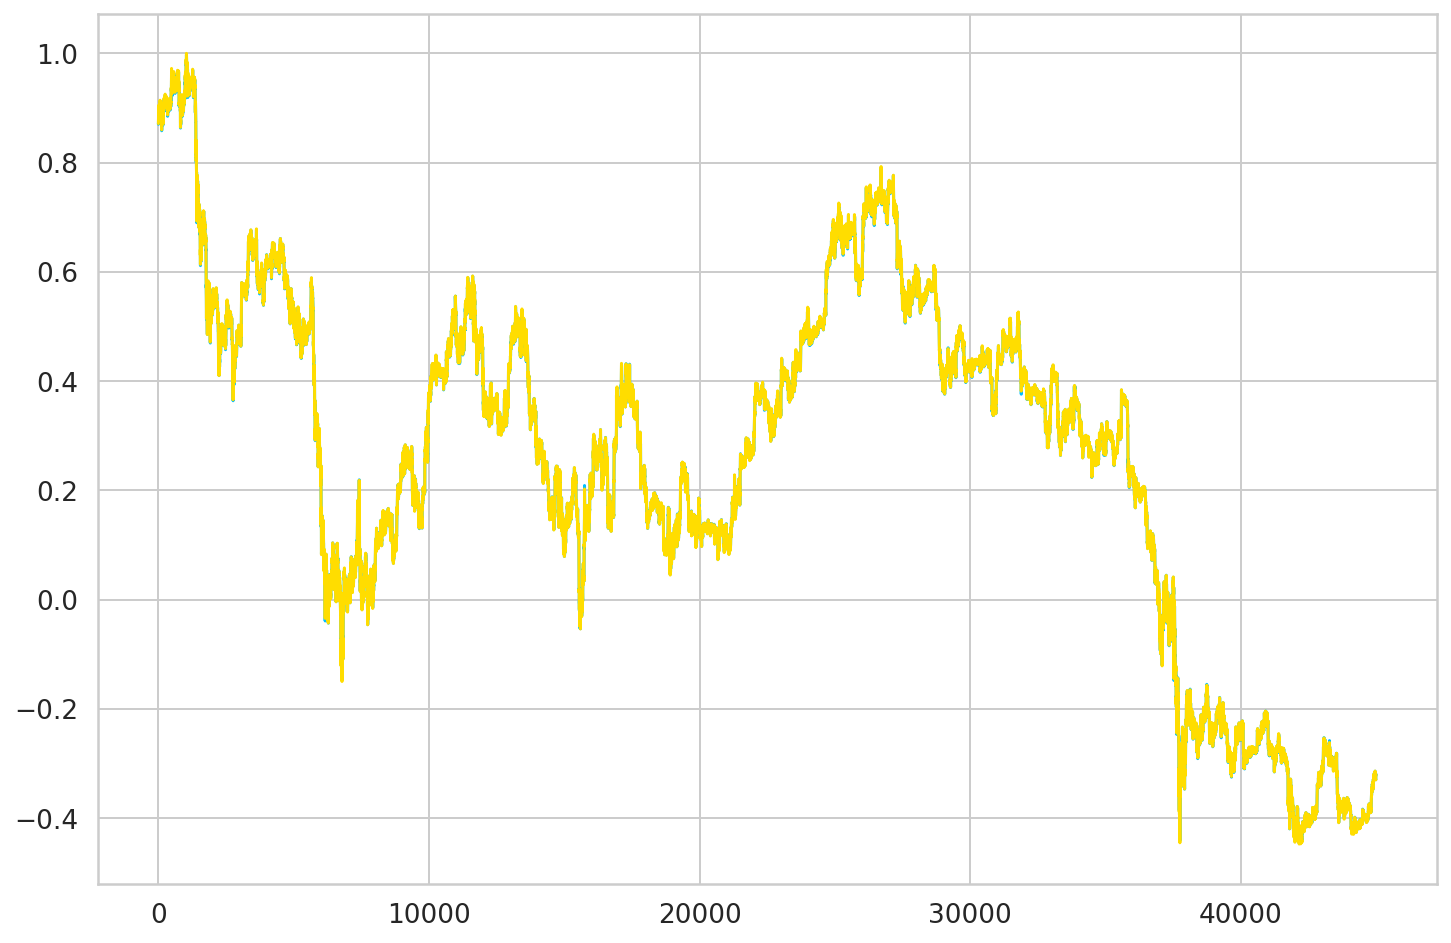

In [ ]:
plot_predictions1(model_mv_GRU_all, X_all_train2, y_all_train2)

### Validation Results

(      Predictions   Actuals
 0       -0.096486 -0.096840
 1       -0.099150 -0.101056
 2       -0.102658 -0.103126
 3       -0.105067 -0.116073
 4       -0.116859 -0.109961
 ...           ...       ...
 4995    -0.747277 -0.774502
 4996    -0.746048 -0.771328
 4997    -0.742269 -0.769867
 4998    -0.741210 -0.773450
 4999    -0.744347 -0.772455
 
 [5000 rows x 2 columns], 0.0006016404114205931)

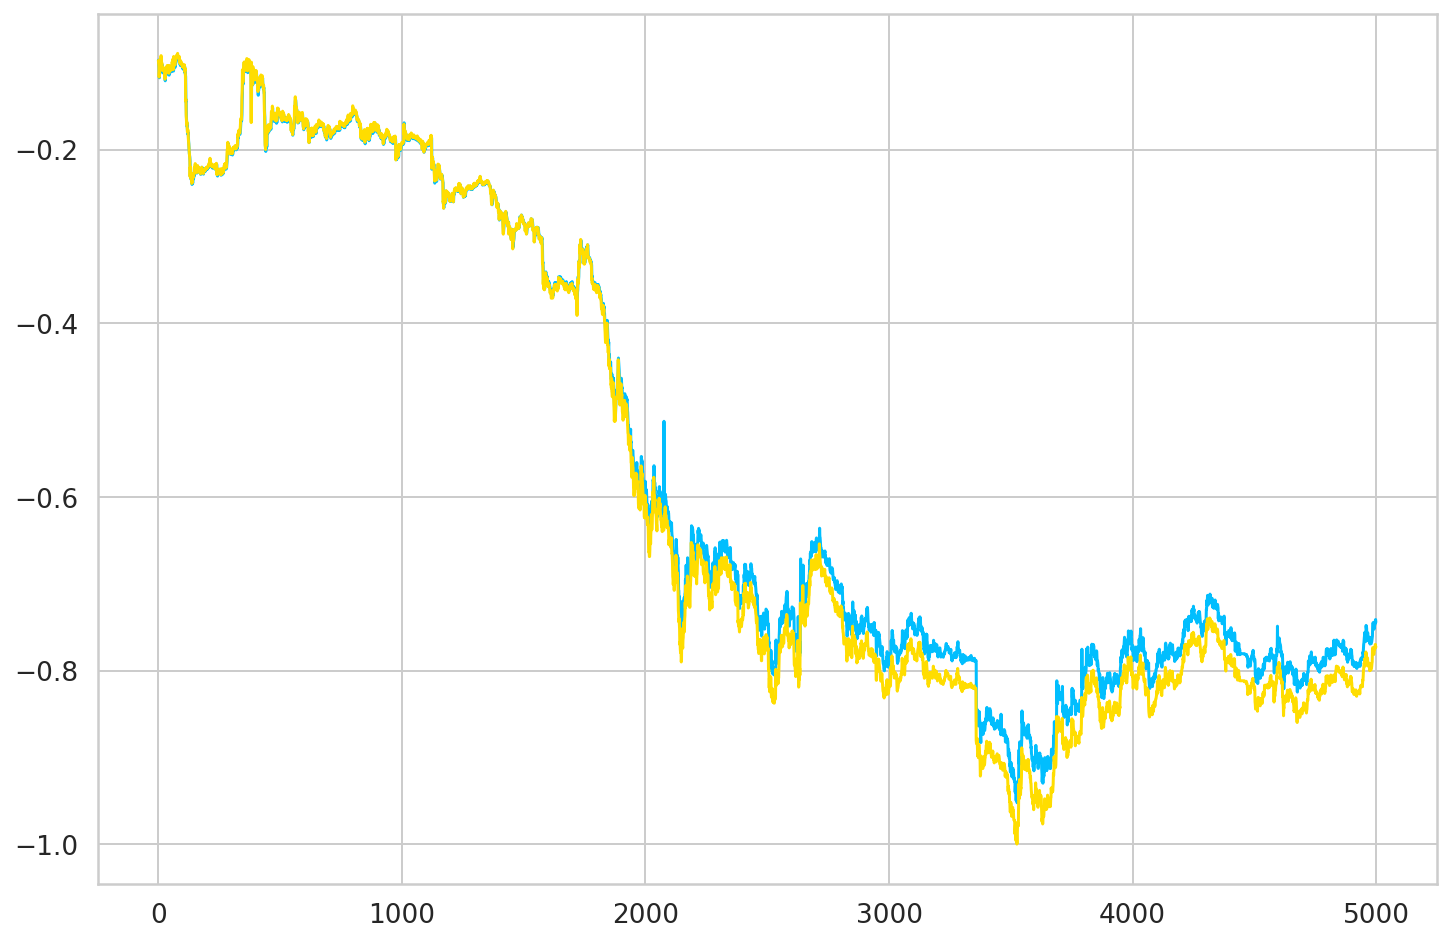

In [ ]:
plot_predictions1(model_mv_GRU, X_val2, y_val2)

(      Predictions   Actuals
 0       -0.324436 -0.332520
 1       -0.327096 -0.335359
 2       -0.329813 -0.338724
 3       -0.333365 -0.347059
 4       -0.341658 -0.344894
 ...           ...       ...
 4995    -0.802439 -0.829342
 4996    -0.802819 -0.827843
 4997    -0.801047 -0.827657
 4998    -0.800936 -0.827650
 4999    -0.800350 -0.827816
 
 [5000 rows x 2 columns], 0.0005742454916176974)

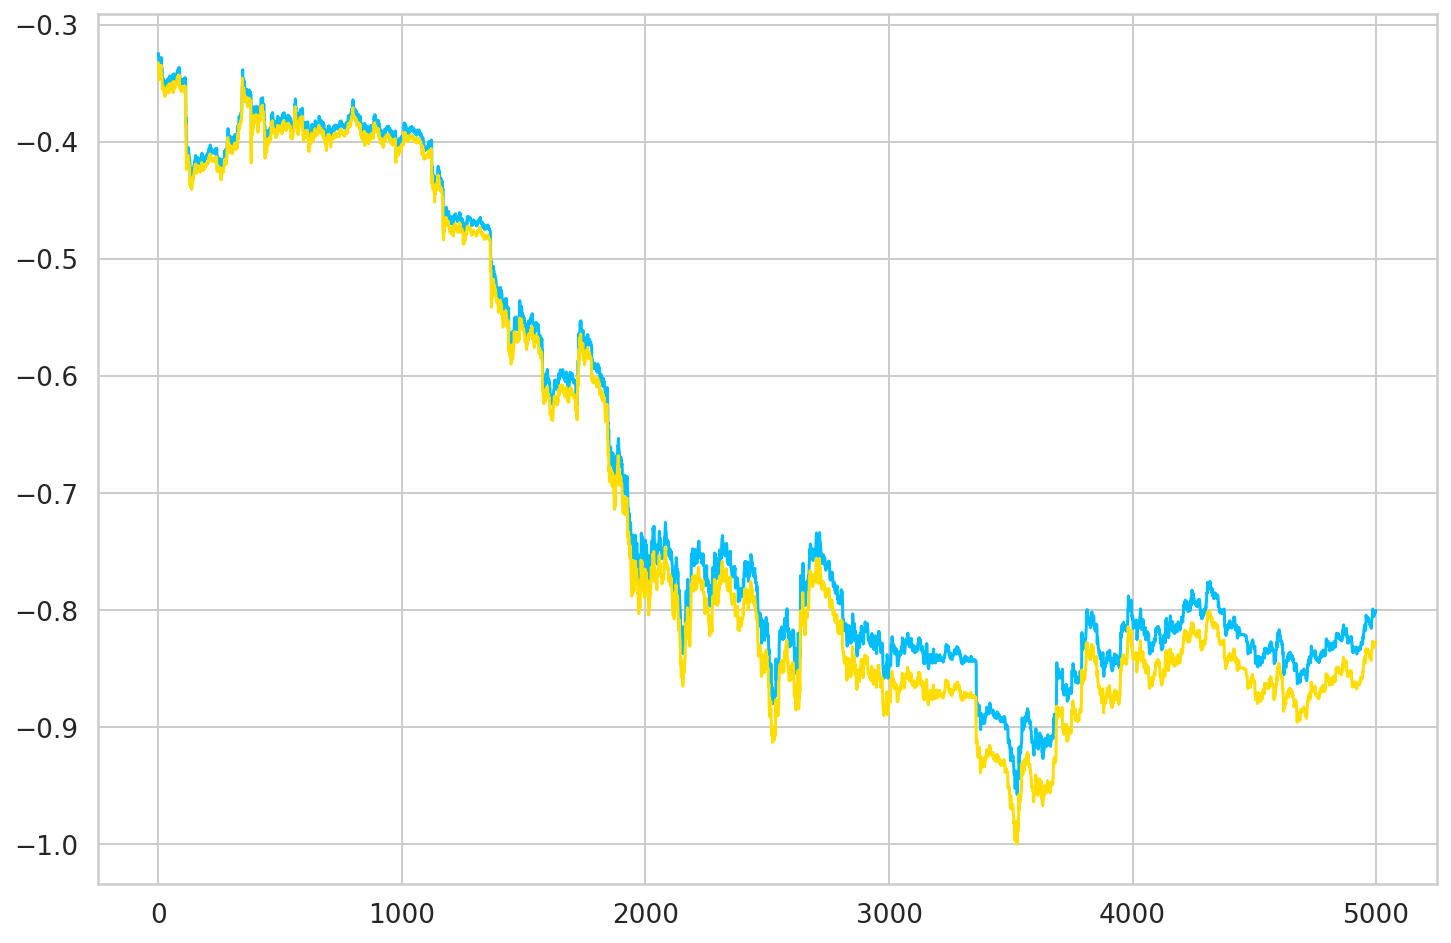

In [ ]:
plot_predictions1(model_mv_GRU_eth, X_eth_val2, y_eth_val2)

(      Predictions   Actuals
 0       -0.094672 -0.096840
 1       -0.097796 -0.101056
 2       -0.101428 -0.103126
 3       -0.103983 -0.116073
 4       -0.116400 -0.109961
 ...           ...       ...
 4995    -0.701652 -0.774502
 4996    -0.700973 -0.771328
 4997    -0.699109 -0.769867
 4998    -0.698396 -0.773450
 4999    -0.699041 -0.772455
 
 [5000 rows x 2 columns], 0.004871652480868628)

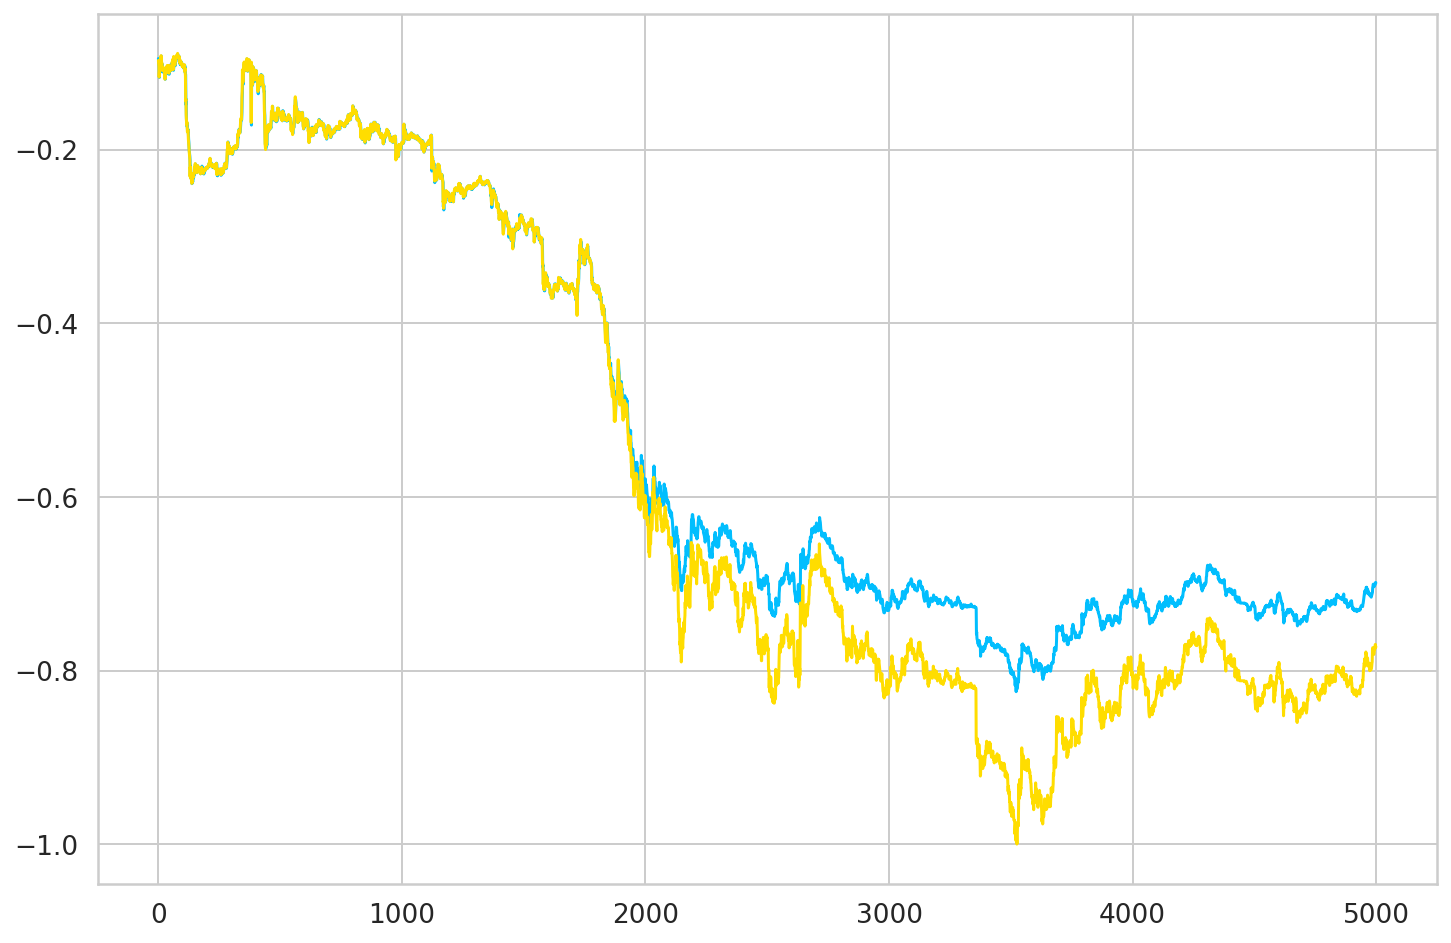

In [ ]:
plot_predictions1(model_mv_GRU_all_btc, X_btc_all_val2, y_btc_all_val2)

(      Predictions   Actuals
 0       -0.323652 -0.332520
 1       -0.326251 -0.335359
 2       -0.328948 -0.338724
 3       -0.332228 -0.347059
 4       -0.340851 -0.344894
 ...           ...       ...
 4995    -0.789408 -0.829342
 4996    -0.789544 -0.827843
 4997    -0.787918 -0.827657
 4998    -0.787902 -0.827650
 4999    -0.787879 -0.827816
 
 [5000 rows x 2 columns], 0.0012664691267107483)

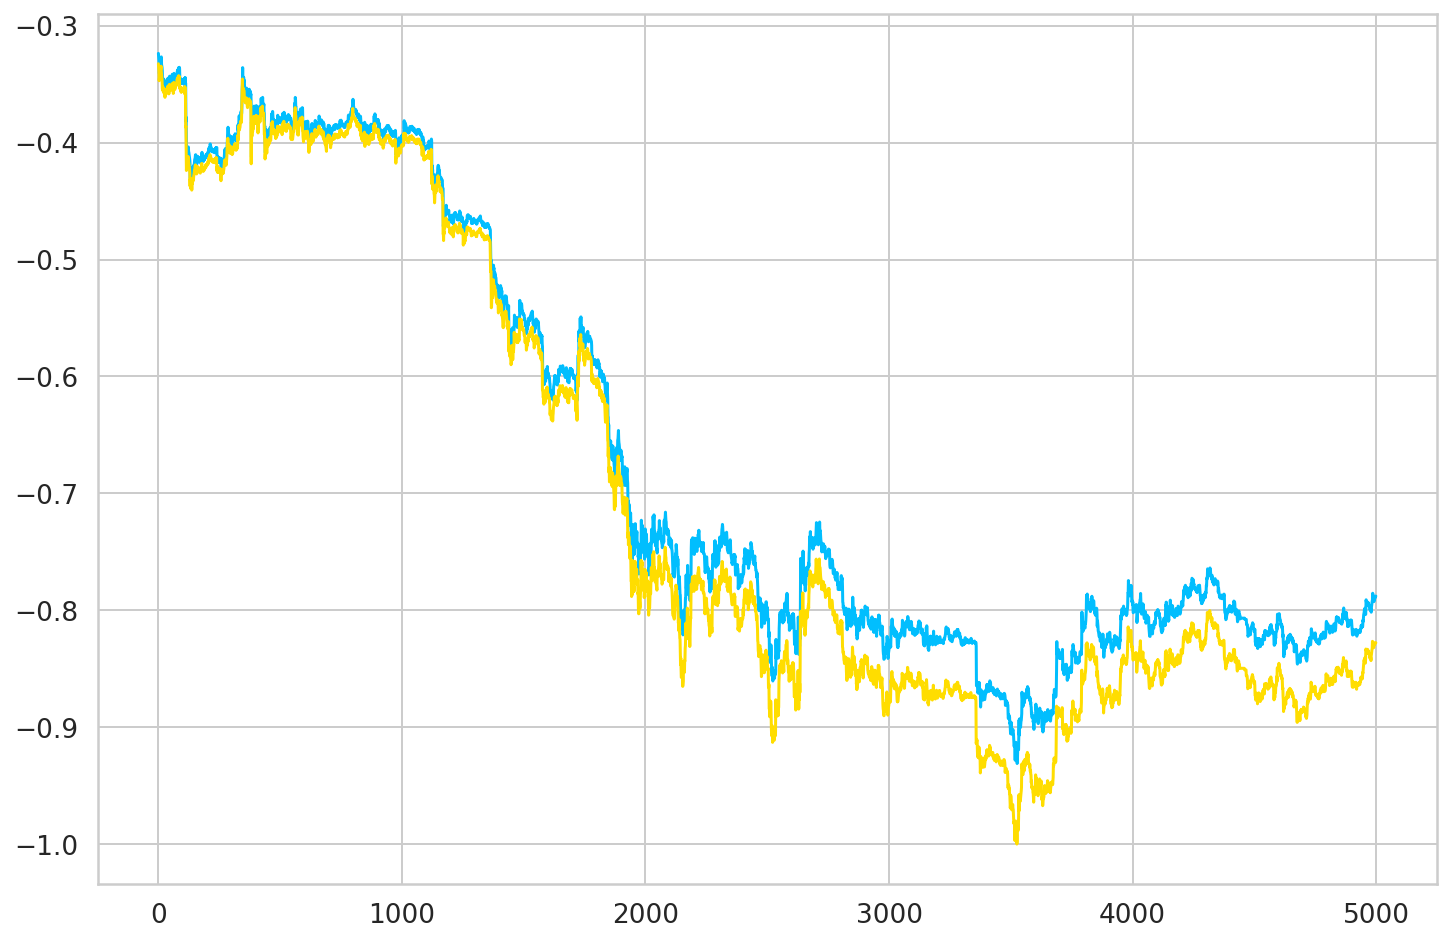

In [ ]:
plot_predictions1(model_mv_GRU_all_eth, X_eth_all_val2, y_eth_all_val2)

(      Predictions   Actuals
 0       -0.330028 -0.332520
 1       -0.332499 -0.335359
 2       -0.335168 -0.338724
 3       -0.338385 -0.347059
 4       -0.346152 -0.344894
 ...           ...       ...
 4995    -0.788241 -0.829342
 4996    -0.788357 -0.827843
 4997    -0.787286 -0.827657
 4998    -0.787071 -0.827650
 4999    -0.786811 -0.827816
 
 [5000 rows x 2 columns], 0.0013314243575559609)

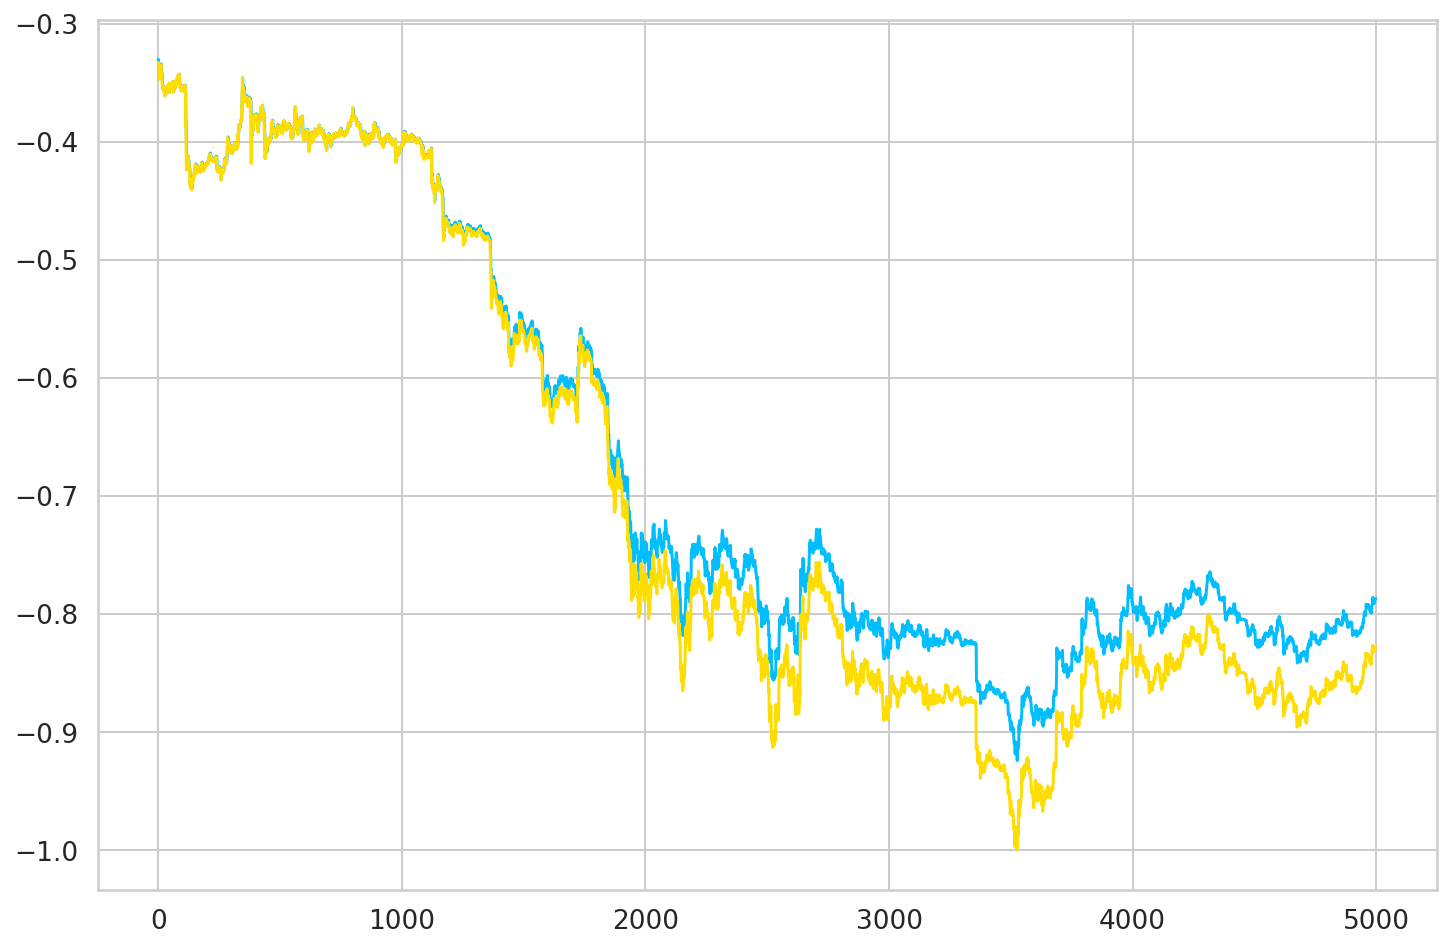

In [ ]:
plot_predictions1(model_mv_GRU_all, X_all_val2, y_all_val2)

### Test Results

(      Predictions   Actuals
 0       -0.742704 -0.774143
 1       -0.745375 -0.774205
 2       -0.745370 -0.772726
 3       -0.745289 -0.771556
 4       -0.744472 -0.771738
 ...           ...       ...
 5270    -0.821916 -0.856011
 5271    -0.822248 -0.855788
 5272    -0.821947 -0.860783
 5273    -0.827423 -0.861937
 5274    -0.826972 -0.868828
 
 [5275 rows x 2 columns], 0.001040193481612009)

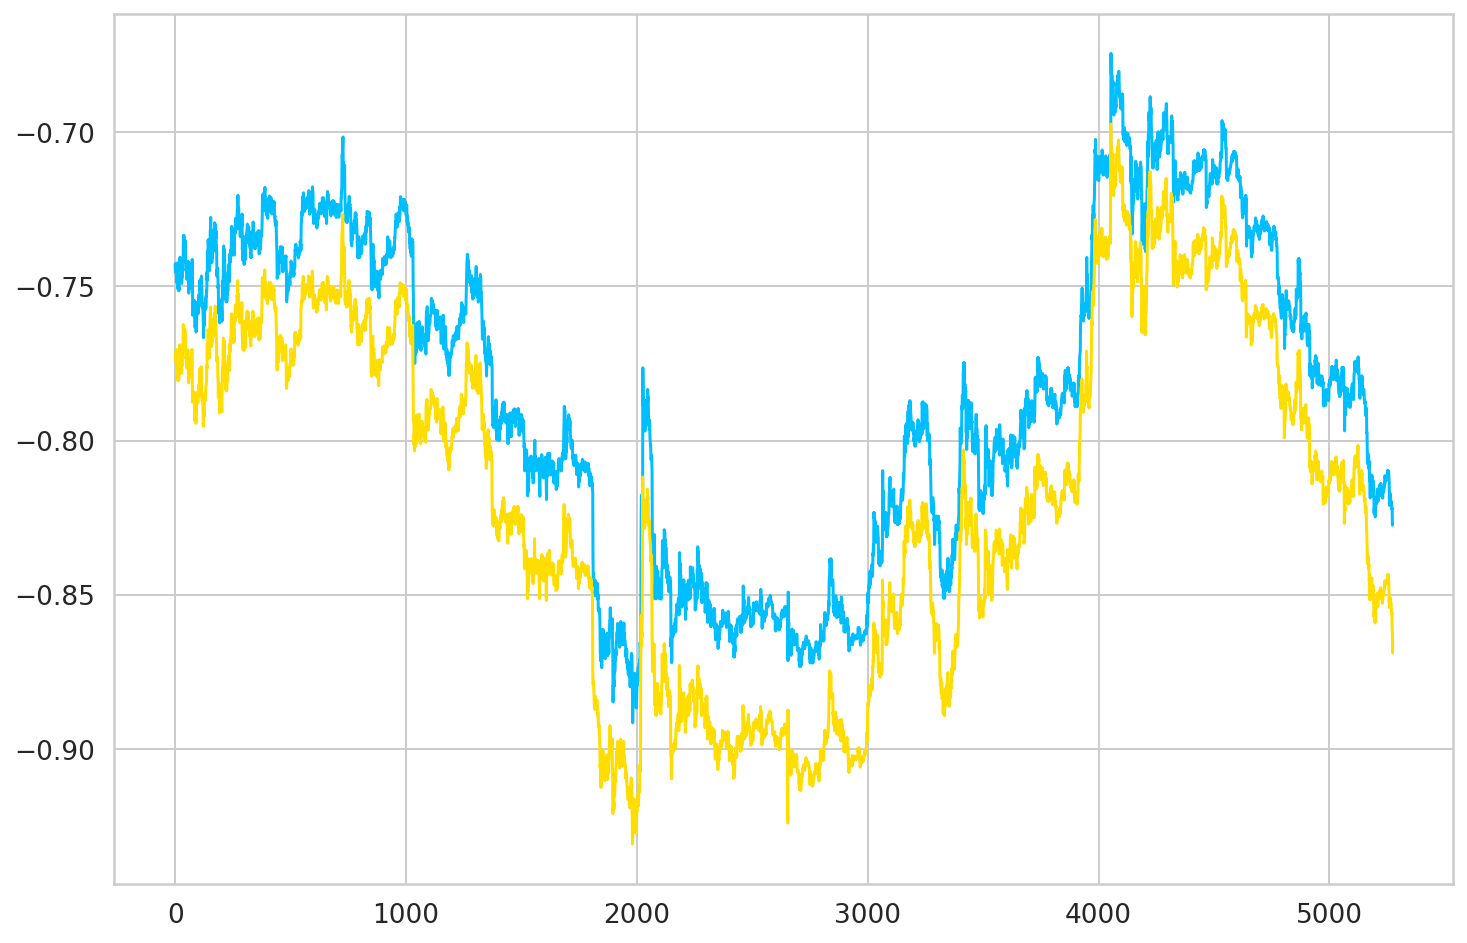

In [ ]:
plot_predictions1(model_mv_GRU, X_test2, y_test2)

(      Predictions   Actuals
 0       -0.801097 -0.829249
 1       -0.802608 -0.829362
 2       -0.802482 -0.828429
 3       -0.801603 -0.827510
 4       -0.801217 -0.828190
 ...           ...       ...
 5270    -0.843348 -0.873804
 5271    -0.842831 -0.873091
 5272    -0.843084 -0.876829
 5273    -0.846911 -0.877715
 5274    -0.847371 -0.881480
 
 [5275 rows x 2 columns], 0.0007284165027867434)

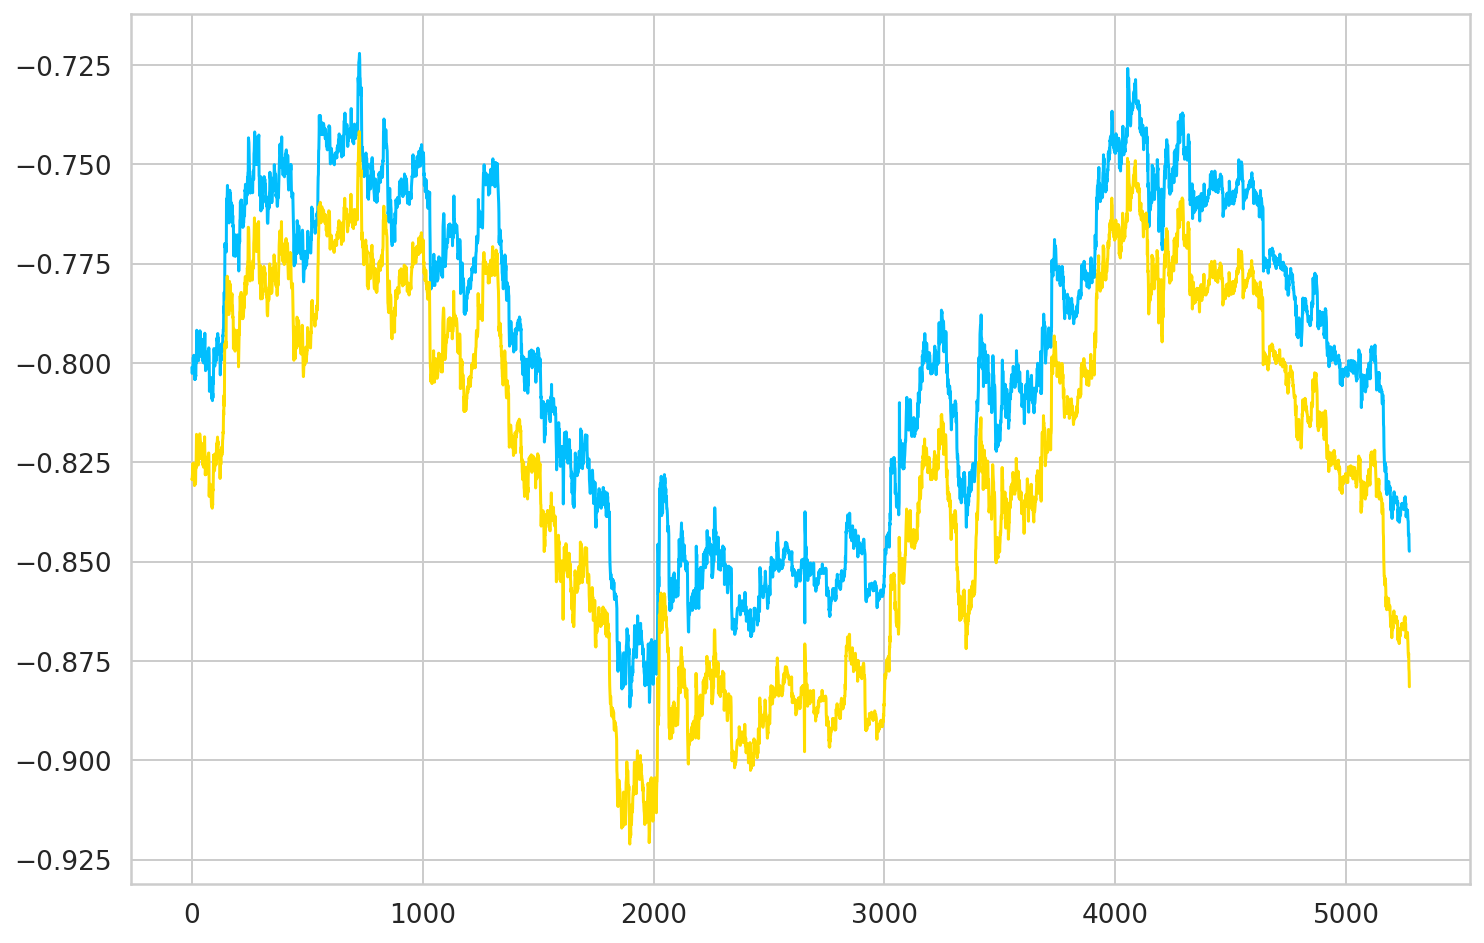

In [ ]:
plot_predictions1(model_mv_GRU_eth, X_eth_test2, y_eth_test2)

(      Predictions   Actuals
 0       -0.698284 -0.774143
 1       -0.699347 -0.774205
 2       -0.699640 -0.772726
 3       -0.699555 -0.771556
 4       -0.698841 -0.771738
 ...           ...       ...
 5270    -0.746935 -0.856011
 5271    -0.750203 -0.855788
 5272    -0.746611 -0.860783
 5273    -0.749948 -0.861937
 5274    -0.750484 -0.868828
 
 [5275 rows x 2 columns], 0.009065929688163334)

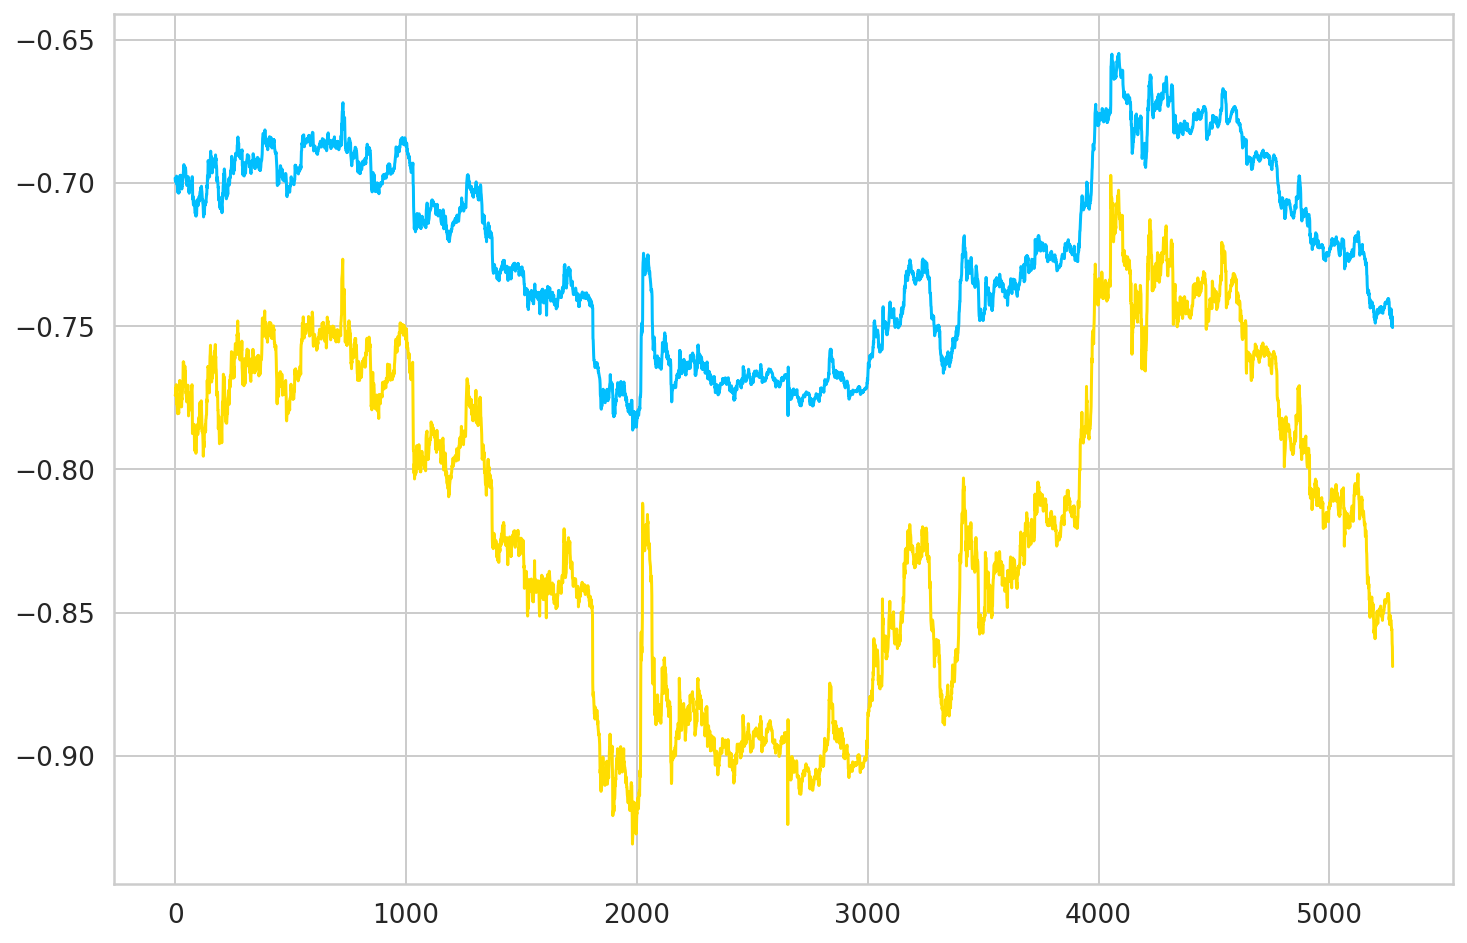

In [ ]:
plot_predictions1(model_mv_GRU_all_btc, X_btc_all_test2, y_btc_all_test2)

(      Predictions   Actuals
 0       -0.787896 -0.829249
 1       -0.789426 -0.829362
 2       -0.789418 -0.828429
 3       -0.788870 -0.827510
 4       -0.788416 -0.828190
 ...           ...       ...
 5270    -0.826920 -0.873804
 5271    -0.828084 -0.873091
 5272    -0.826461 -0.876829
 5273    -0.830367 -0.877715
 5274    -0.831047 -0.881480
 
 [5275 rows x 2 columns], 0.001612946687634807)

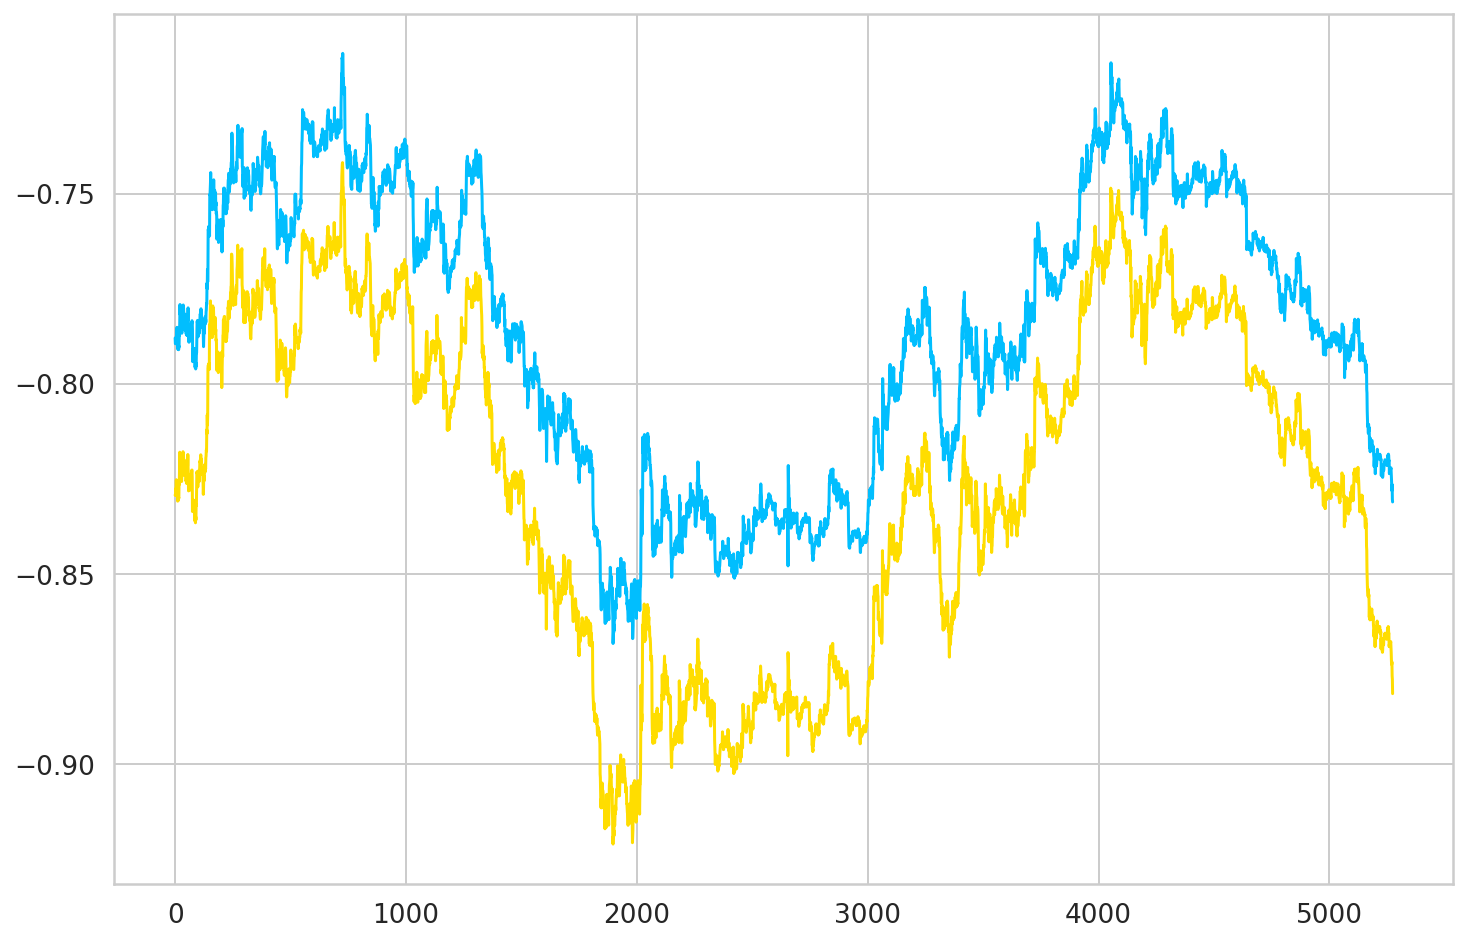

In [ ]:
plot_predictions1(model_mv_GRU_all_eth, X_eth_all_test2, y_eth_all_test2)

(      Predictions   Actuals
 0       -0.786662 -0.829249
 1       -0.788017 -0.829362
 2       -0.788358 -0.828429
 3       -0.787989 -0.827510
 4       -0.787679 -0.828190
 ...           ...       ...
 5270    -0.823590 -0.873804
 5271    -0.824230 -0.873091
 5272    -0.823320 -0.876829
 5273    -0.826257 -0.877715
 5274    -0.827580 -0.881480
 
 [5275 rows x 2 columns], 0.001818343902837861)

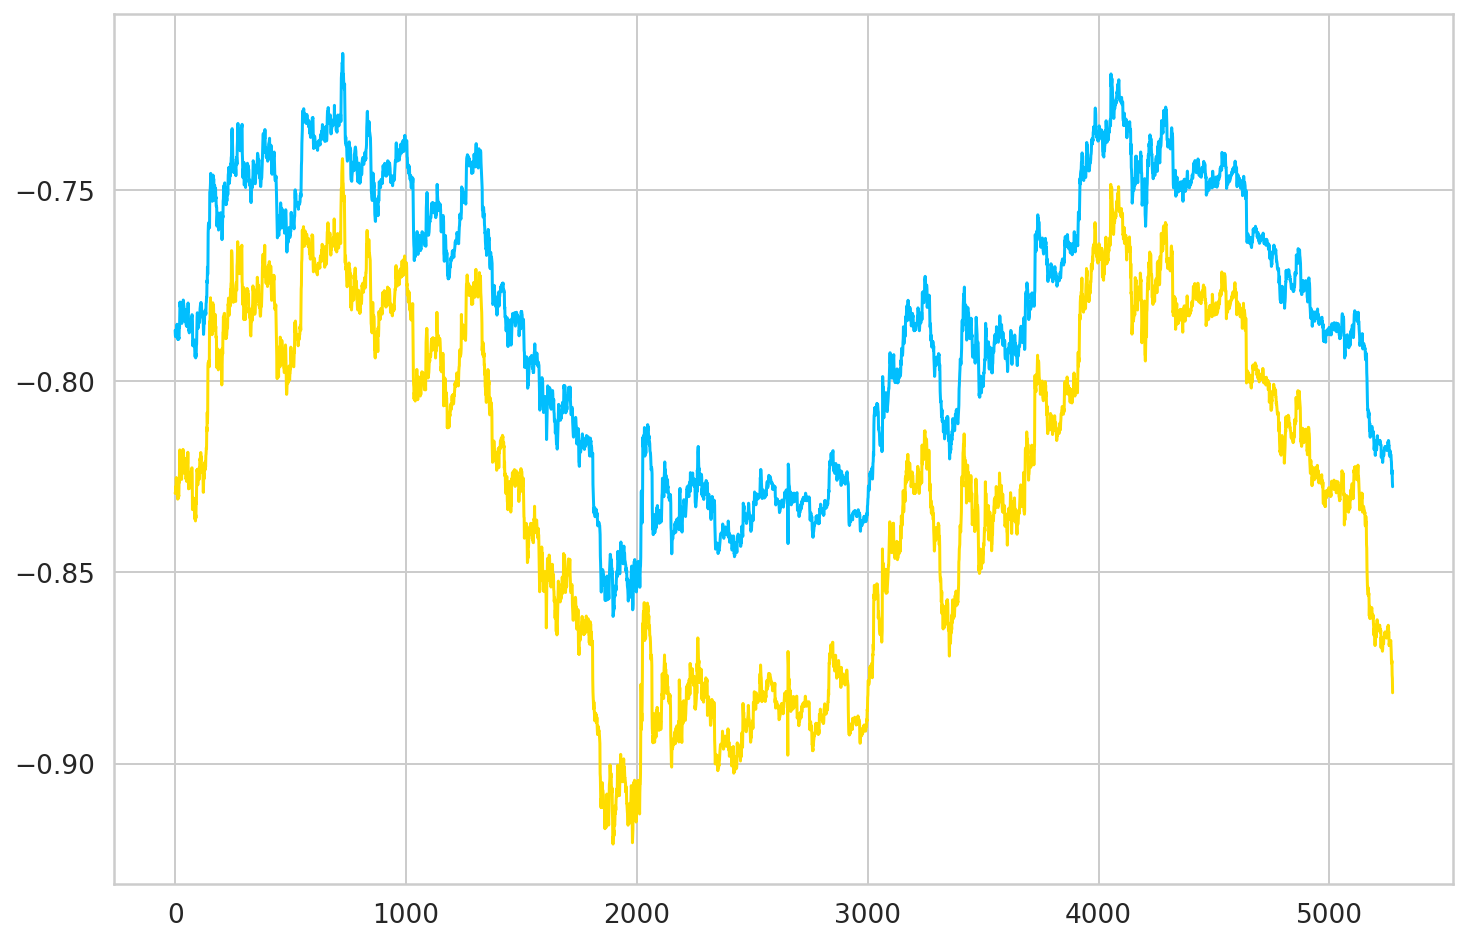

In [ ]:
plot_predictions1(model_mv_GRU_all, X_all_test2, y_all_test2)